In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize, scale, MinMaxScaler, StandardScaler
from sklearn import svm

In [2]:
class PCA_lucas: 
    def __init__(self, n_components = None):
        self.n_components = n_components
        self.W = None

    def standarize(self, data):
        return np.nan_to_num((data - self.mean)/self.std)

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        standarized_X = self.standarize(X)
        #Get projection matrix
        print(standarized_X)
        cov_x   = np.cov(standarized_X.T)
        print(cov_x)
        eigenvalues, eigenvectors = np.linalg.eig(cov_x)
        eigenvalues_order = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[eigenvalues_order]
        print sorted_eigenvalues.shape
        sorted_eigenvectors = eigenvectors[:,eigenvalues_order]
        self.W = sorted_eigenvectors
        if self.n_components is not None:
            self.W = self.W[:,:self.n_components]
        return standarized_X
        
    
    def transform(self, X):
        standarized_X = self.standarize(X)
        return np.dot(standarized_X, self.W)
    
    def fit_transform(self, X):
        standarized_X = self.fit(X)
        return np.dot(standarized_X, self.W)

In [3]:
def get_macho_ts():
    data = pd.read_csv('MACHO_ts2.csv', sep=',', index_col=0)
    features = data.values[:,:-1].astype(np.float32)
    classes = data.values[:,-1].astype(np.int32)
    column_names = data.columns.values
    return features, classes, column_names

In [4]:
X, y, feature_names = get_macho_ts()
RFC = RandomForestClassifier()
RFC.fit(X,y)
importances = RFC.feature_importances_
features_order = np.argsort(importances)[::-1]
X = X[:,features_order]
sorted_importances = importances[features_order]
X = X[:,features_order]
feature_names = feature_names[features_order]
print(features_order)

[57 63  7  6 49 52 12 50 58 13  4 62  2  3 60 55  8 51 56 42 11  9 10 43 45
 54 47 44 16 61 15 14  0 24 26 48 59 27 41 17 53 40 22 30 35 18 23 19 25 33
 29 39 32 38 34 37  5 31 46 21  1 36 20 28]


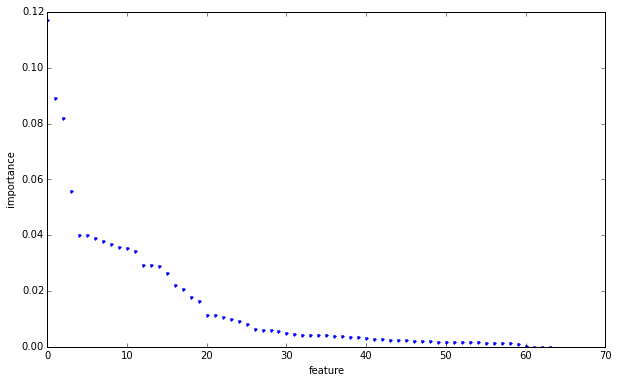

In [5]:
plt.plot(np.arange(len(sorted_importances)), sorted_importances,'.')
plt.xlabel('feature')
plt.ylabel('importance')
plt.show()

In [6]:
pca = PCA()
pca_lucas = PCA_lucas()
X_normalized = MinMaxScaler().fit_transform(X)
X_standarized = StandardScaler().fit_transform(X.astype(np.float32))
X_unnormalized_pca =  pca.fit_transform(X)
X_normalized_pca =  pca.fit_transform(X_normalized)
X_standarized_pca = pca.fit_transform(X_standarized)
X_pca_lucas = pca_lucas.fit_transform(X)

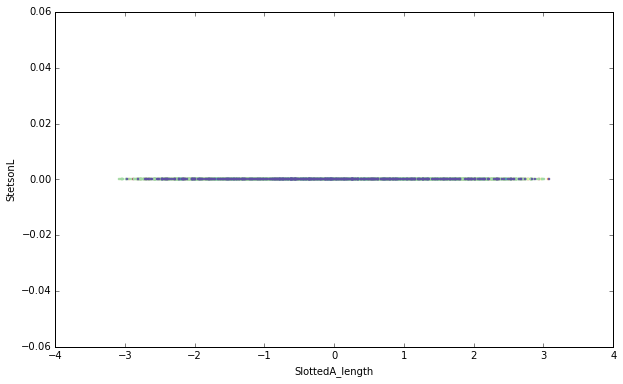

In [7]:
labels = y
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor=col, markersize=2)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])    
plt.show()

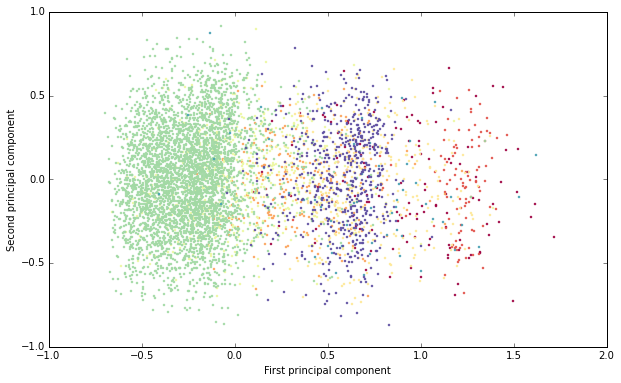

In [8]:
labels = y
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X_normalized_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor=col, markersize=2)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")  
plt.show()

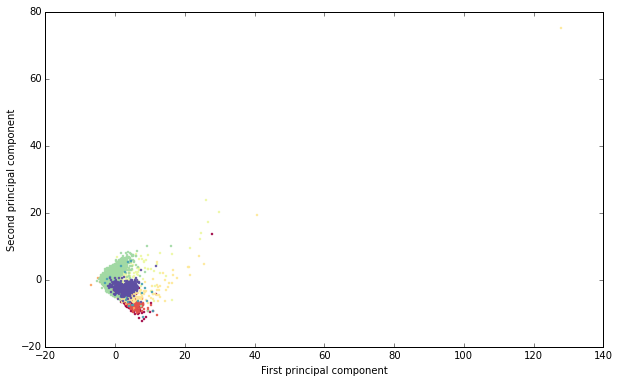

In [9]:
labels = y
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X_standarized_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor=col, markersize=2)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")  
plt.show()

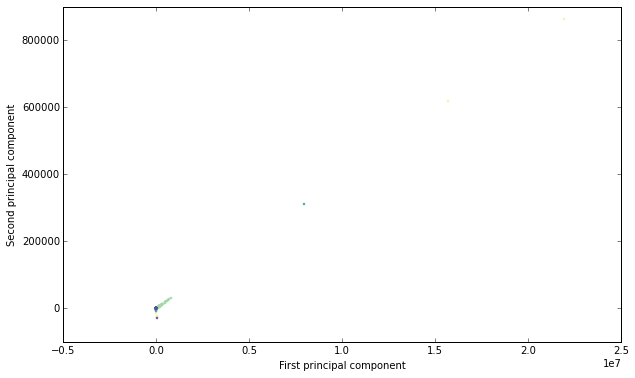

In [10]:
labels = y
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X_pca_lucas[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor=col, markersize=2)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")  
plt.show()

[0.47615115913626999, 0.47648255053125166, 0.66809126207551439, 0.72222678081923886, 0.75457489855894899, 0.77438292455397695, 0.84699815999129124, 0.84830984266464571, 0.84798635175699799, 0.85541783769046642, 0.88529884877513232, 0.88380893075754086, 0.93892787980242642, 0.93546238981575347, 0.94190649687889161, 0.94190813475980129, 0.94273117866477063, 0.94405609030891513, 0.94042093551811712, 0.93910230534140449, 0.94009335664064353, 0.9389295223853813, 0.93760665877084415, 0.94091355178647473, 0.94272533026736183, 0.94124003357953012, 0.9425691638173429, 0.94239883229882104, 0.94949306969373093, 0.94883490488847821, 0.94768387193450232, 0.95279926699739836, 0.95527275812423862, 0.95477811066577745, 0.95708534746062734, 0.95626136069152989, 0.95807994389553031, 0.95692305984640369, 0.96103963244806268, 0.95758094652884052, 0.96220659024578192, 0.95708915726253863, 0.96286706910385789, 0.95890585208338008, 0.96187370376181125, 0.96088497526659877, 0.96220413949676686, 0.961709636847

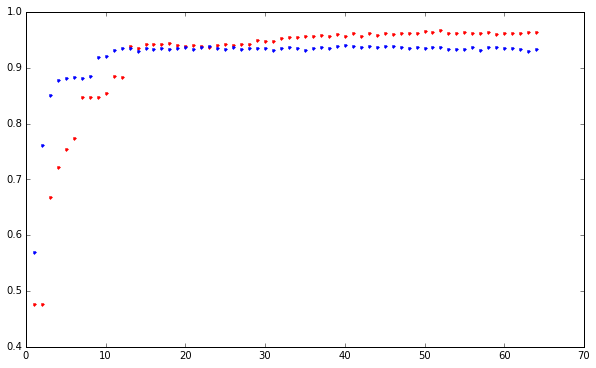

In [12]:
# computing accurracies for random forest with selected features
from sklearn import cross_validation

accuracies_selected_features = []
clf = RandomForestClassifier()
for i in np.arange(len(features_order)) + 1:
    scores = cross_validation.cross_val_score(clf, X[:,:i], y, cv=5)
    accuracies_selected_features.append(np.mean(scores))
print accuracies_selected_features

# computing accurracies for random forest with pca features
accuracies_pca = []
clf = RandomForestClassifier()
for i in np.arange(len(features_order)) + 1:
    scores = cross_validation.cross_val_score(clf, X_standarized_pca[:,:i], y, cv=5)
    accuracies_pca.append(np.mean(scores))
print accuracies_pca

a = np.arange(len(features_order)) + 1
plt.plot(a,accuracies_selected_features,'.',color='r')
plt.plot(a,accuracies_pca,'.',color='b')
plt.show()

In [18]:
def plot_histogram(name, array):
    mean = np.mean(array)
    std = np.std(array)
    median = np.median(array)
    min_ = np.min(array)
    max_ = np.max(array)
    plt.clf()
    plt.hist(array)
    plt.title('{0}\nmean = {1}, std = {2}\nmedian = {3}\nmin = {4}, max = {5}'.format(name, mean, std, median, min_, max_))
    plt.savefig('{0}.png'.format(name), bbox_inches='tight')
    plt.show()

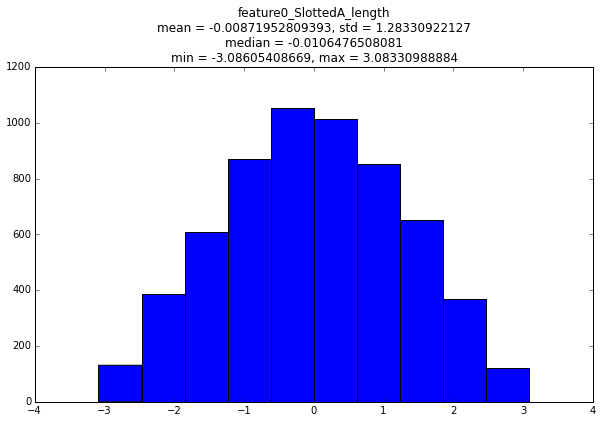

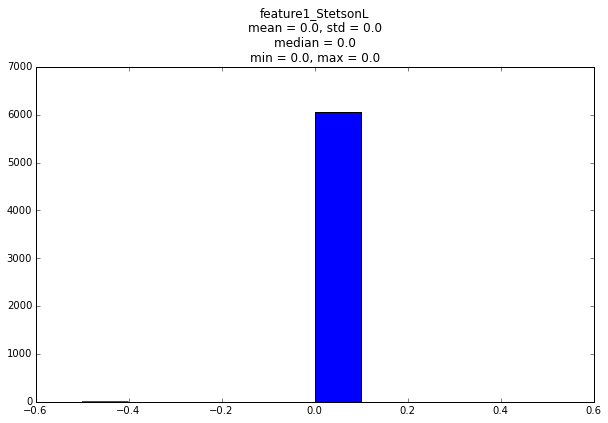

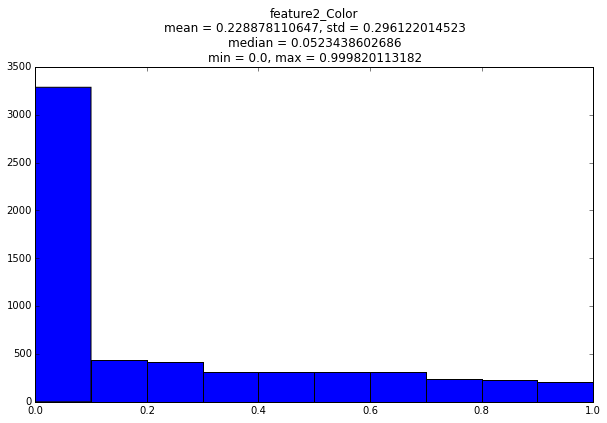

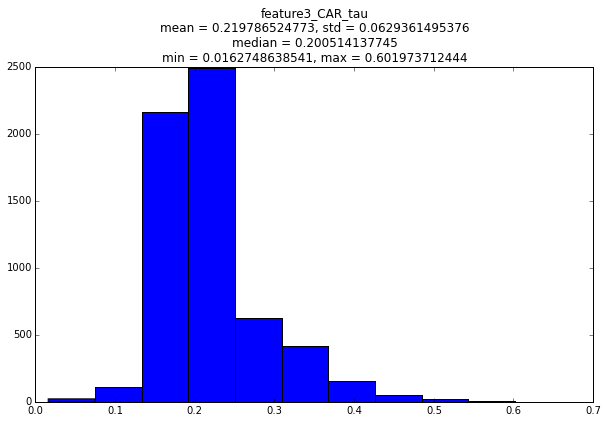

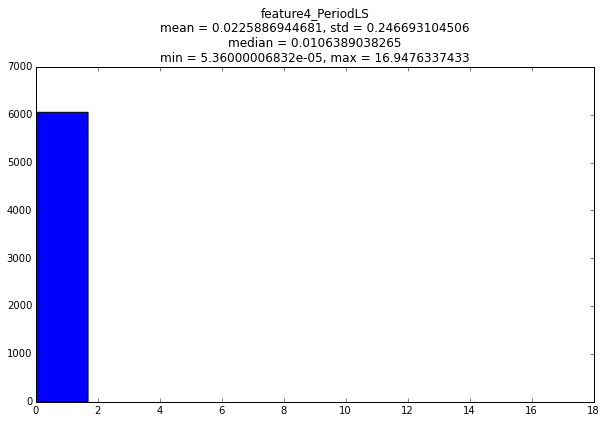

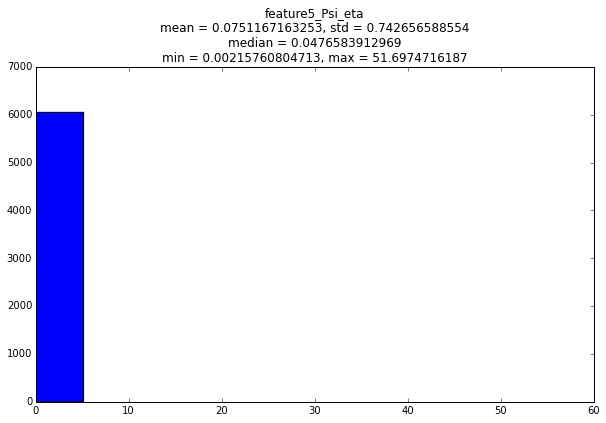

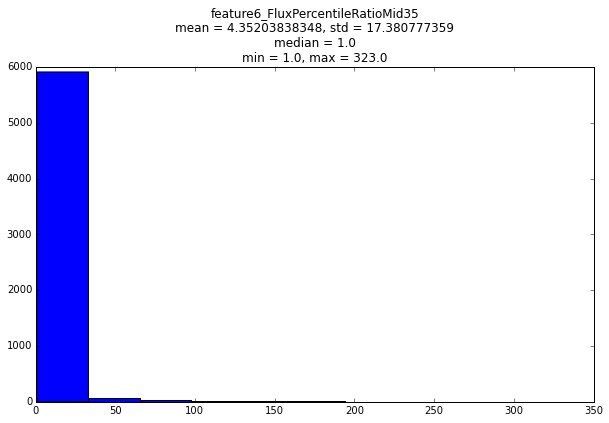

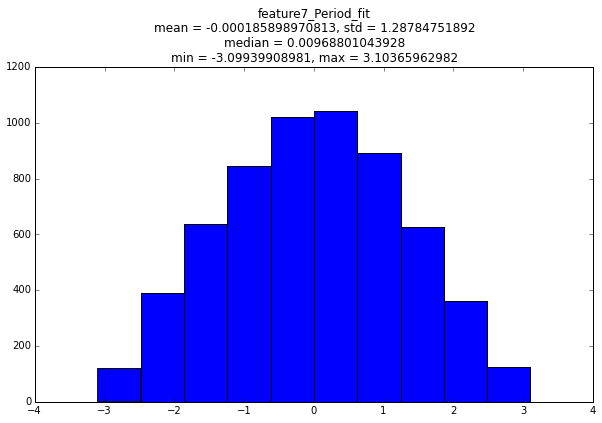

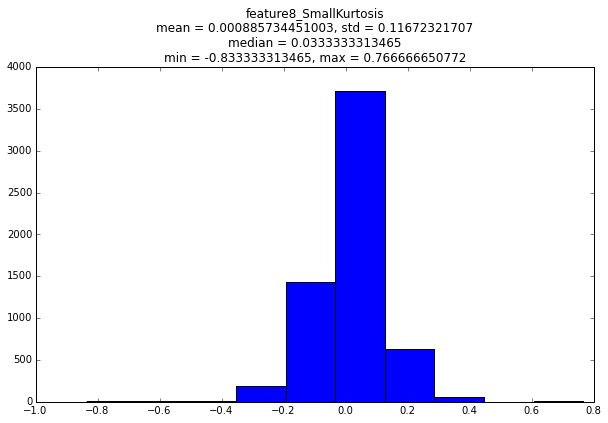

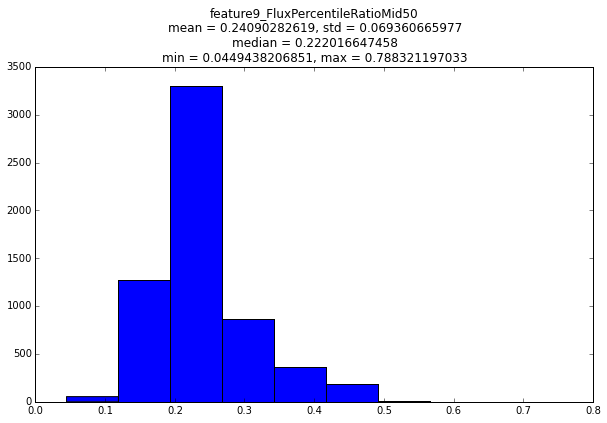

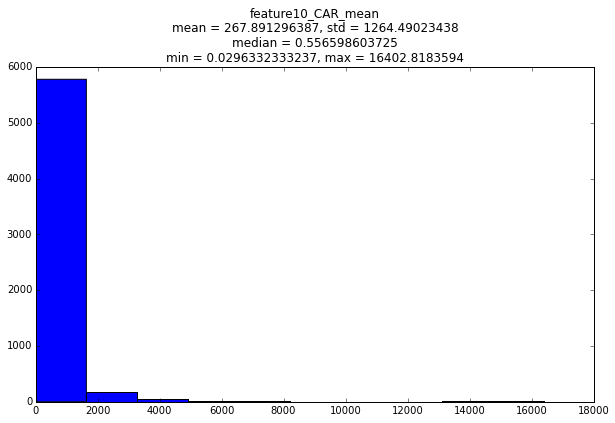

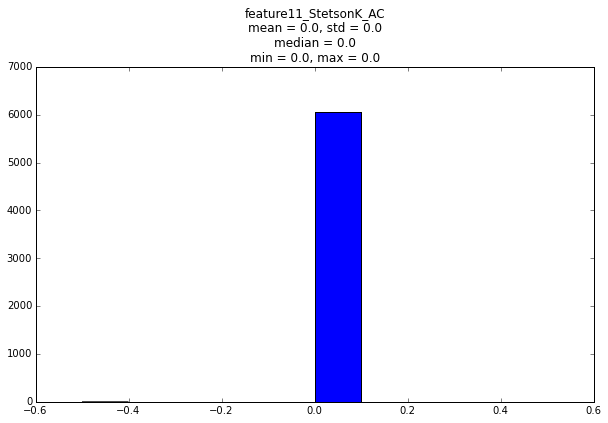

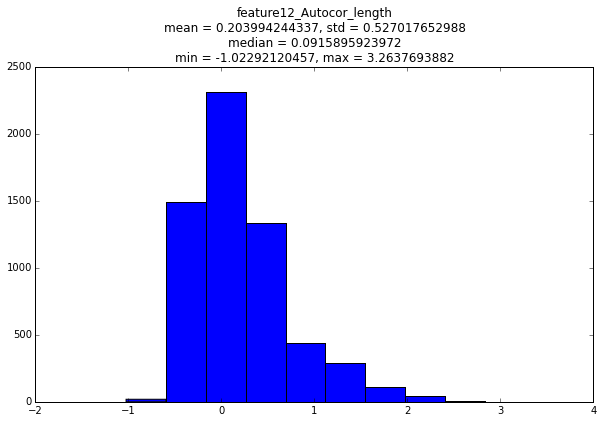

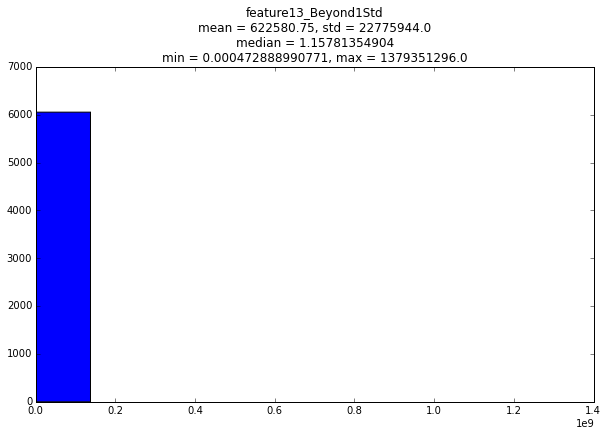

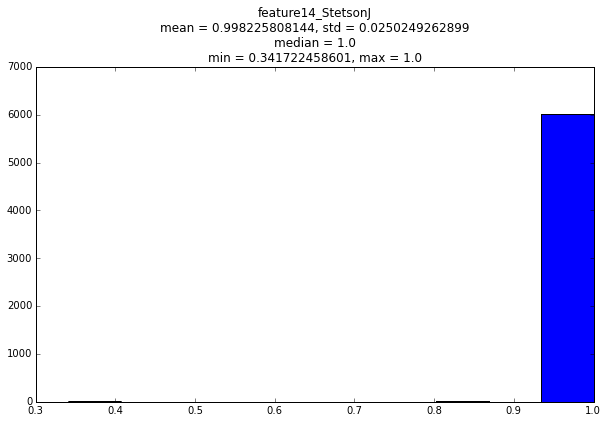

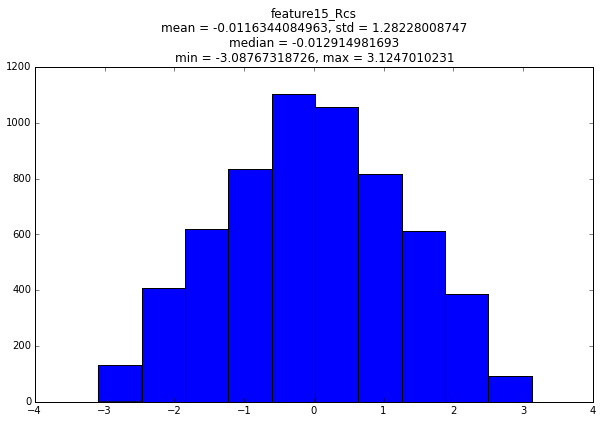

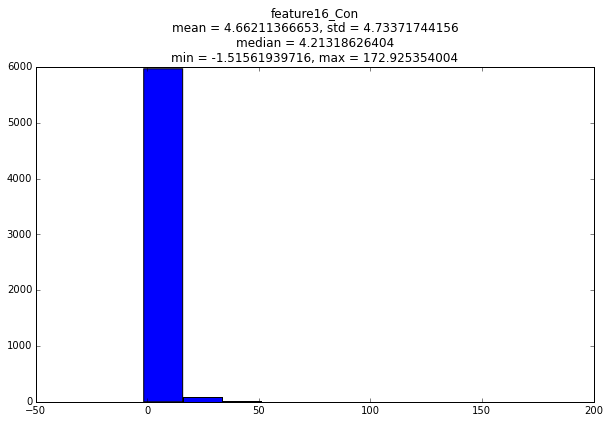

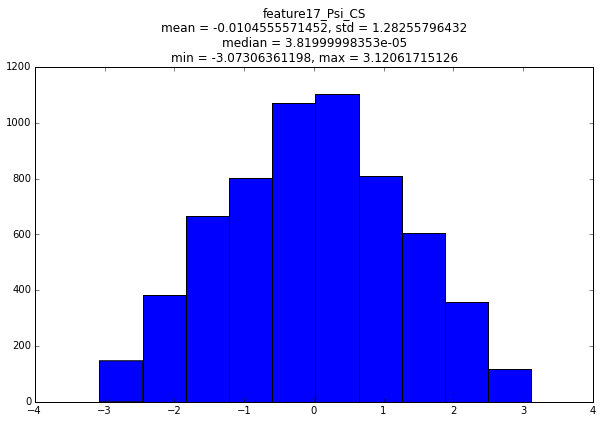

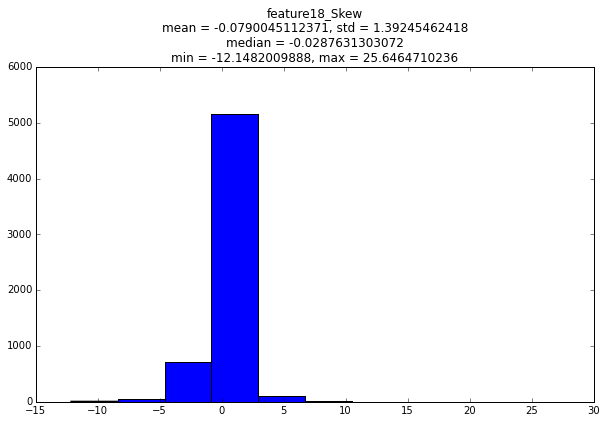

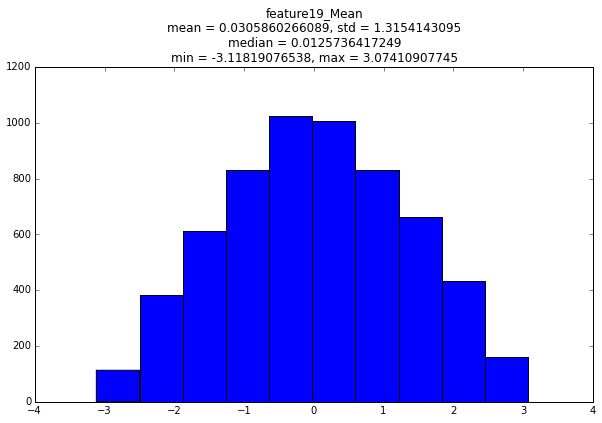

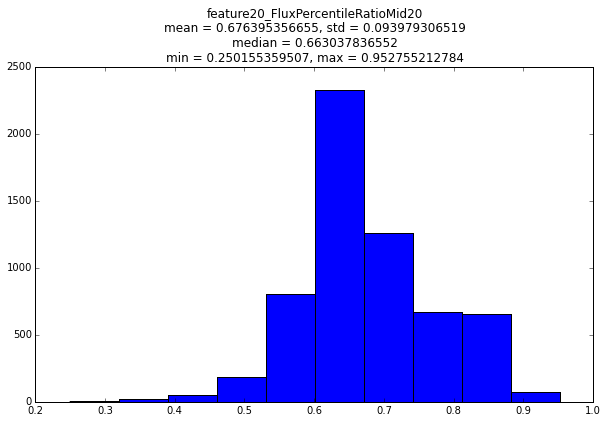

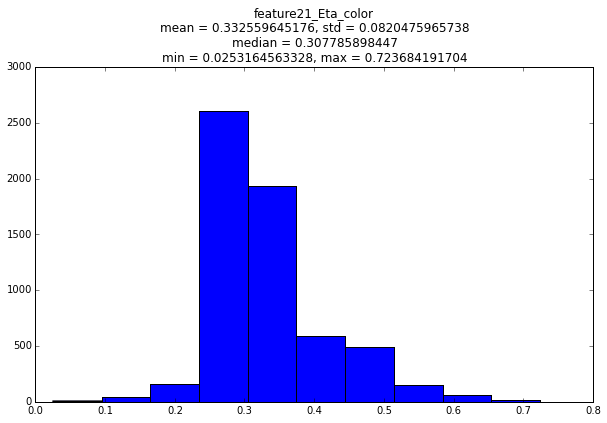

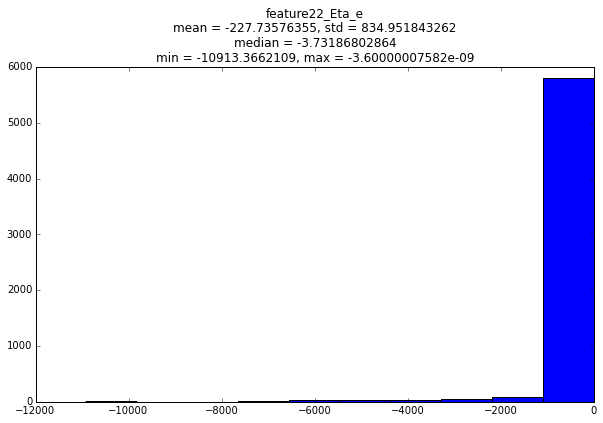

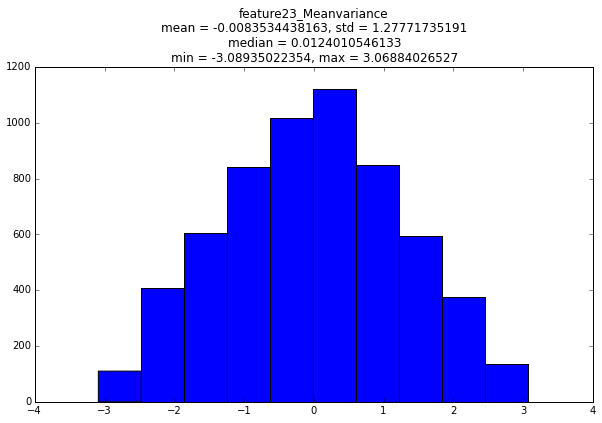

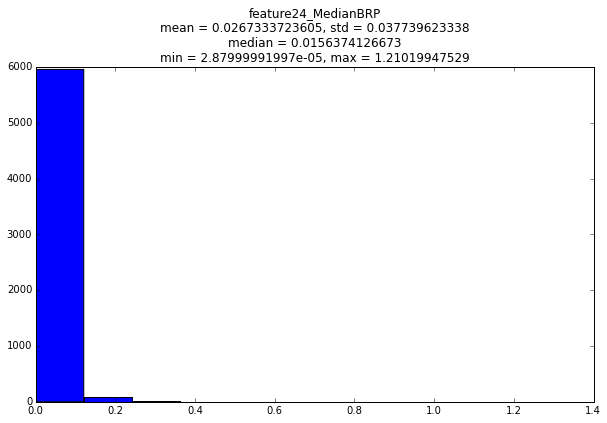

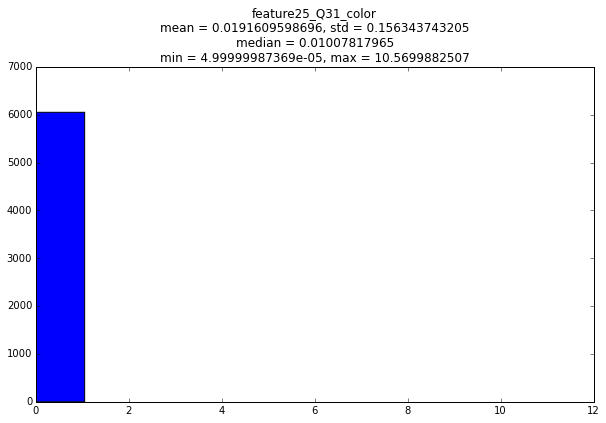

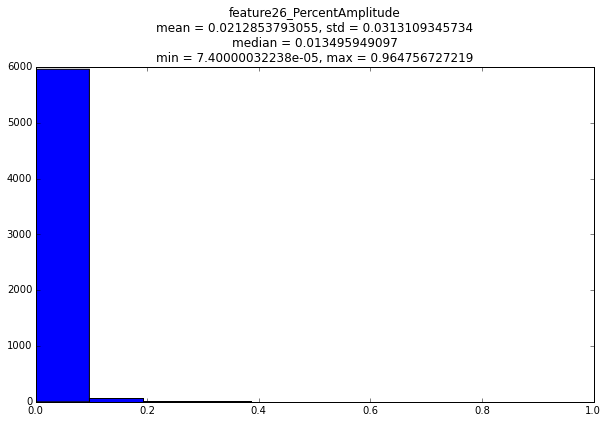

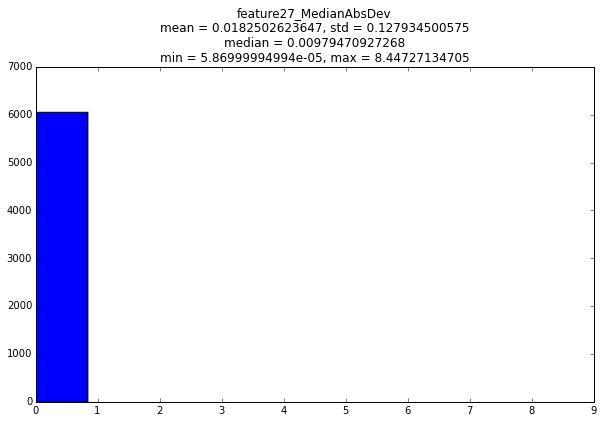

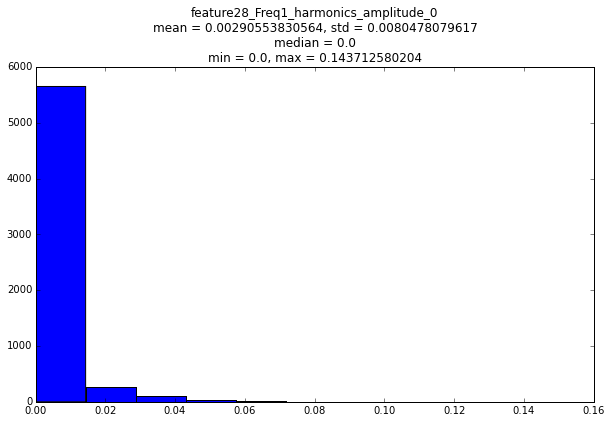

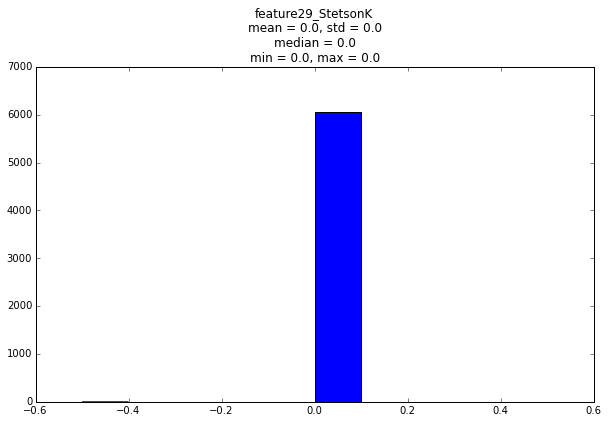

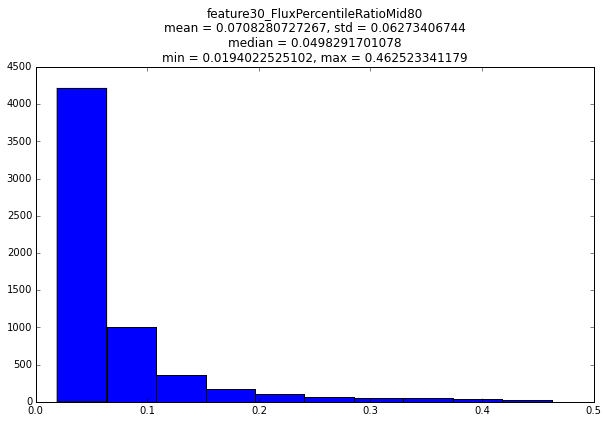

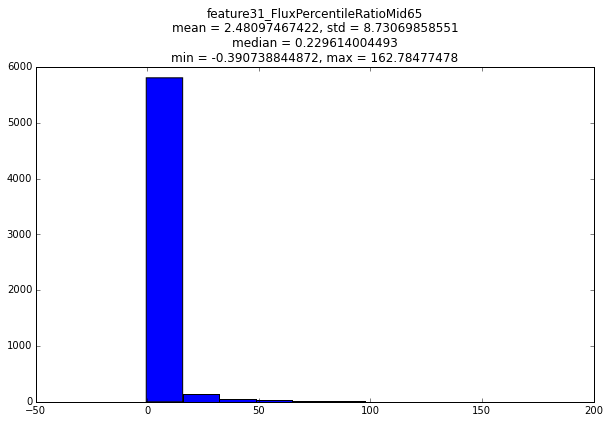

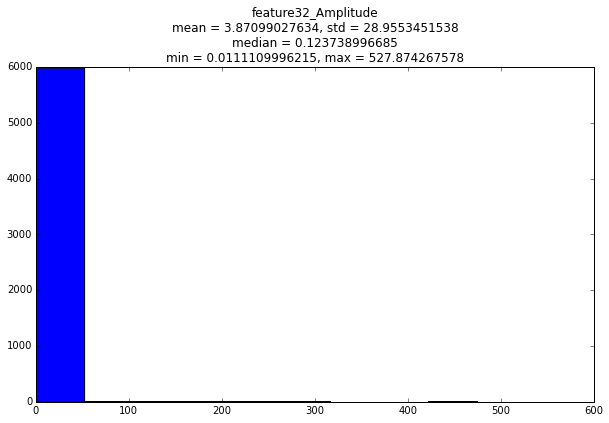

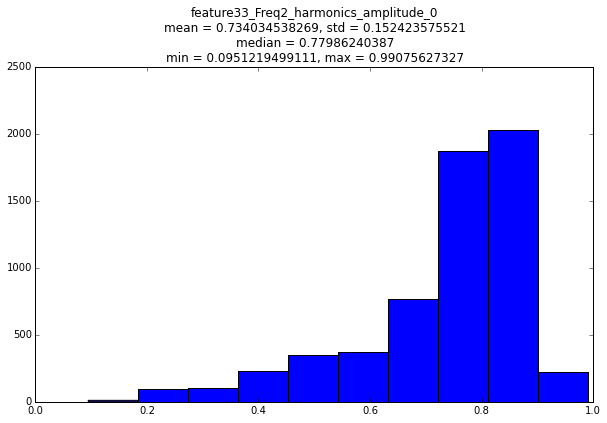

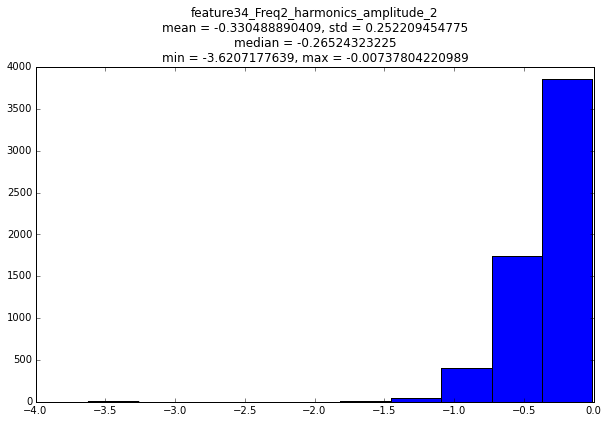

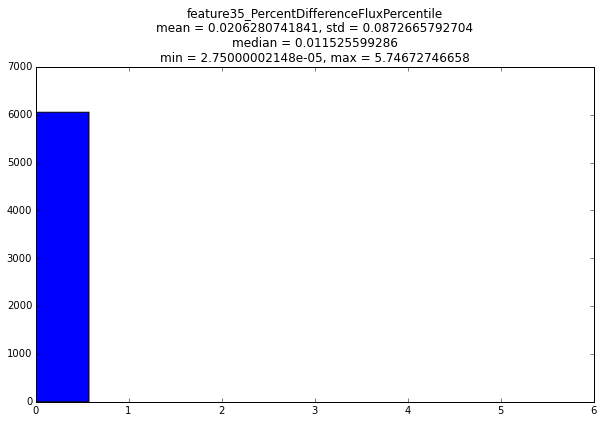

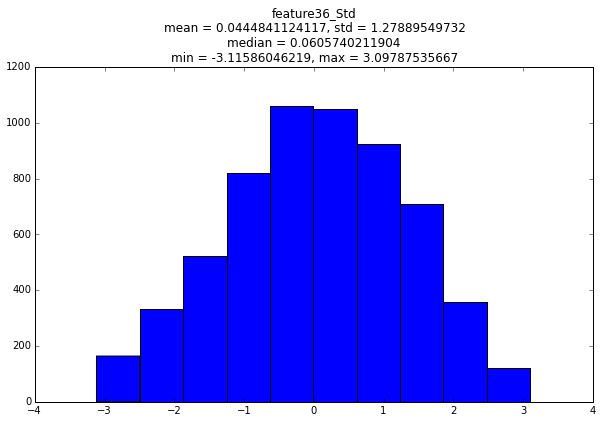

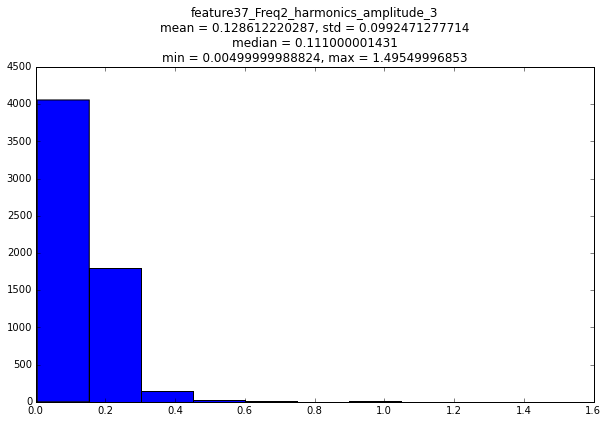

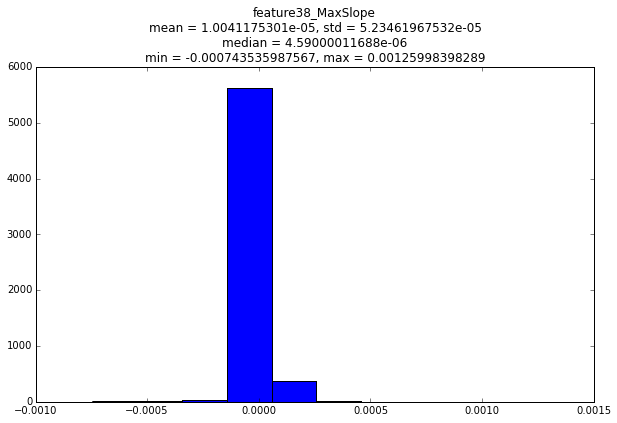

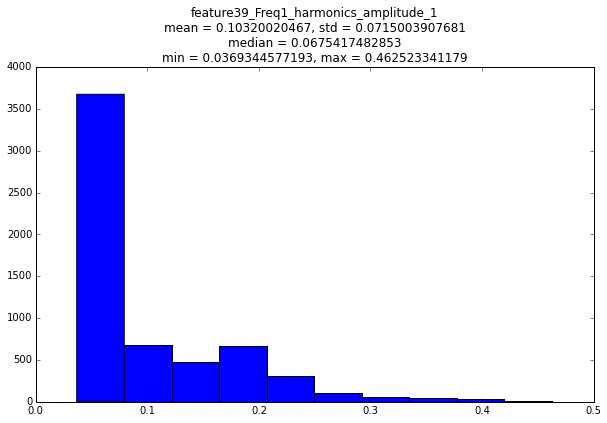

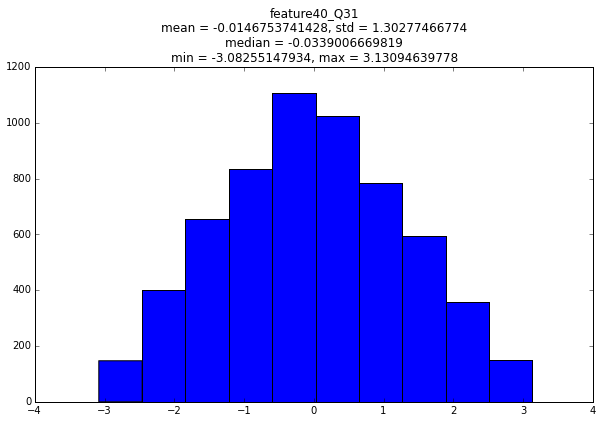

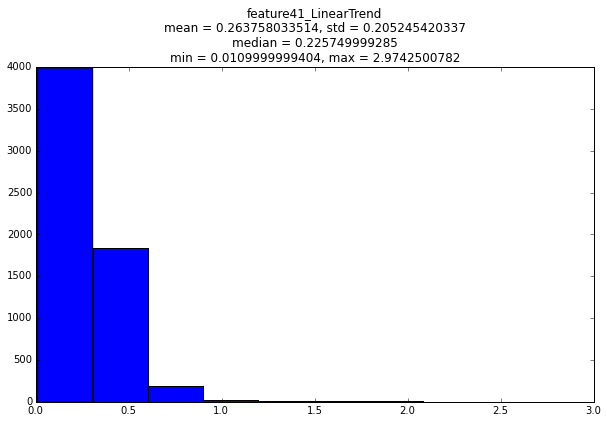

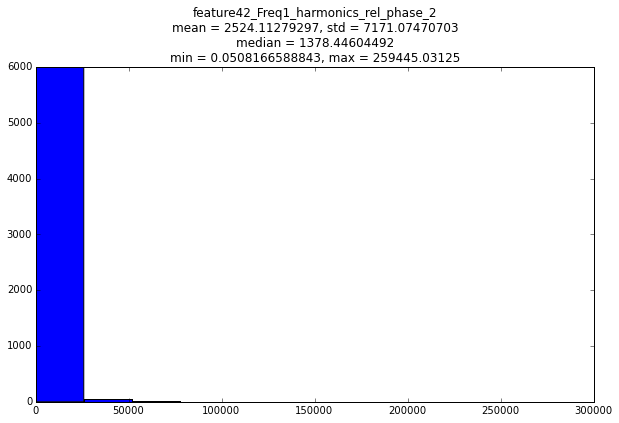

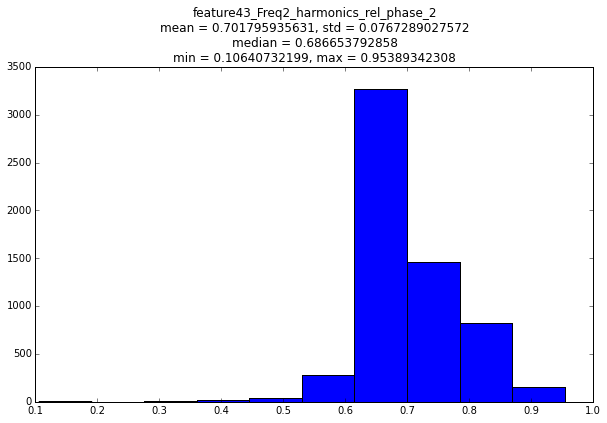

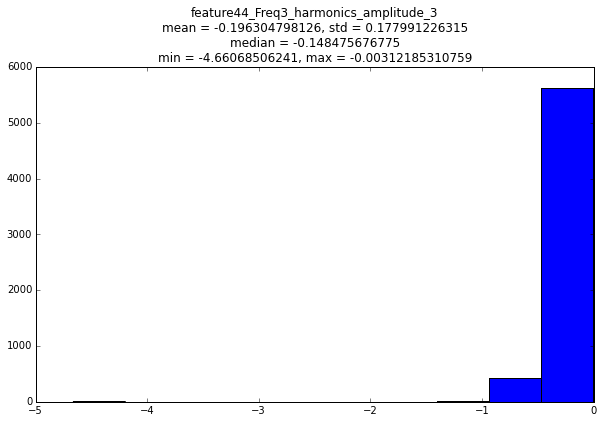

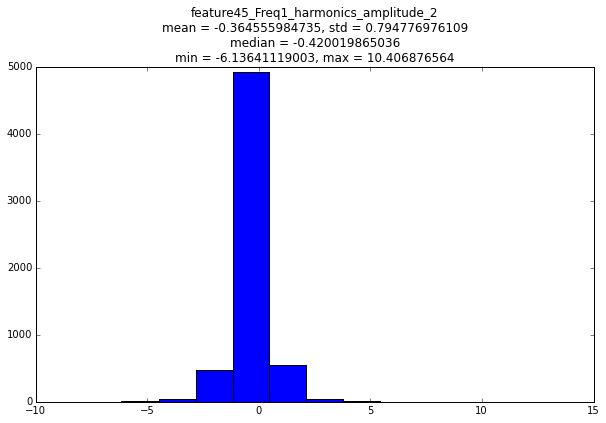

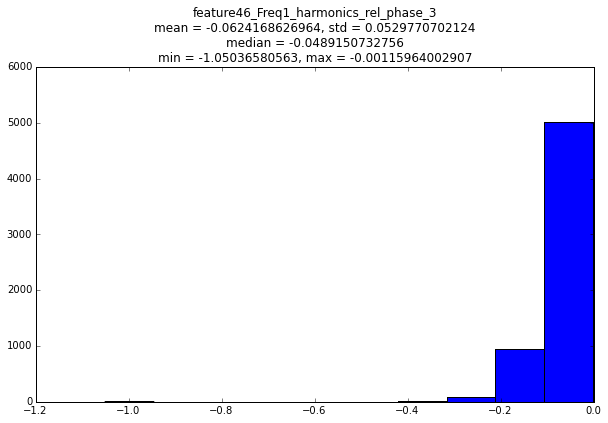

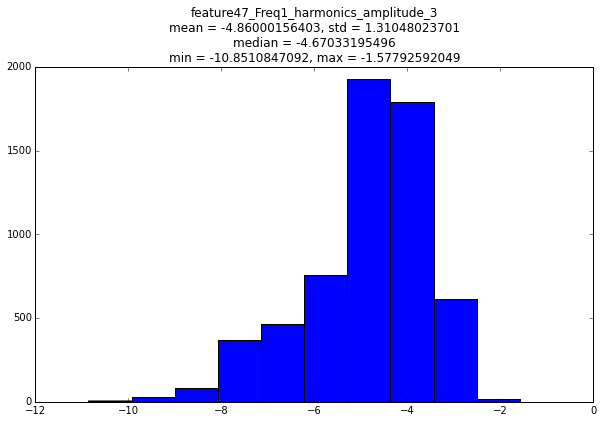

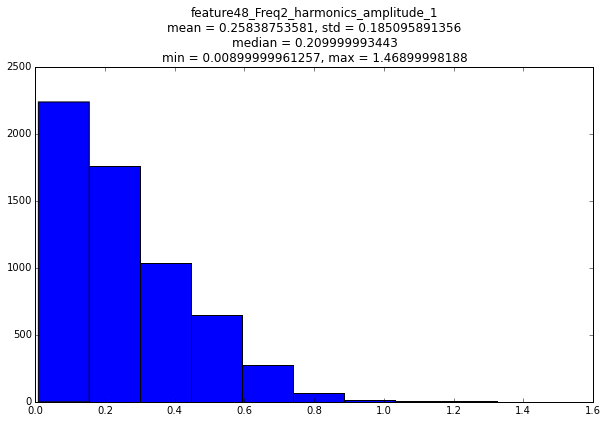

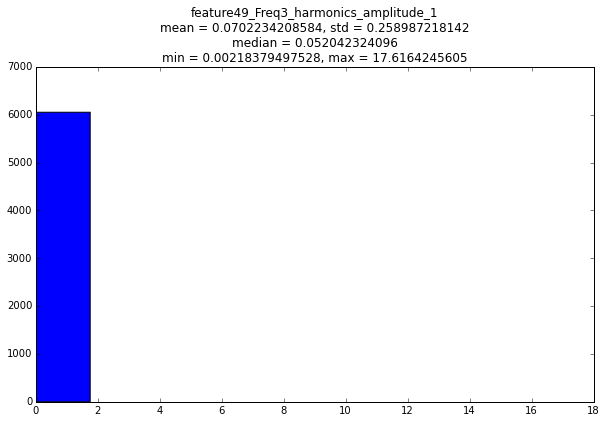

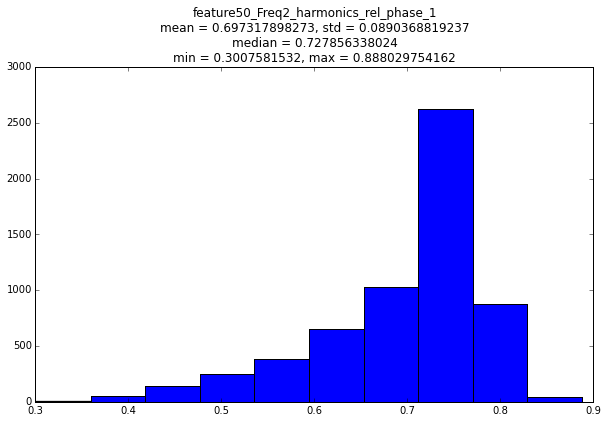

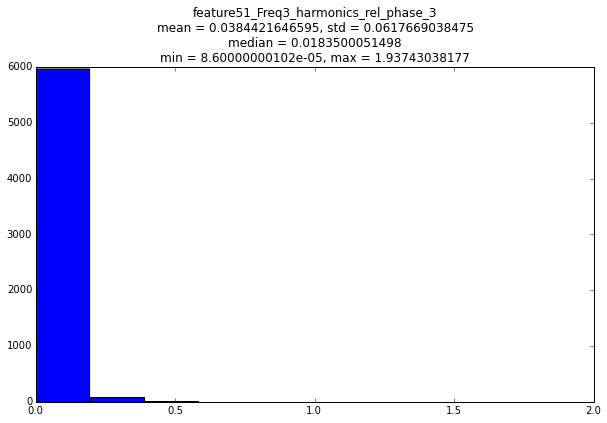

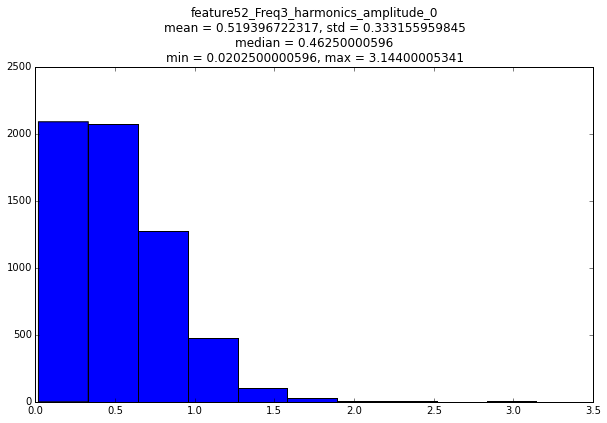

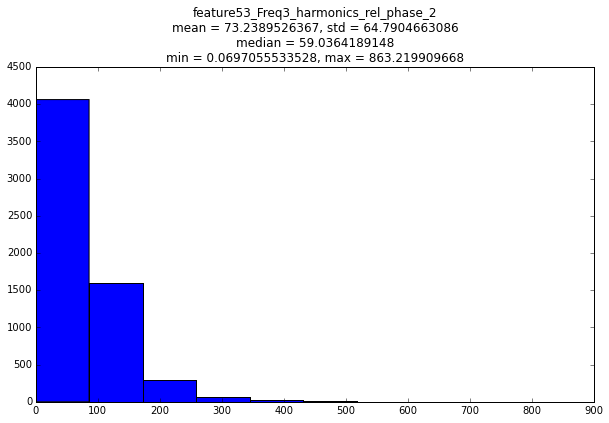

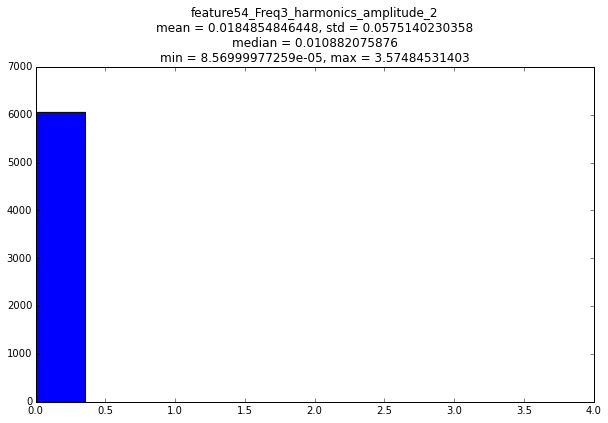

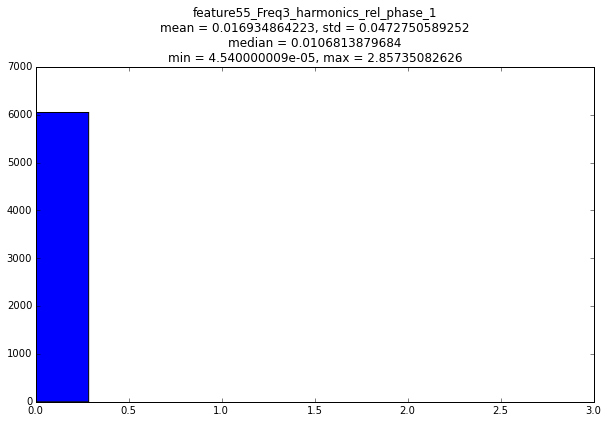

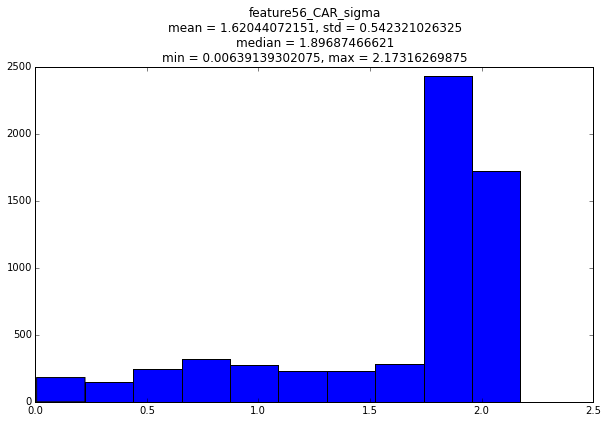

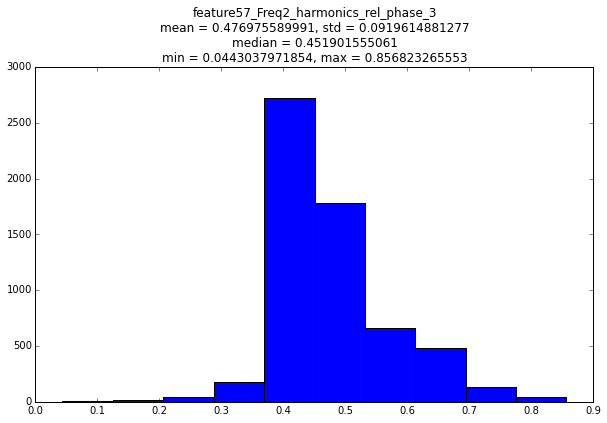

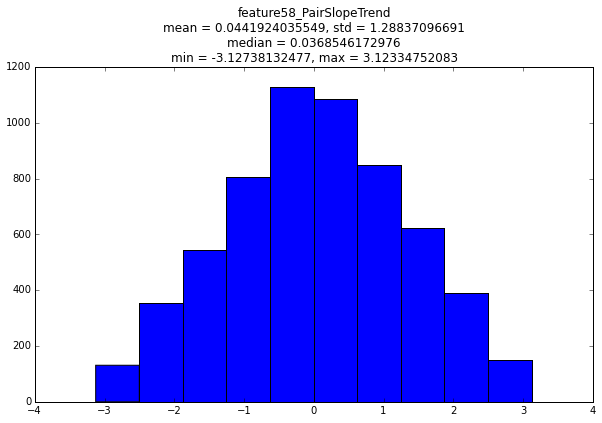

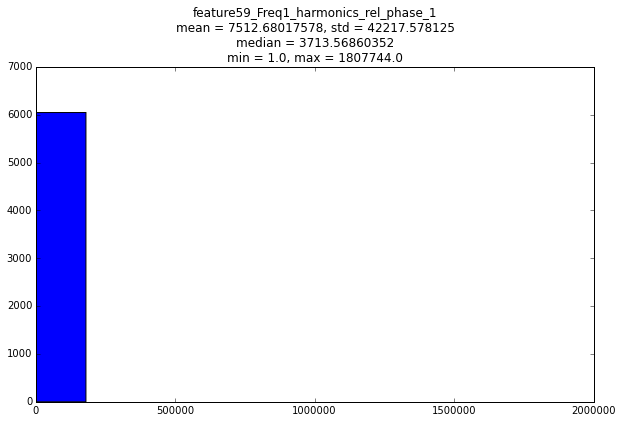

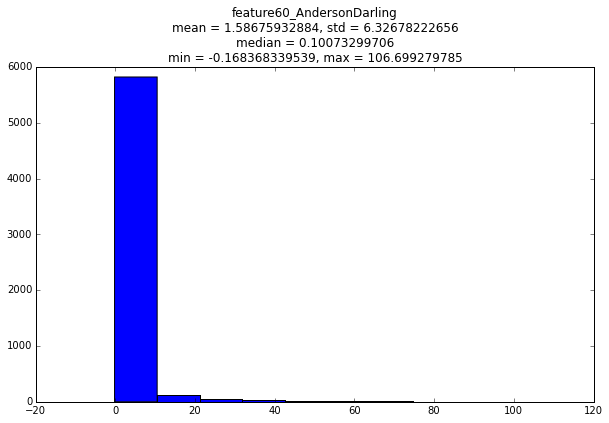

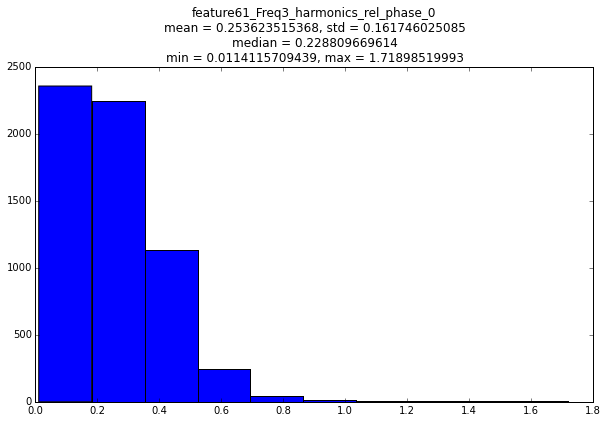

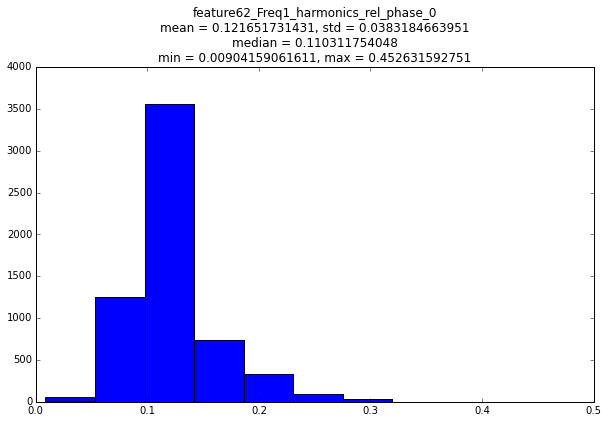

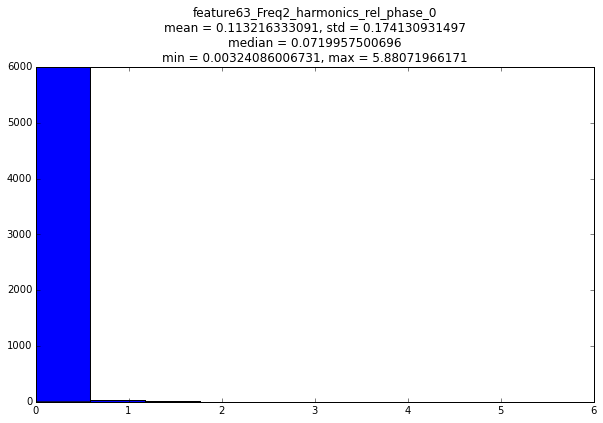

In [19]:
for i in range(len(features_order)):
    X_feature = X[:,i]
    plot_histogram('feature{0}_{1}'.format(i, feature_names[i]), X_feature)

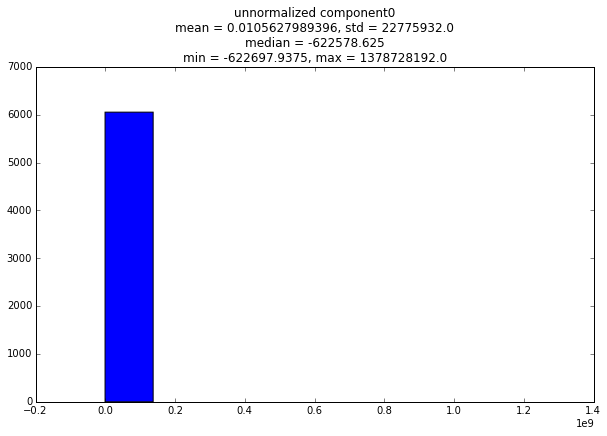

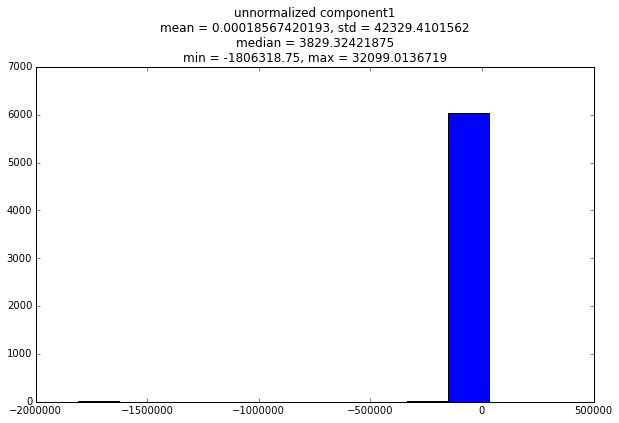

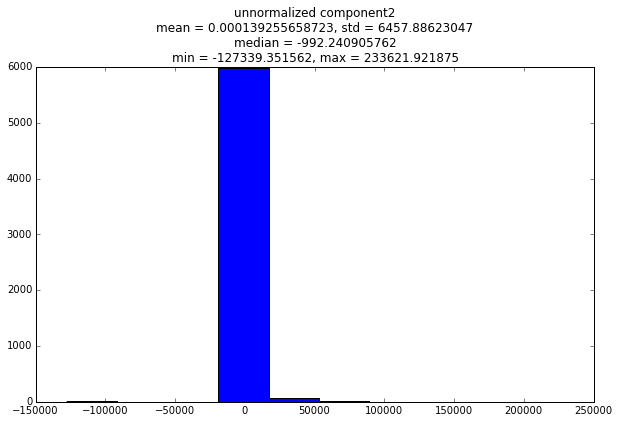

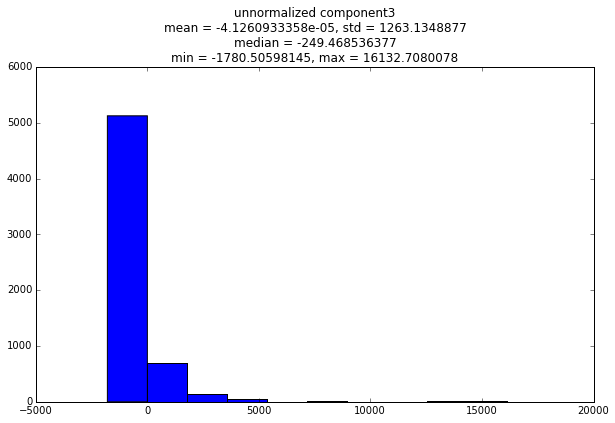

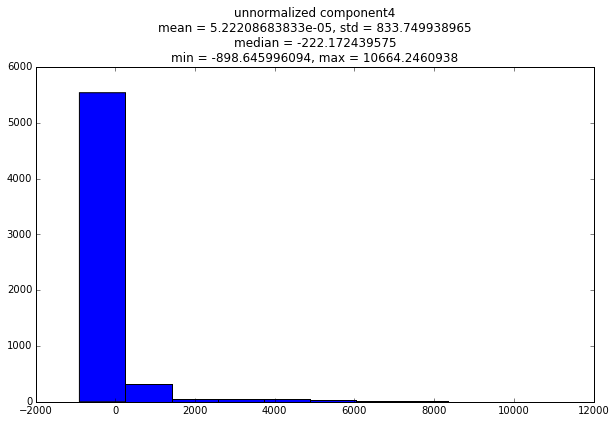

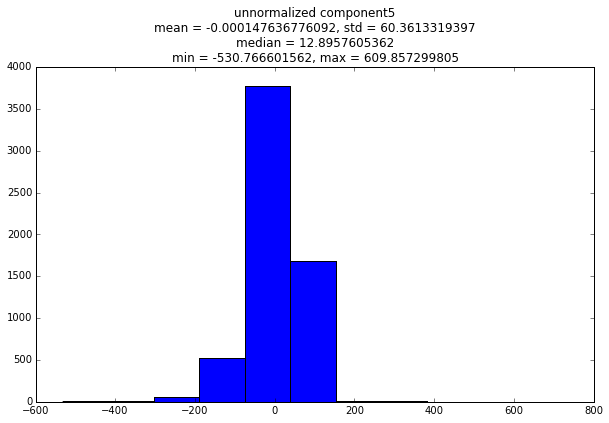

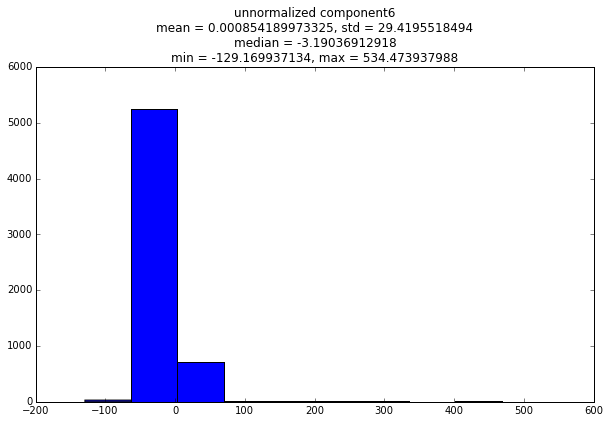

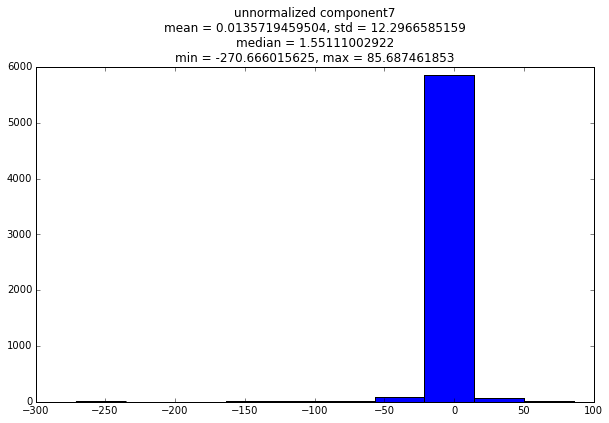

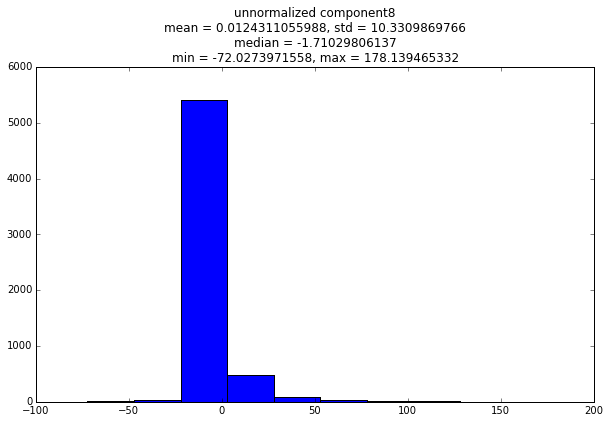

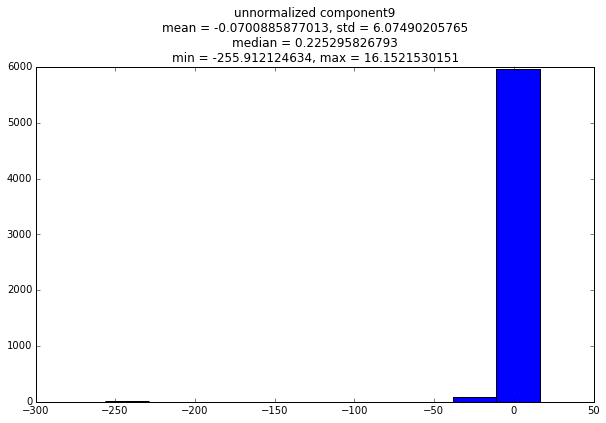

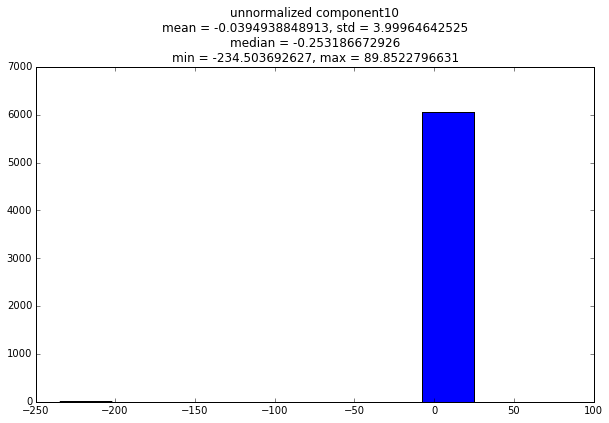

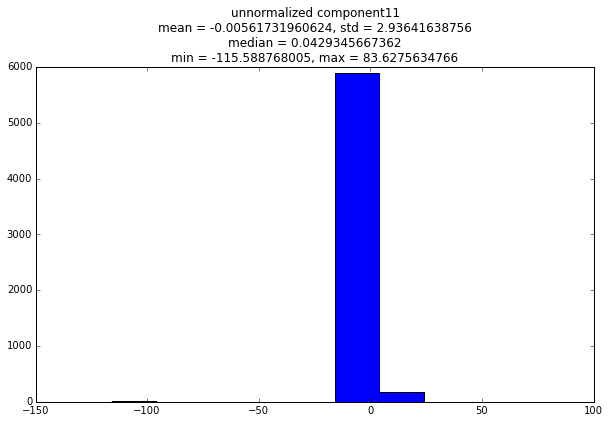

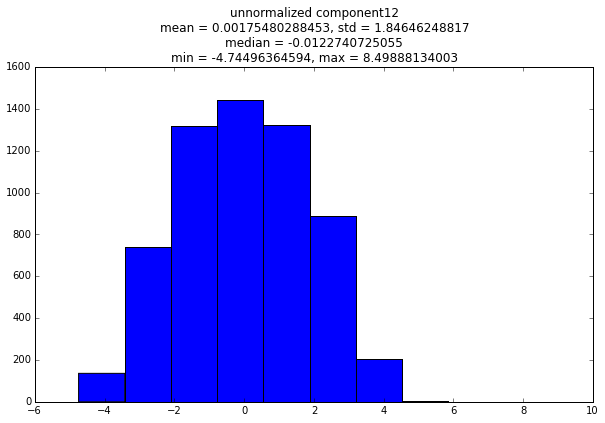

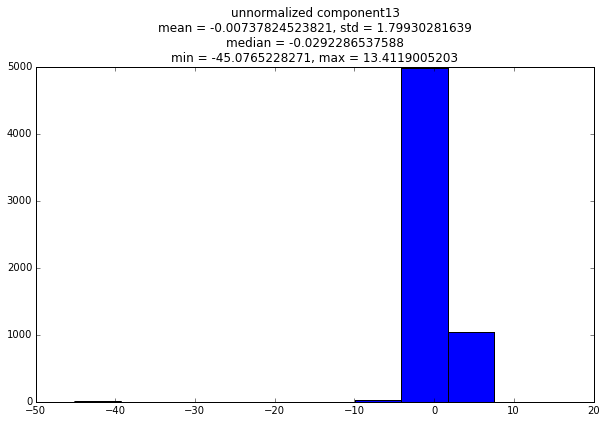

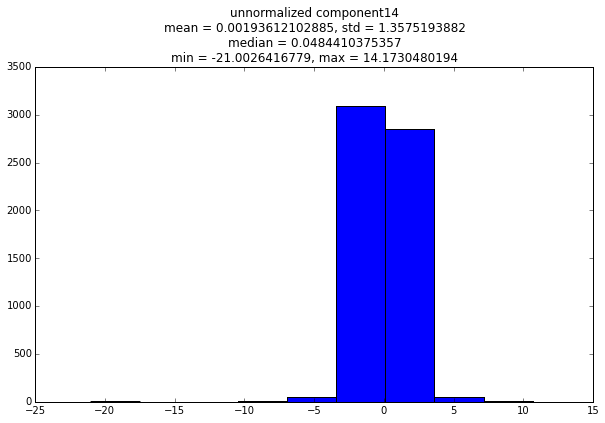

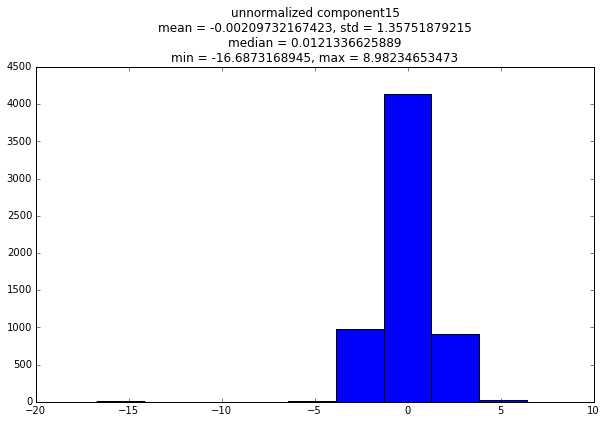

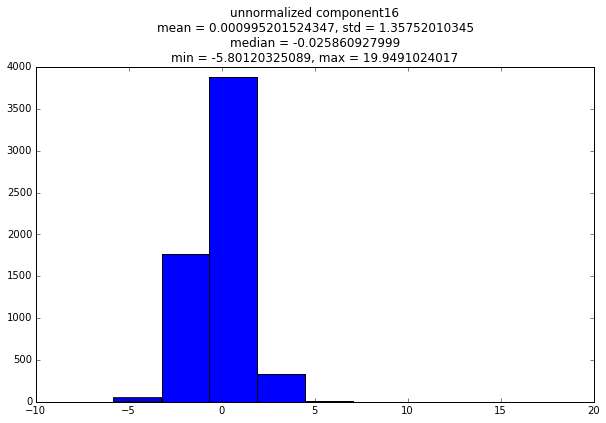

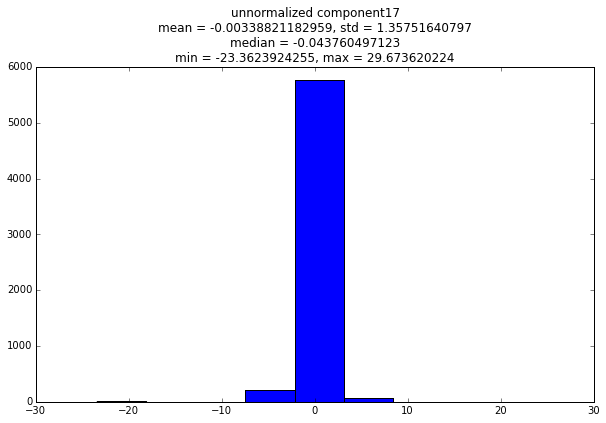

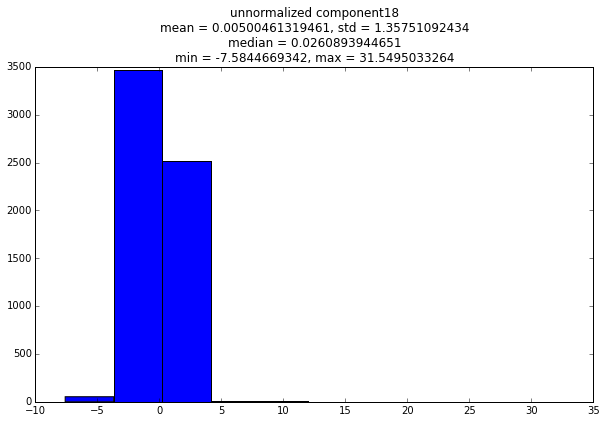

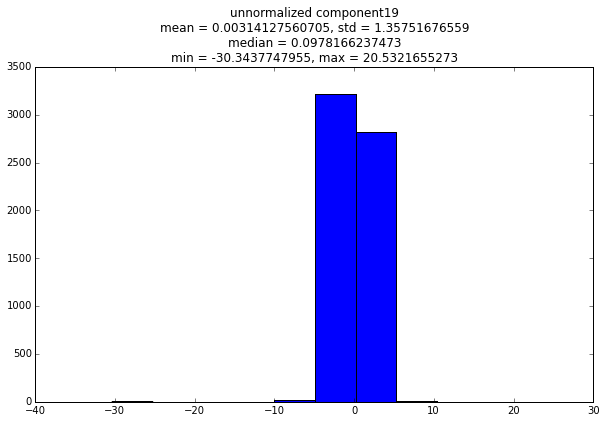

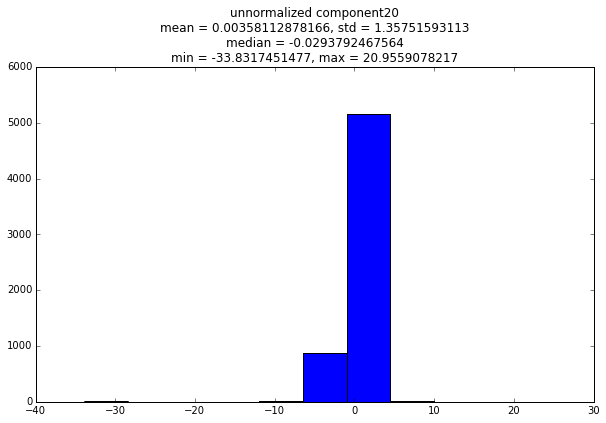

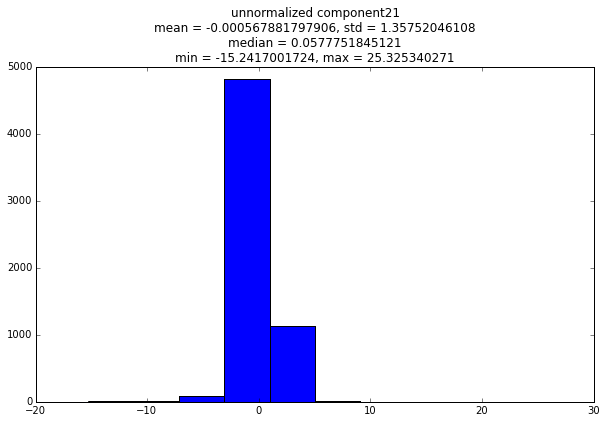

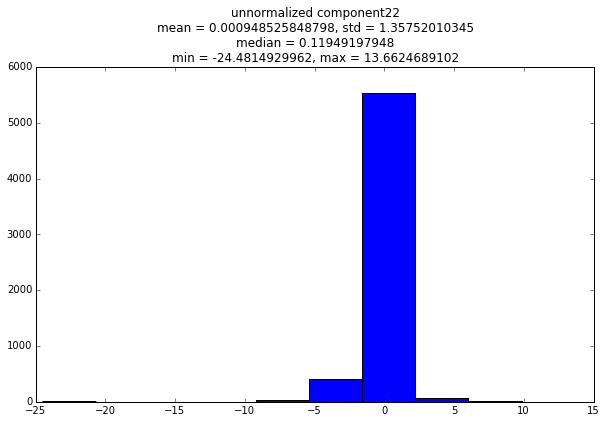

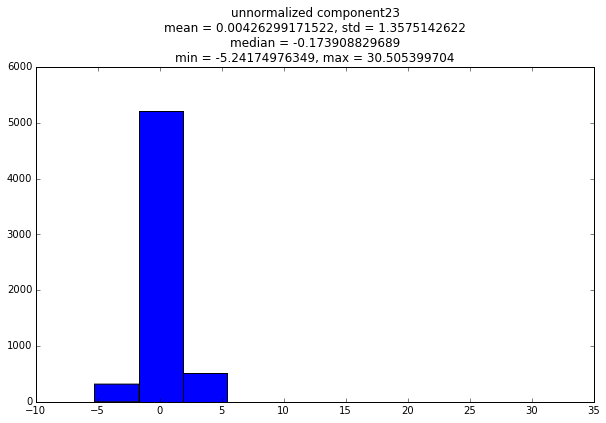

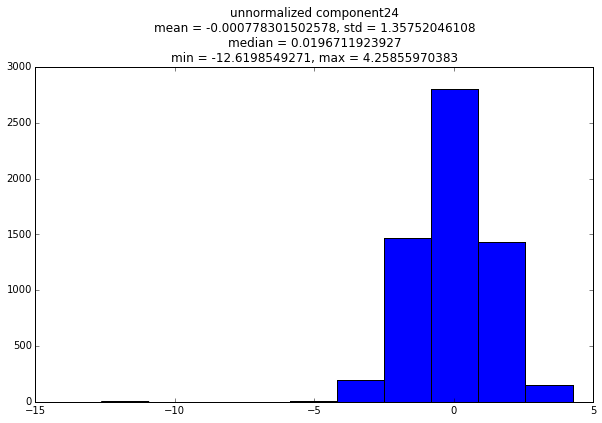

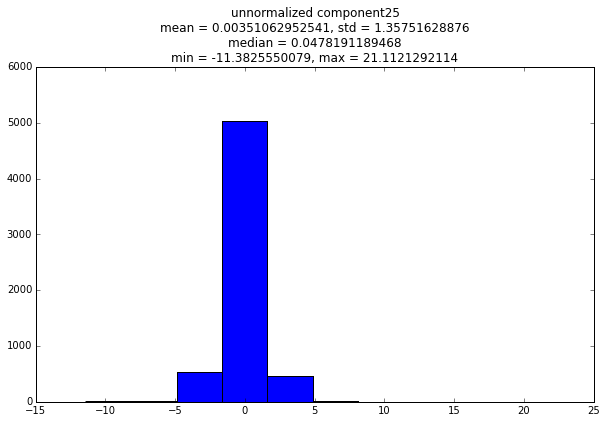

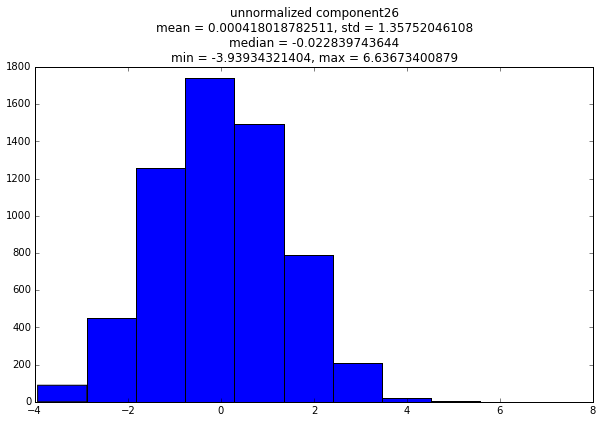

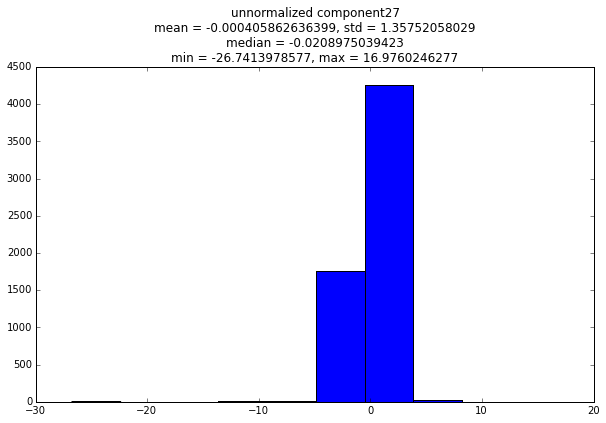

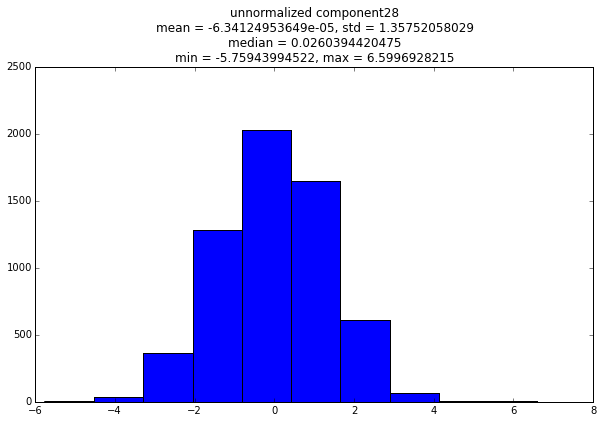

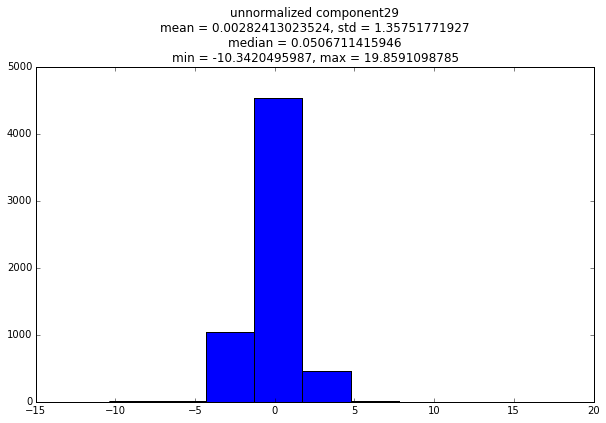

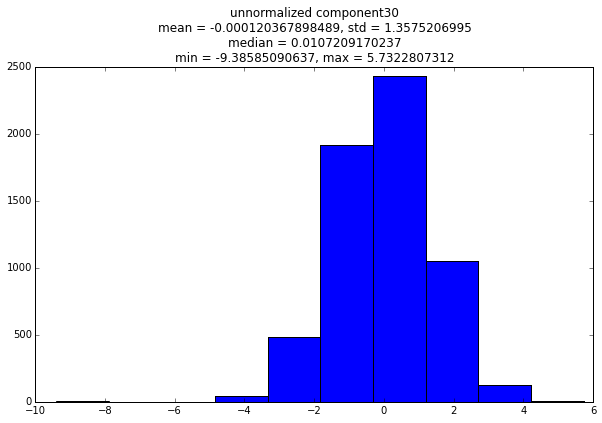

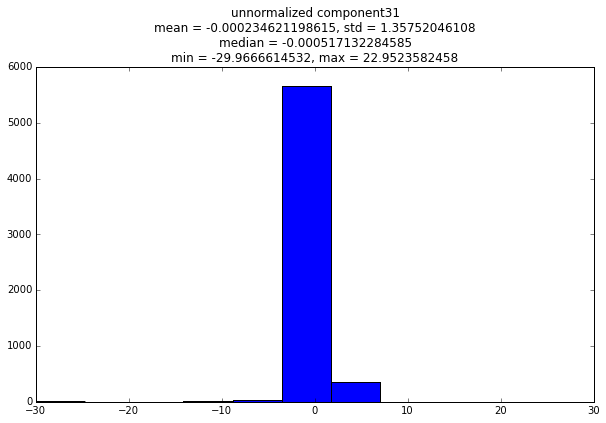

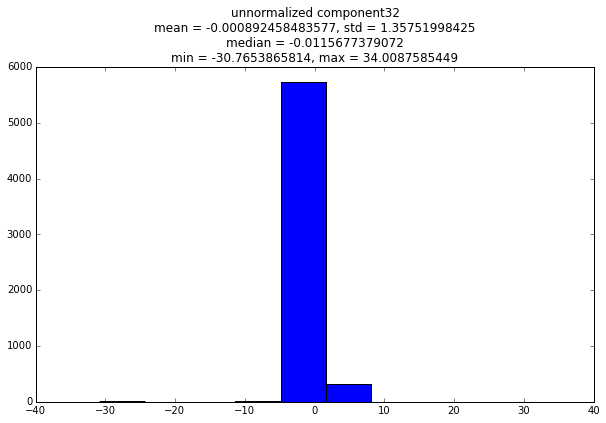

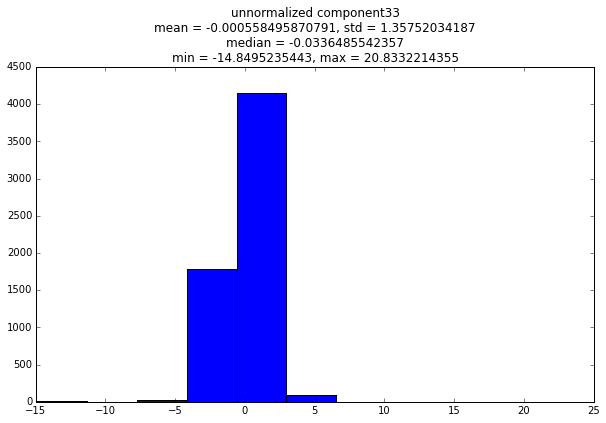

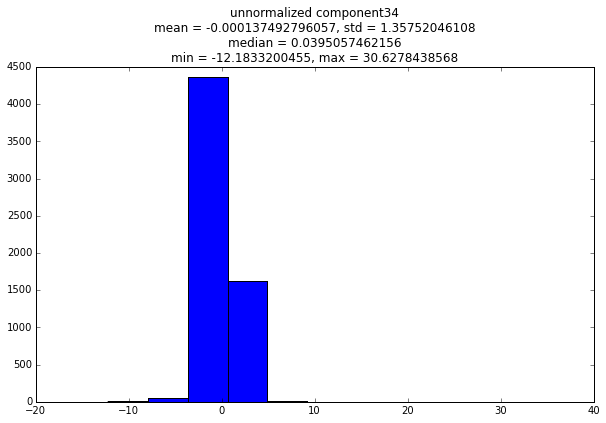

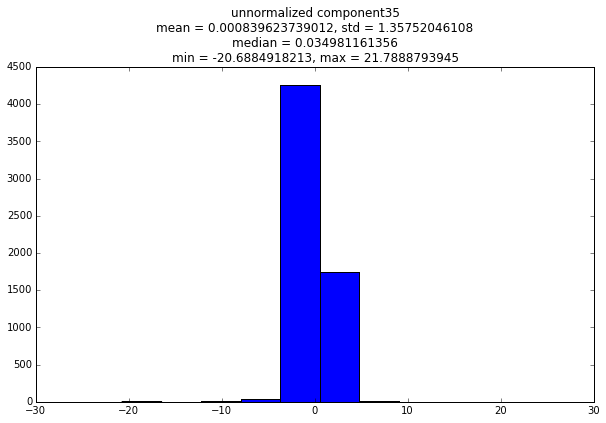

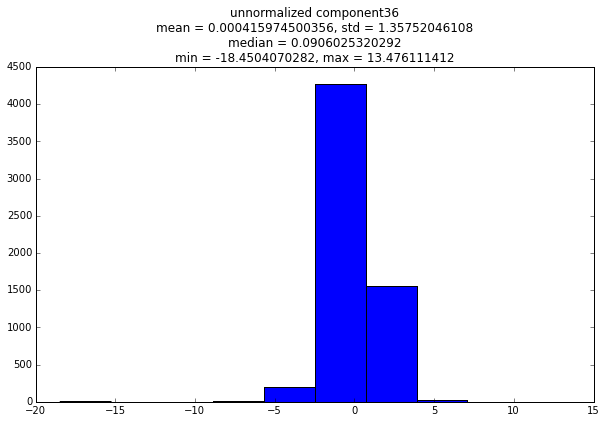

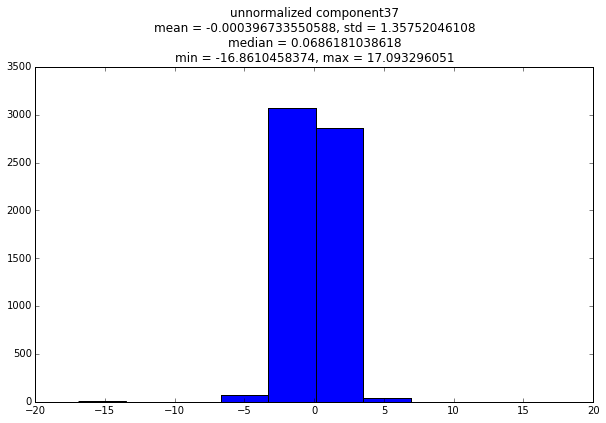

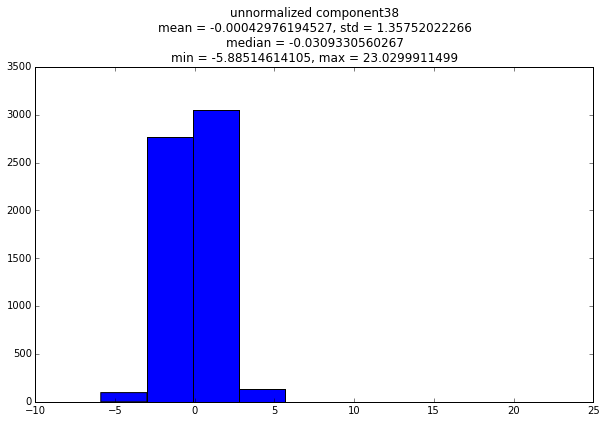

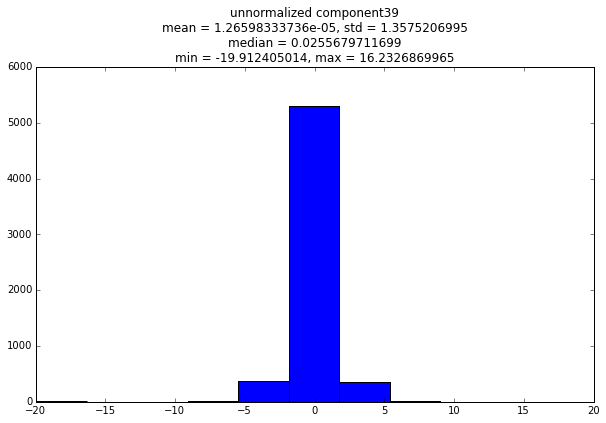

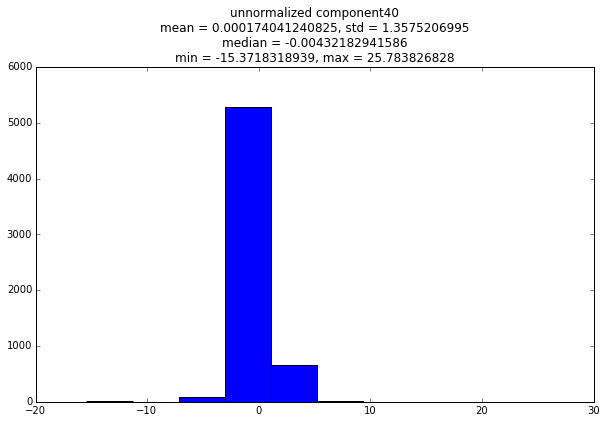

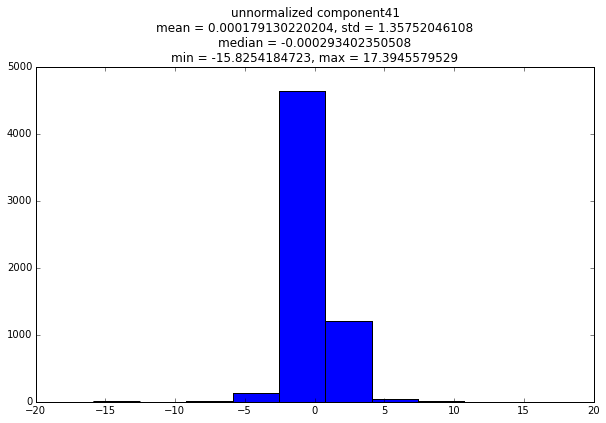

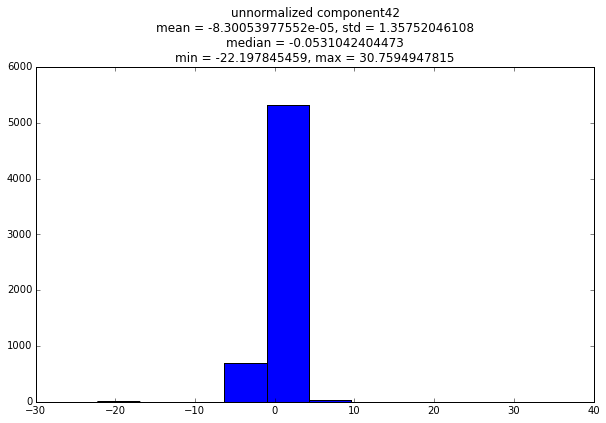

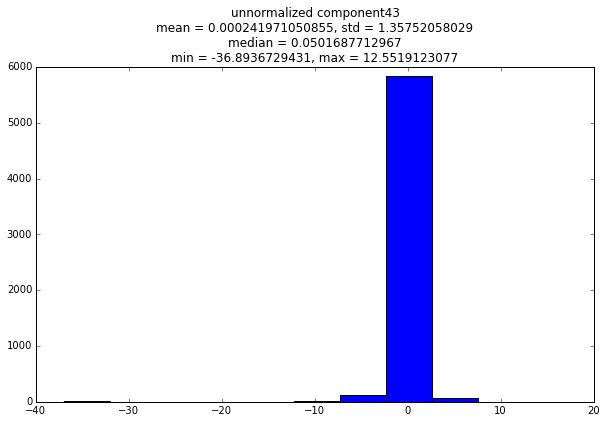

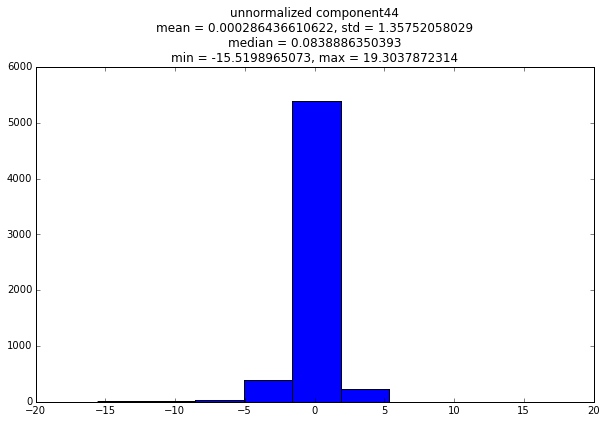

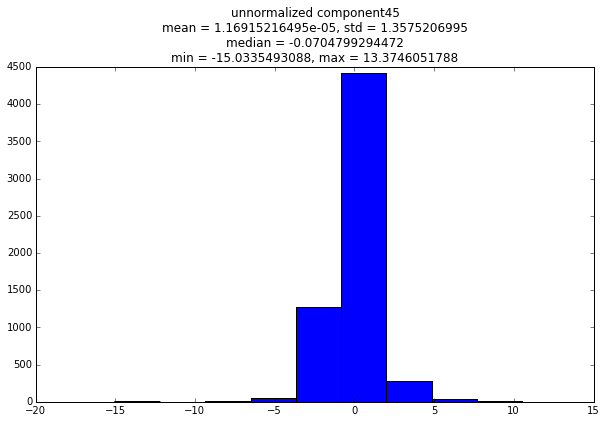

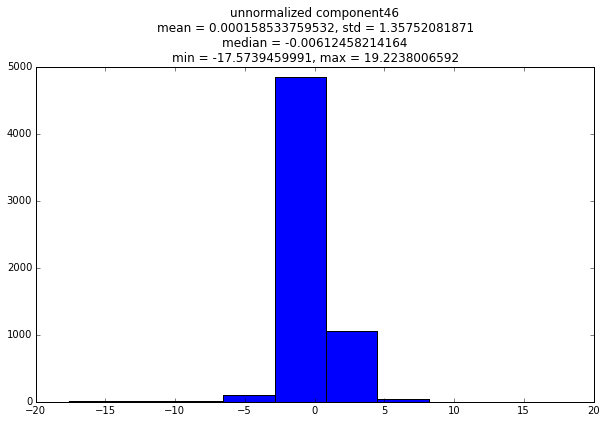

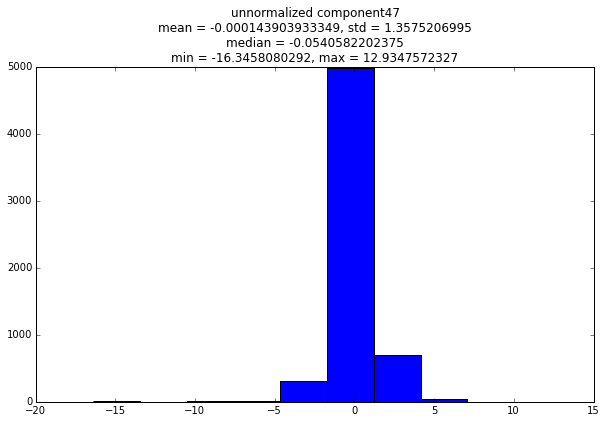

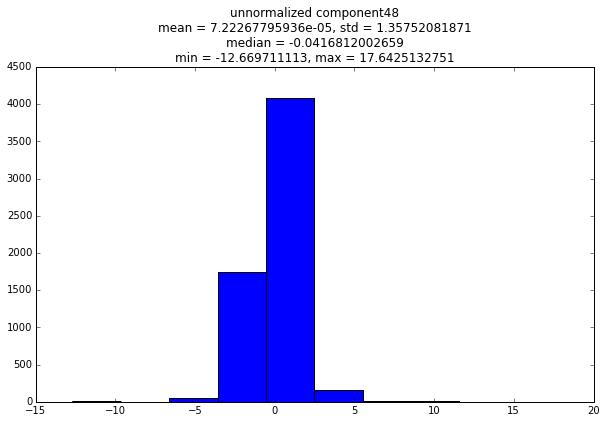

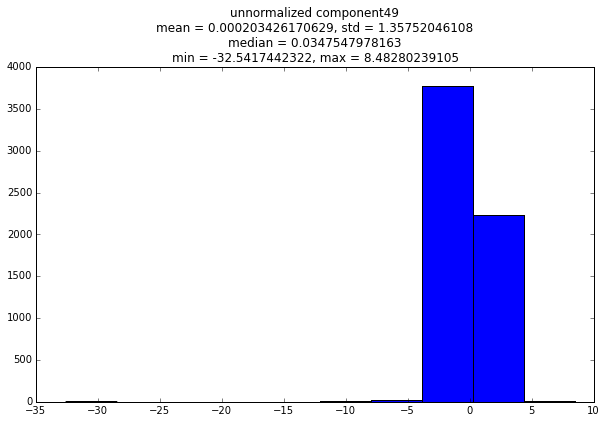

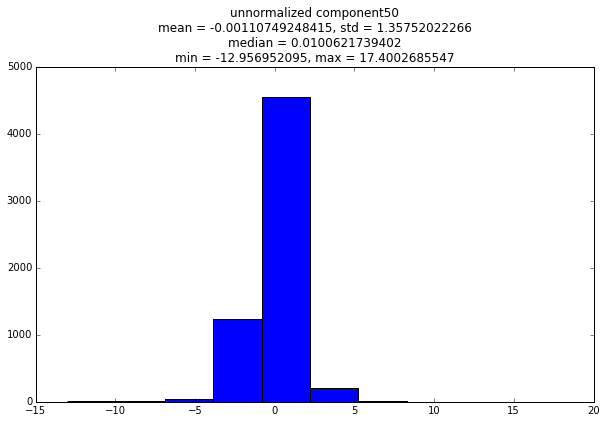

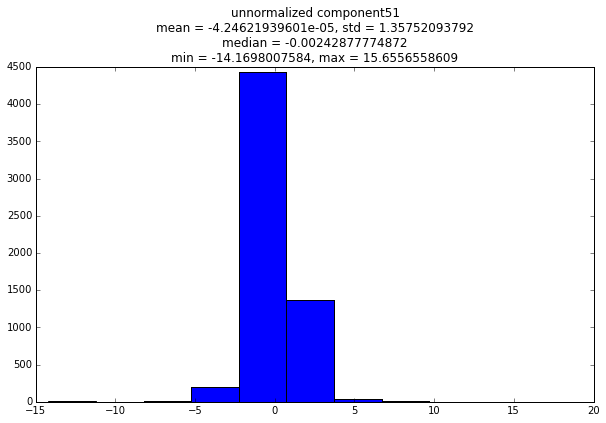

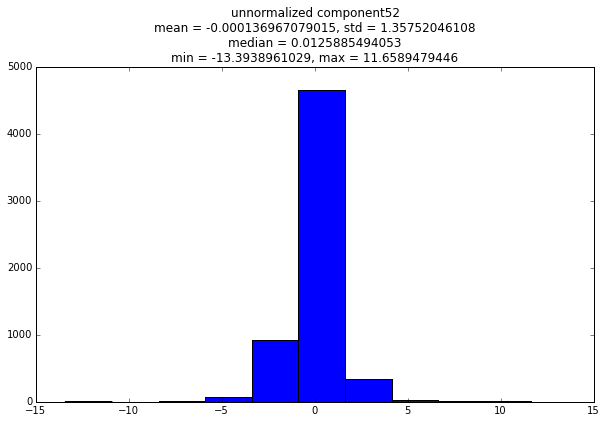

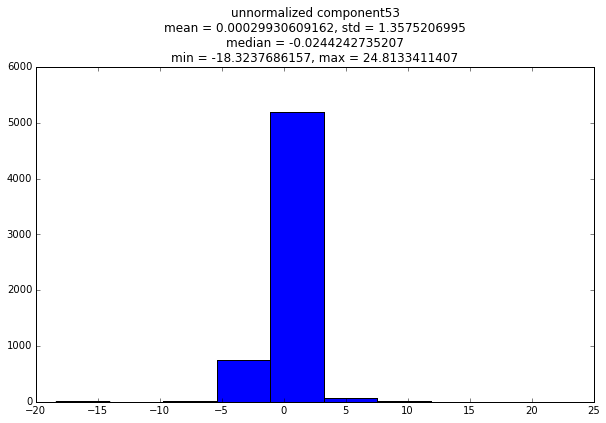

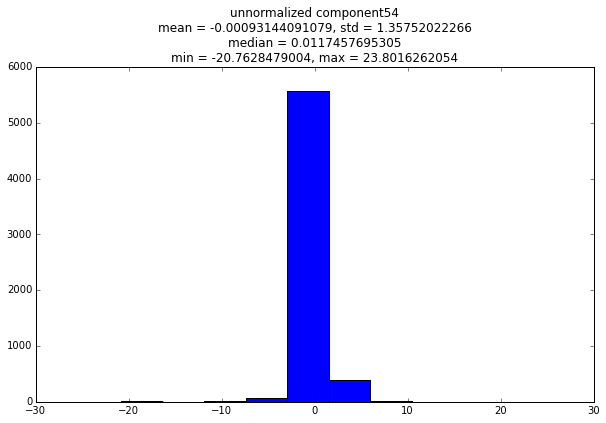

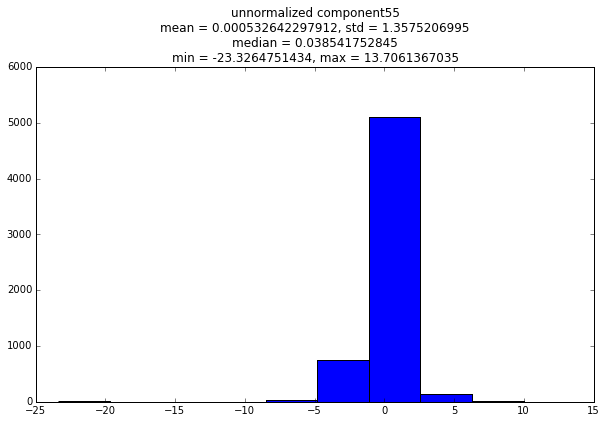

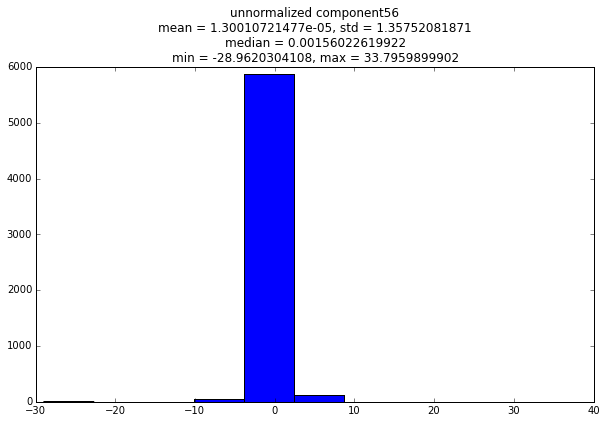

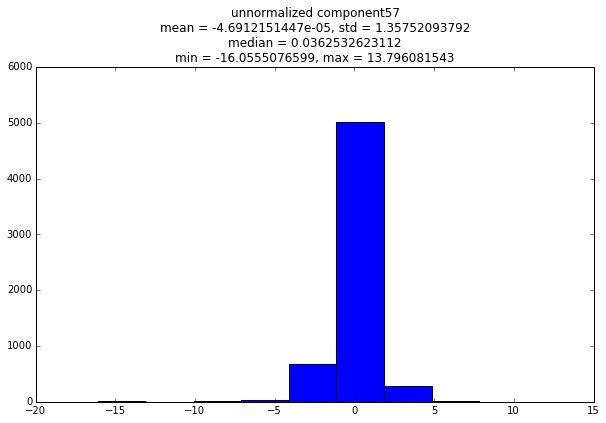

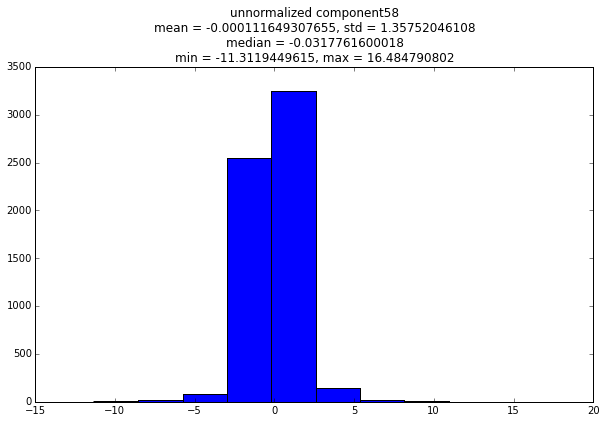

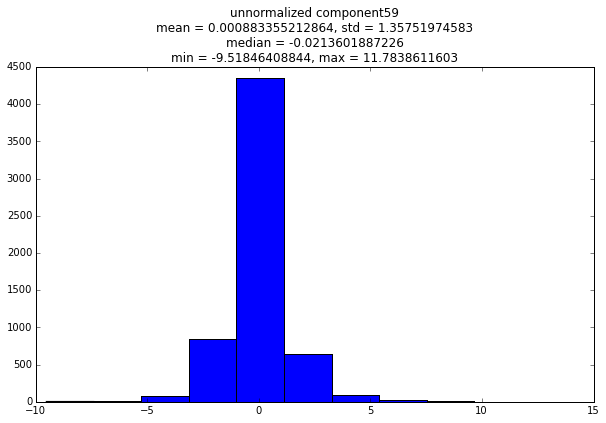

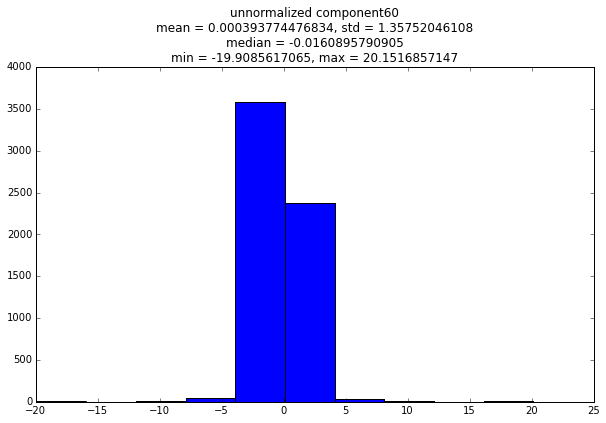

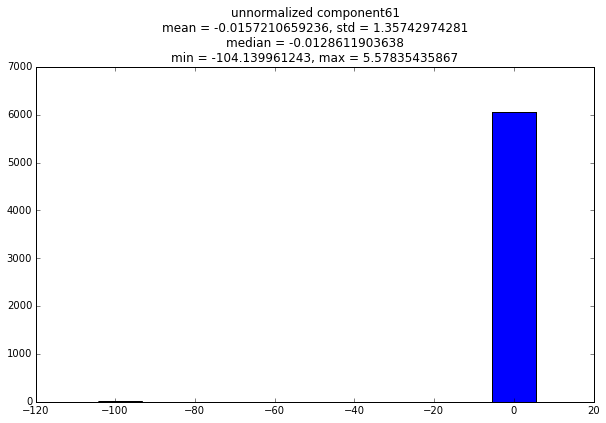

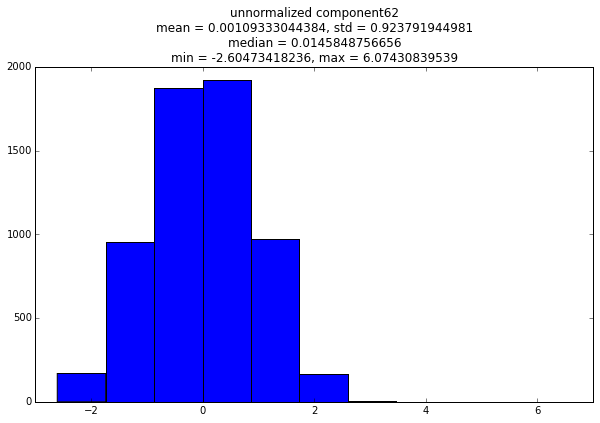

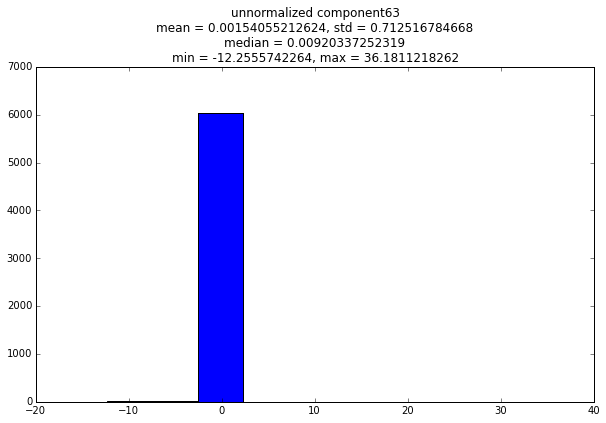

In [20]:
for i in range(len(features_order)):
    X_unnormalized_pca_feature = X_unnormalized_pca[:,i]
    plot_histogram('unnormalized component{0}'.format(i), X_unnormalized_pca_feature)

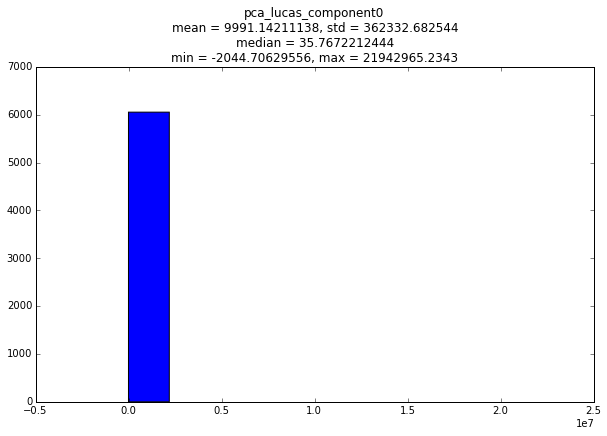

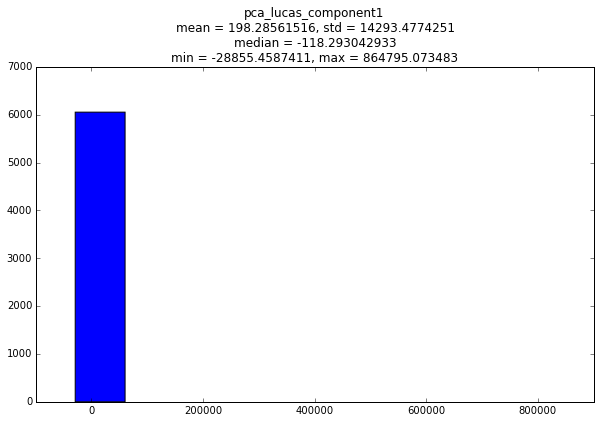

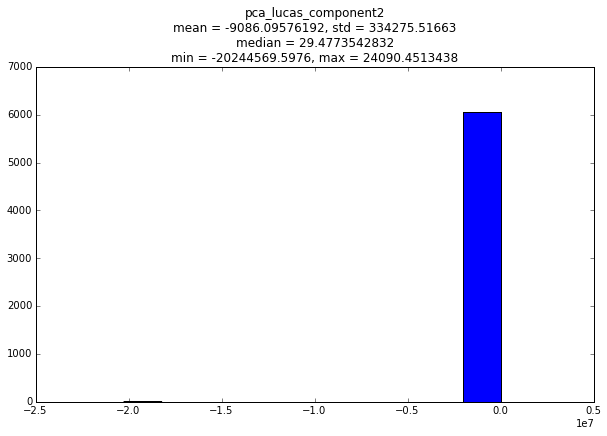

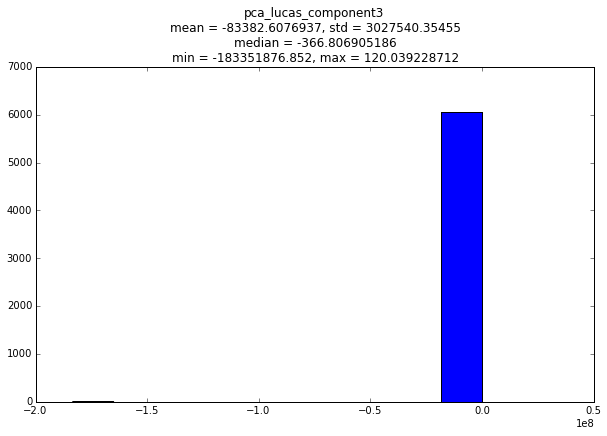

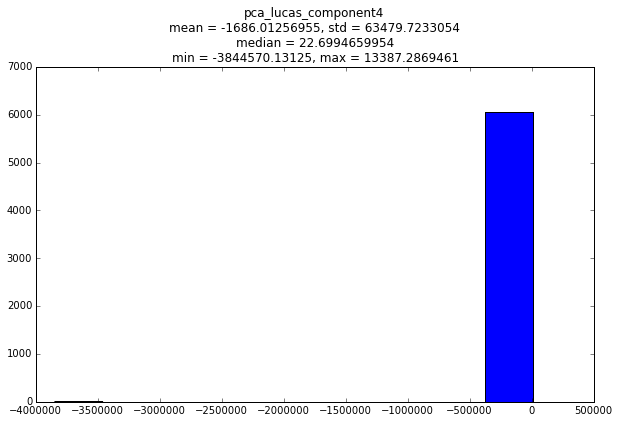

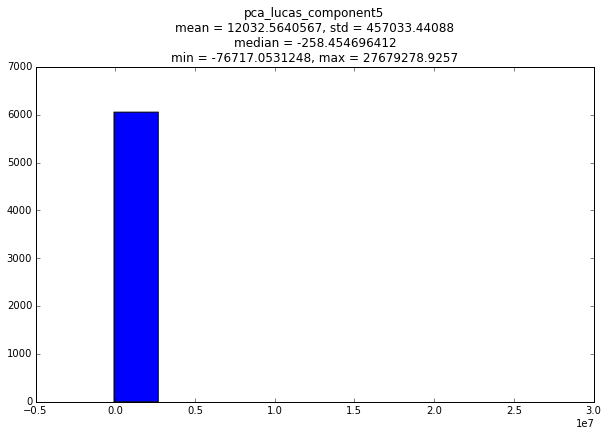

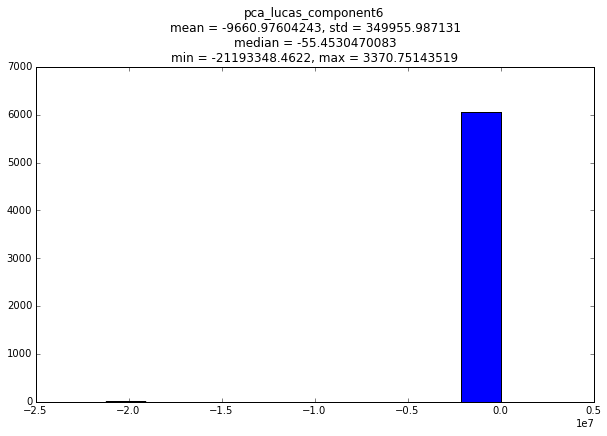

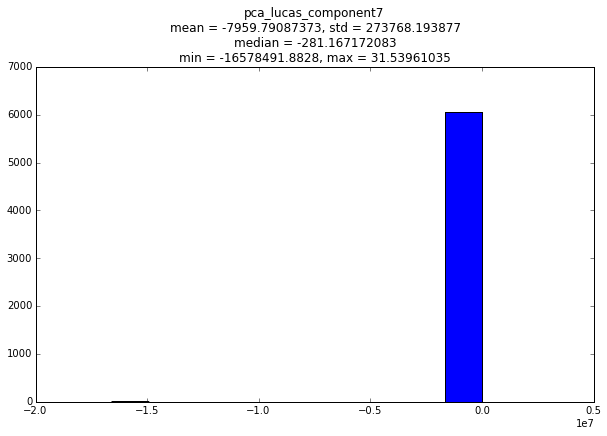

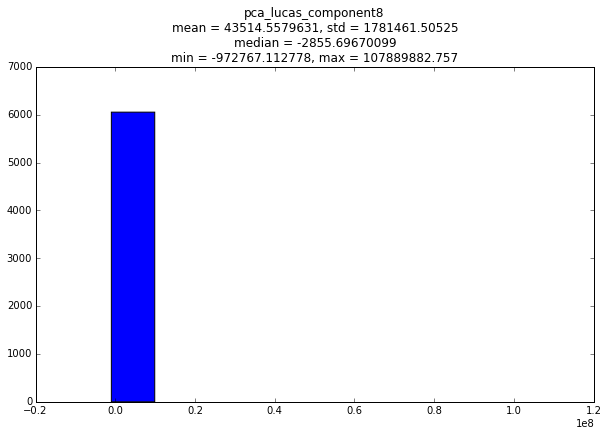

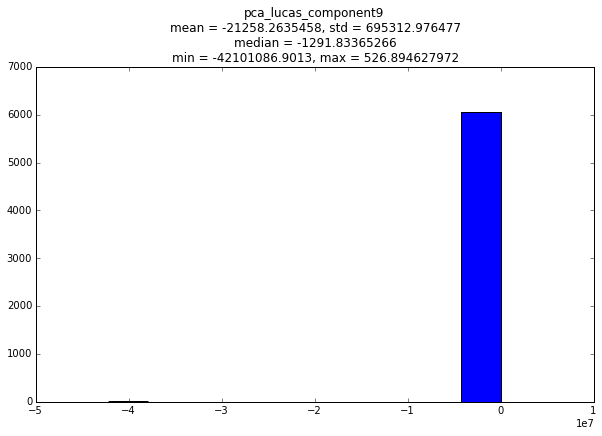

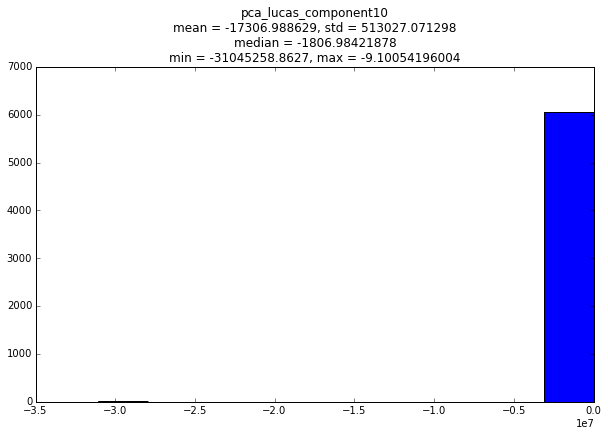

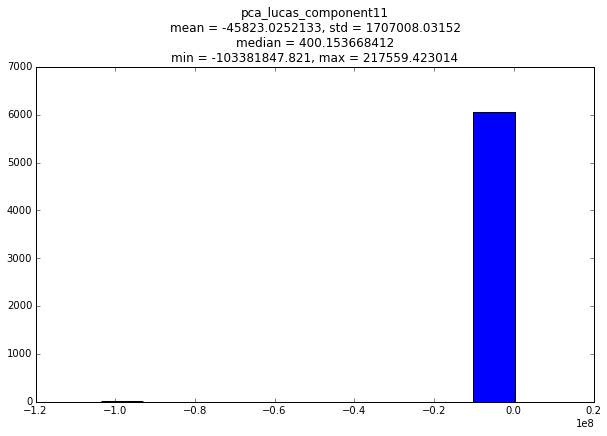

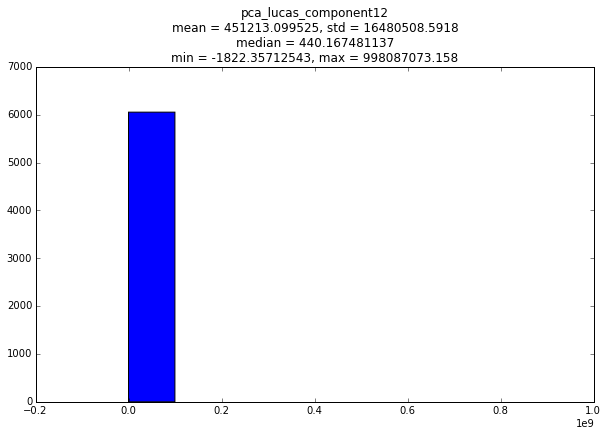

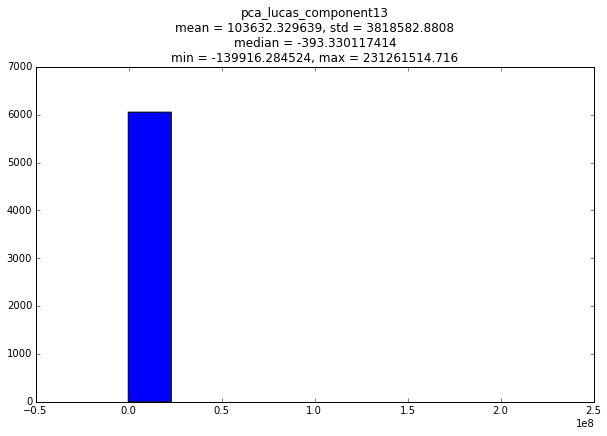

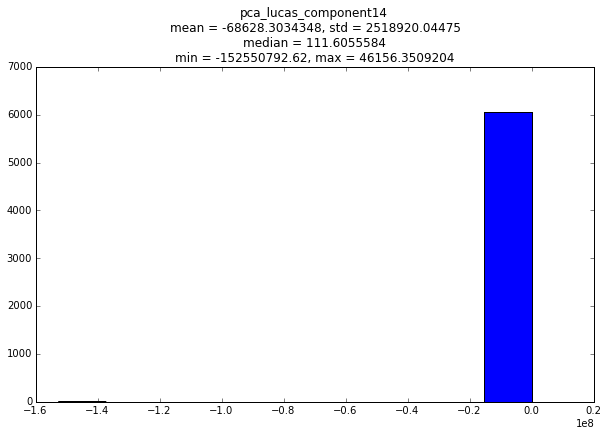

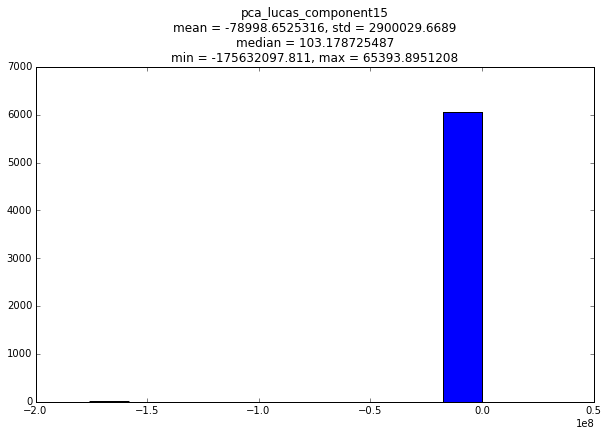

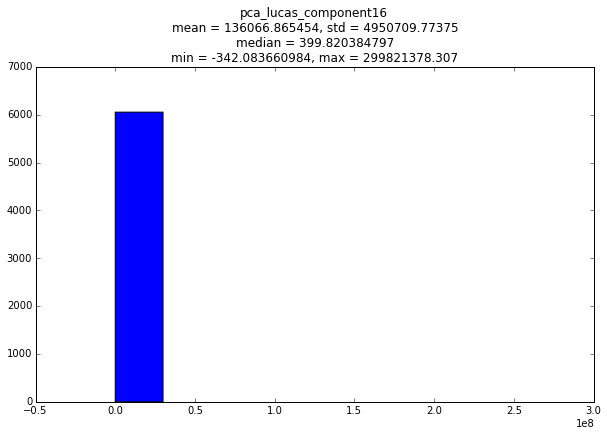

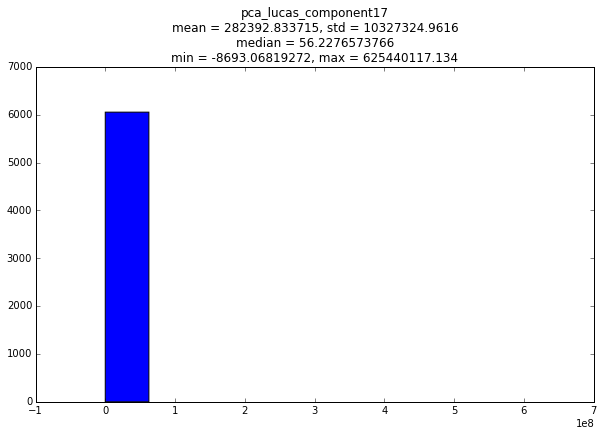

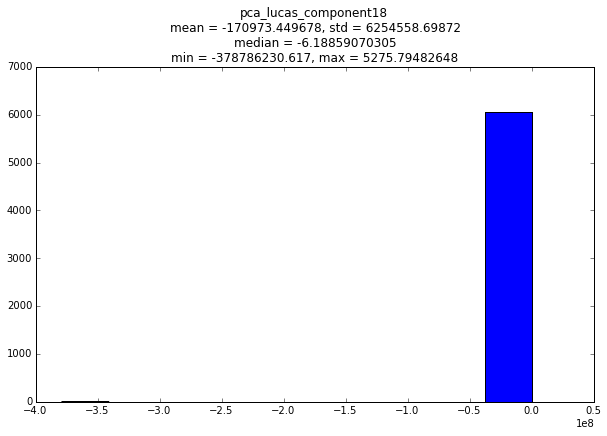

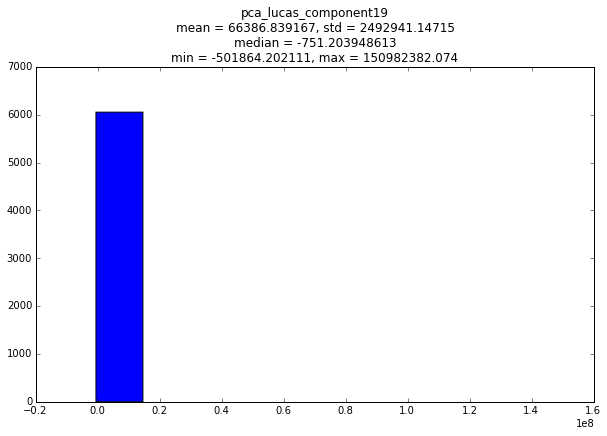

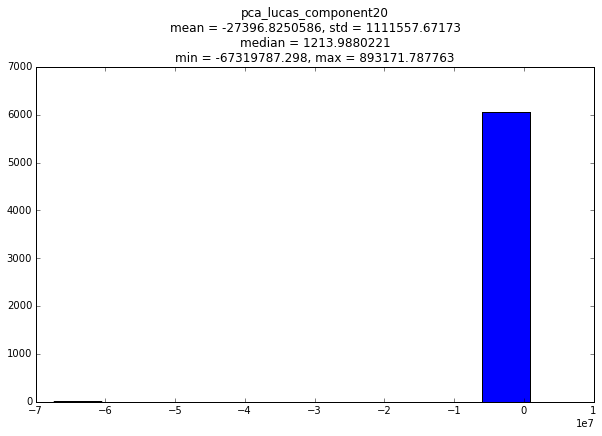

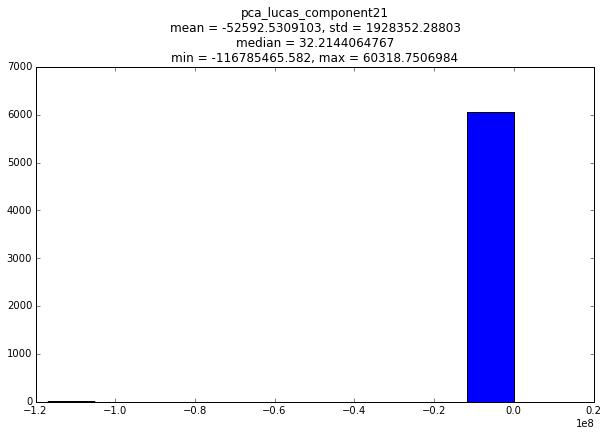

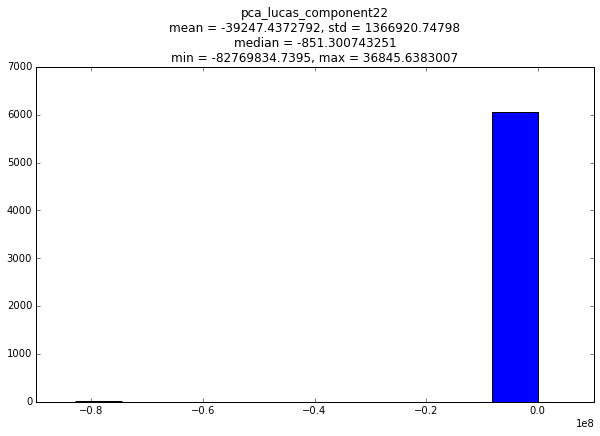

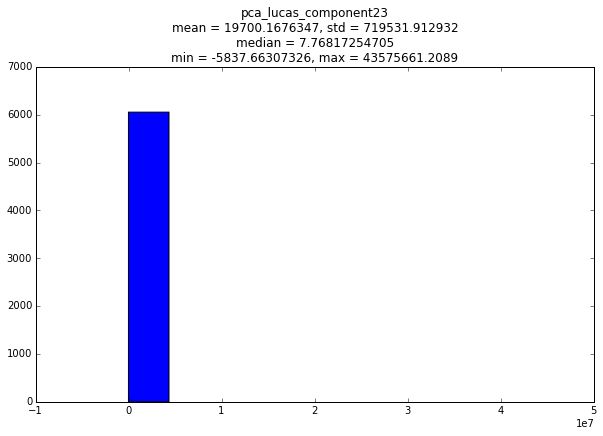

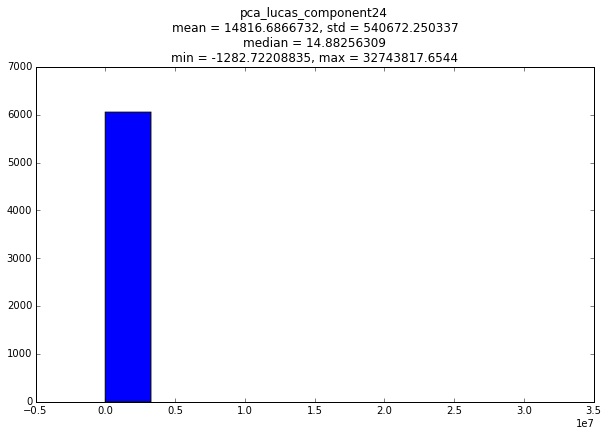

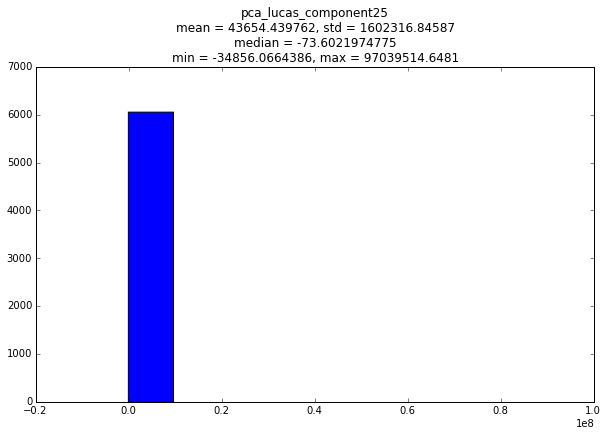

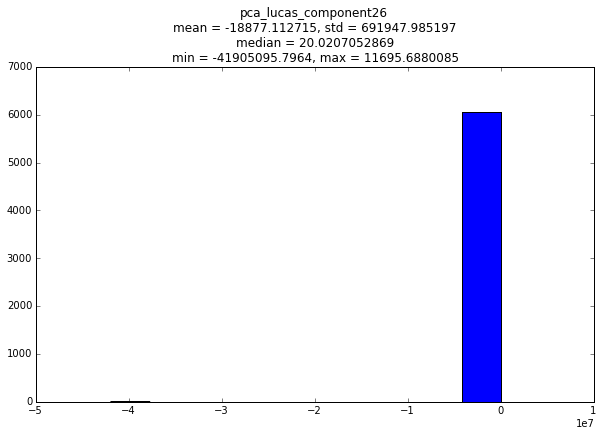

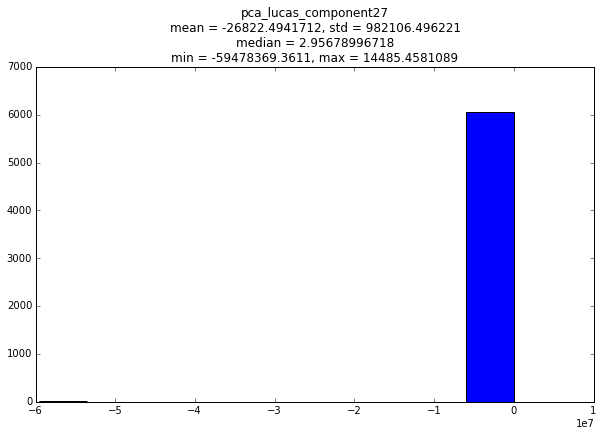

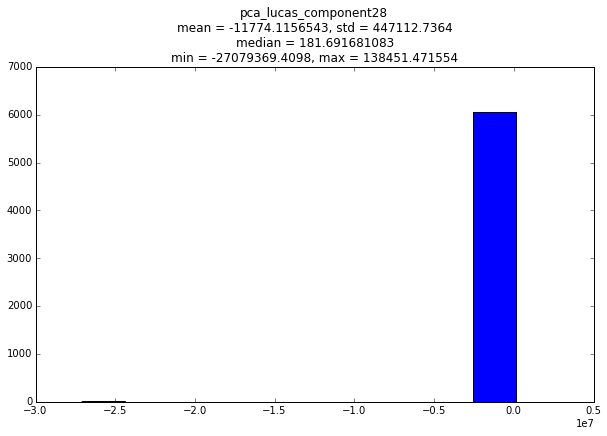

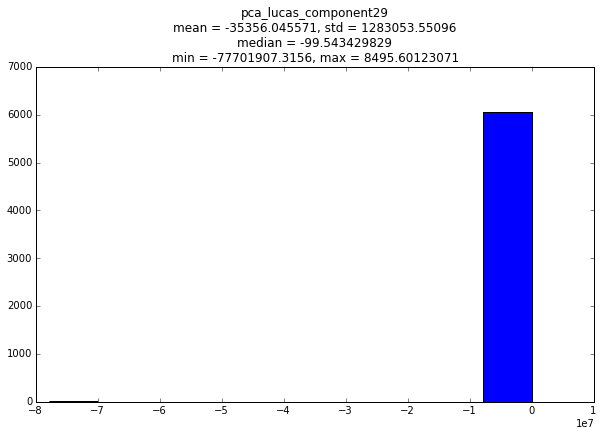

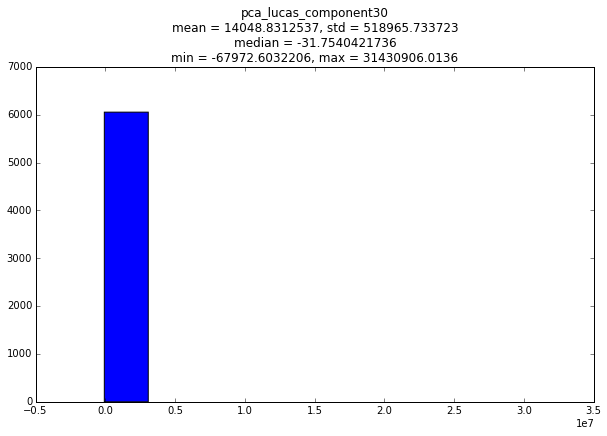

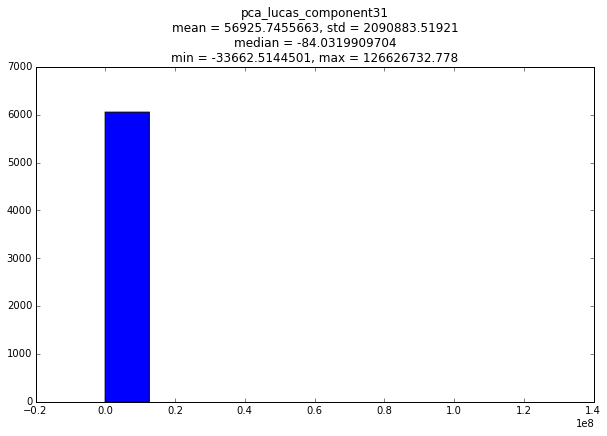

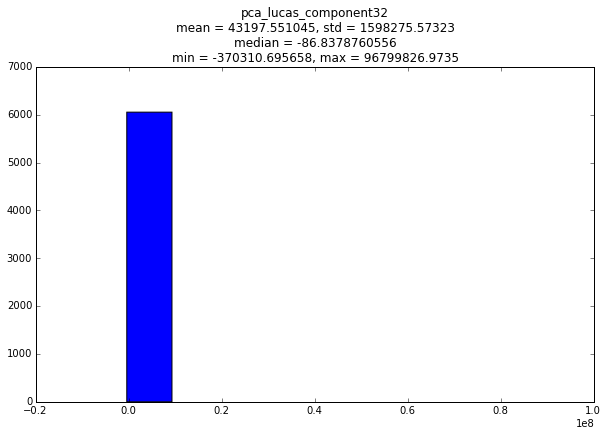

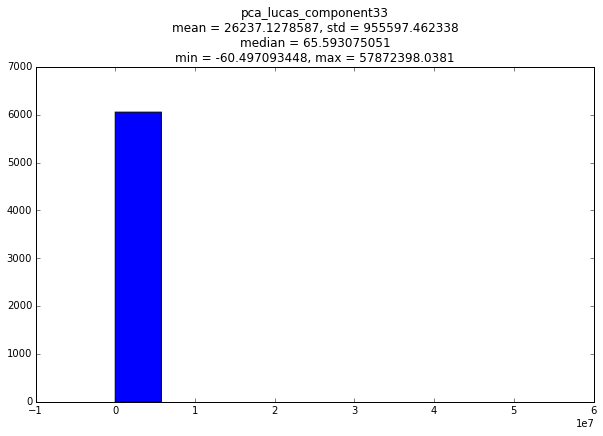

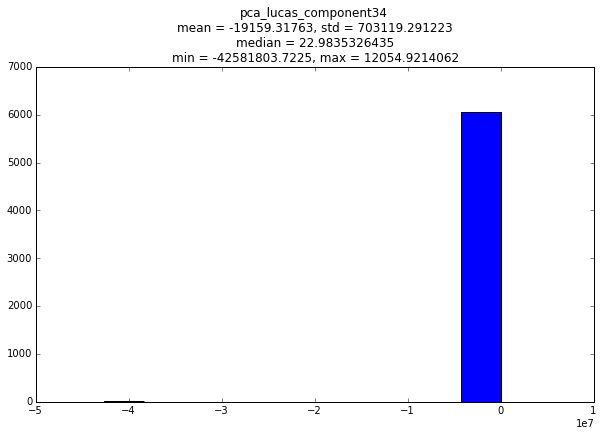

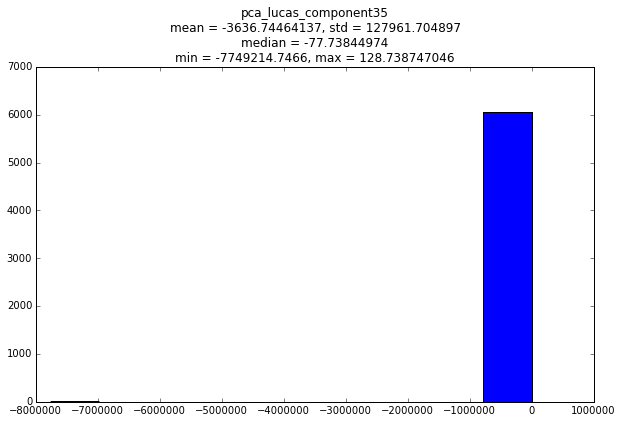

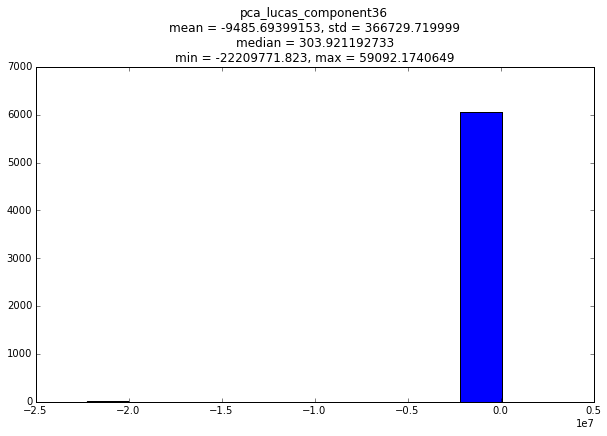

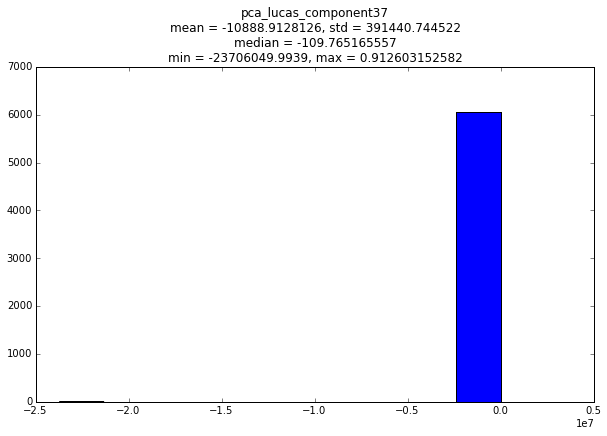

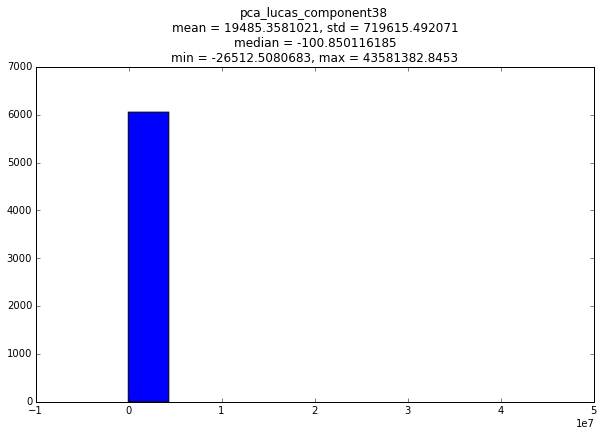

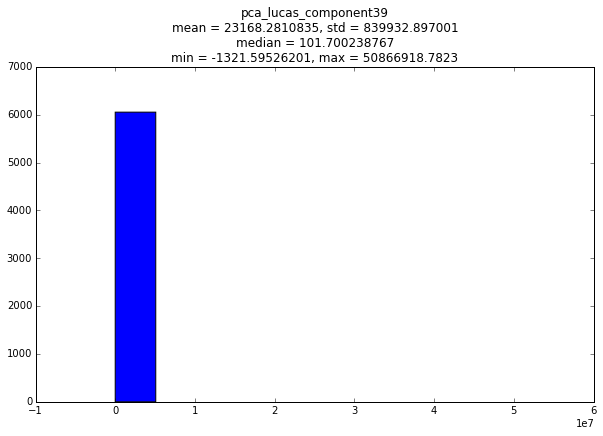

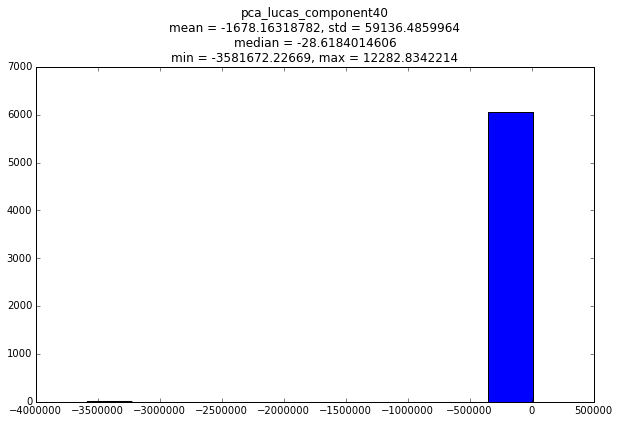

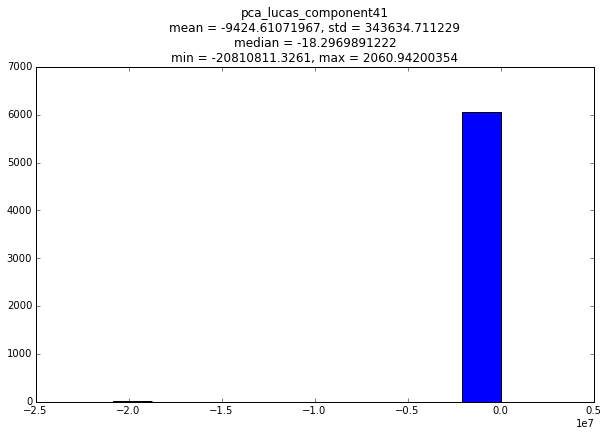

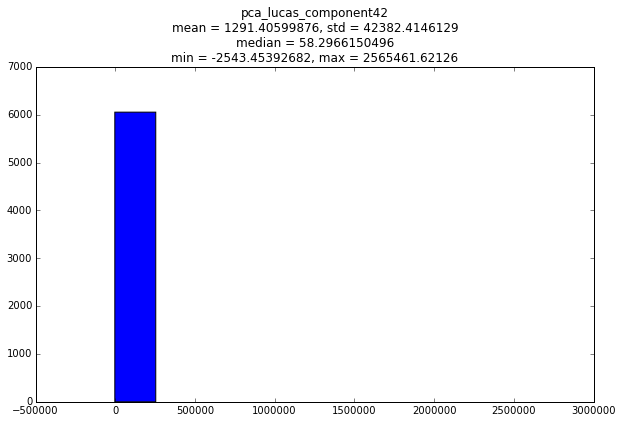

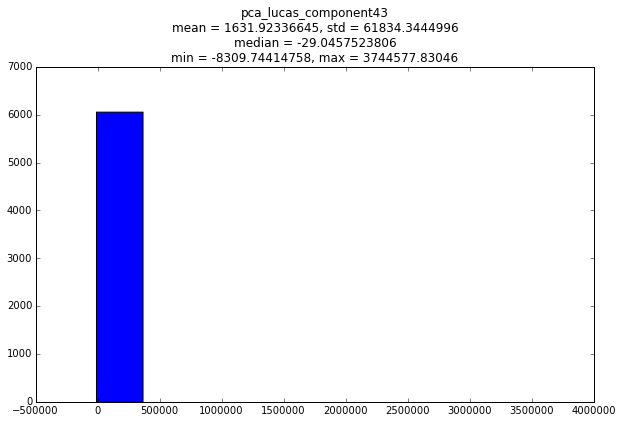

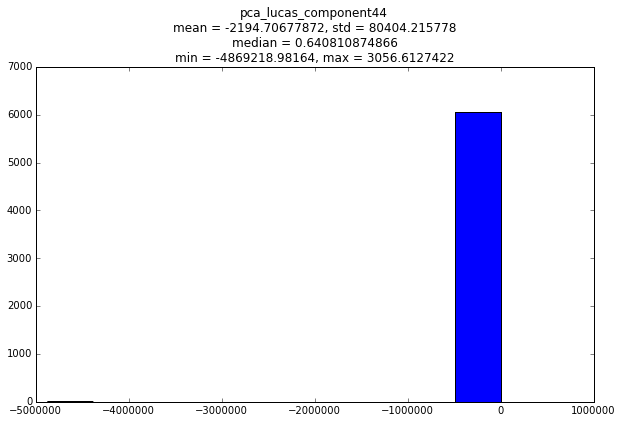

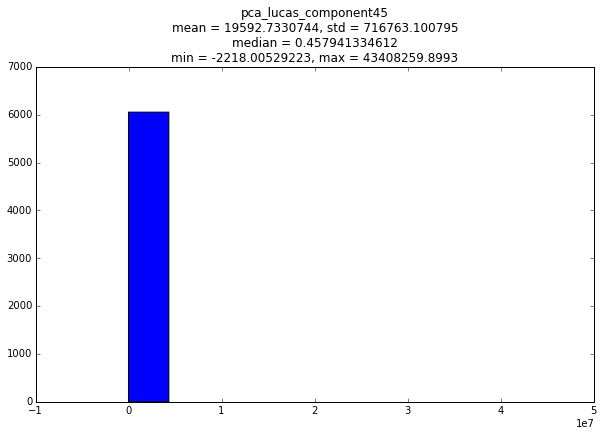

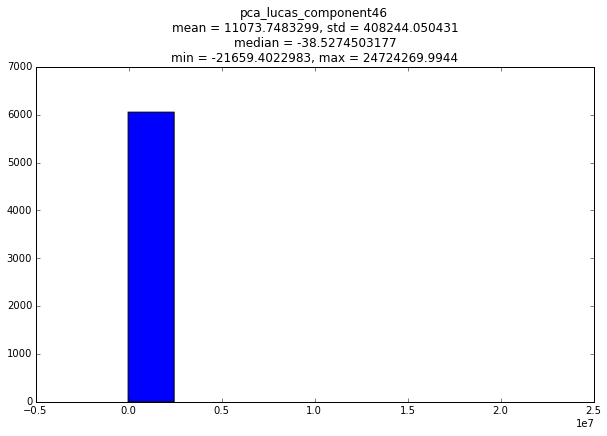

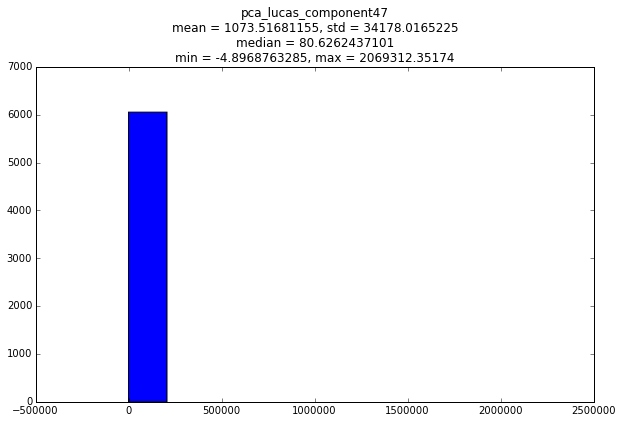

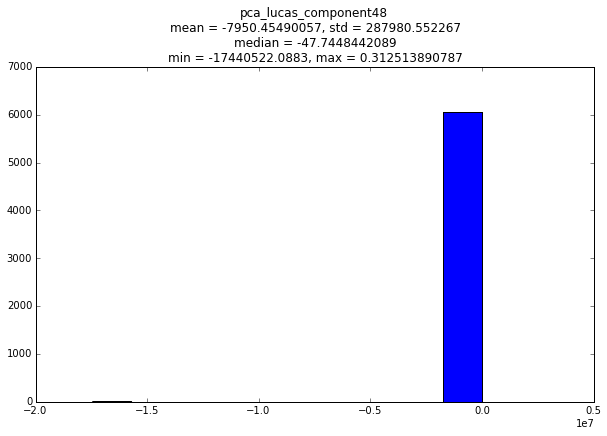

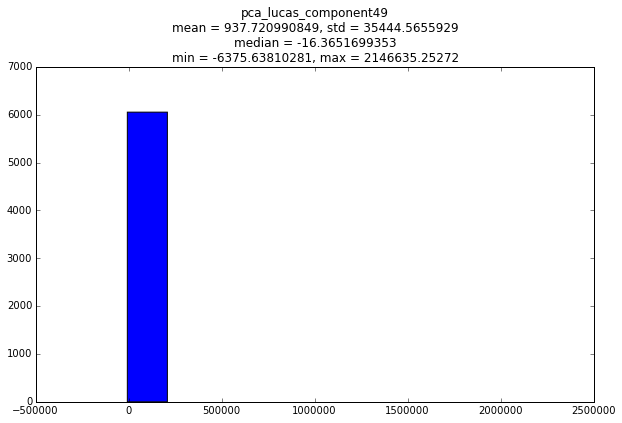

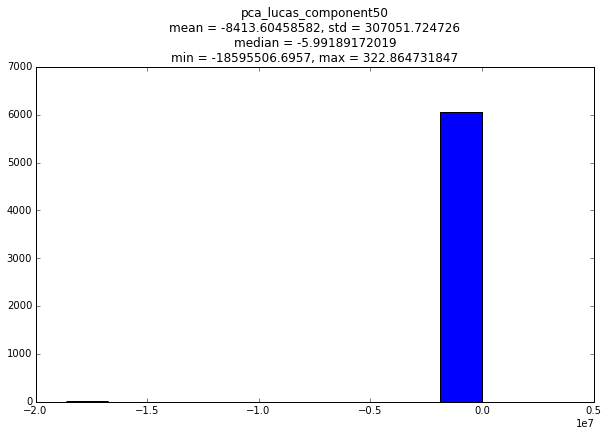

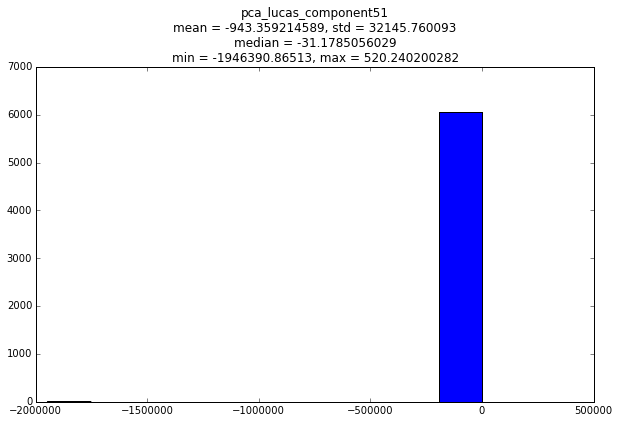

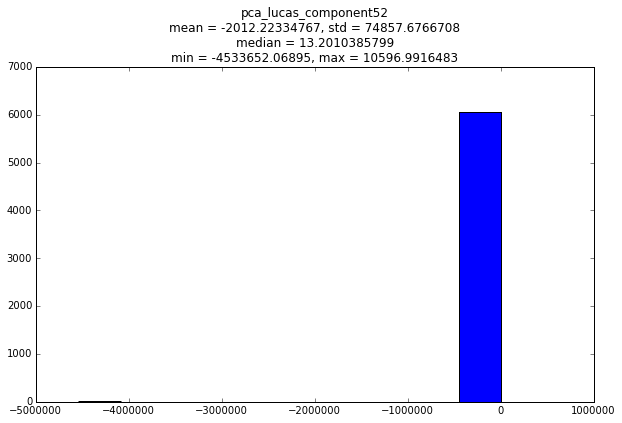

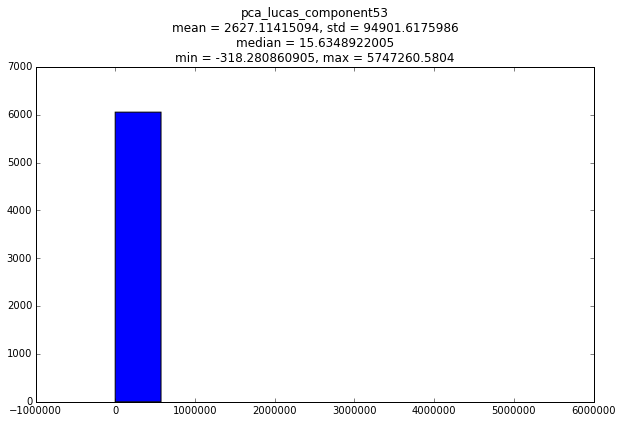

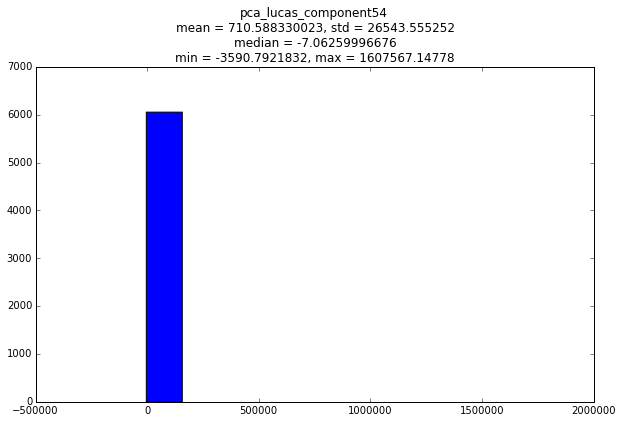

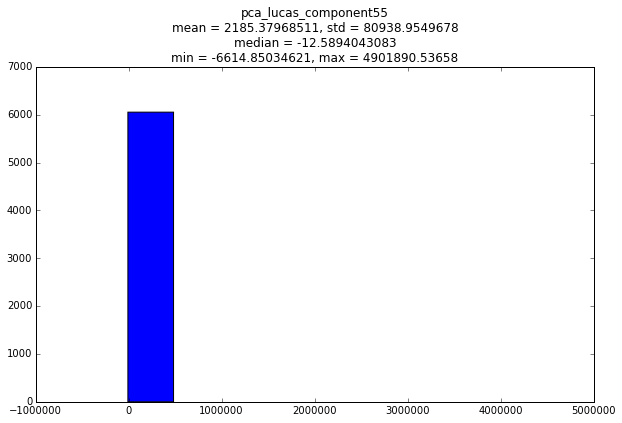

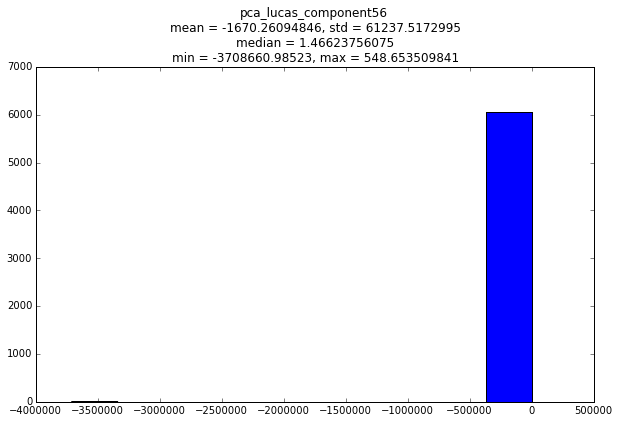

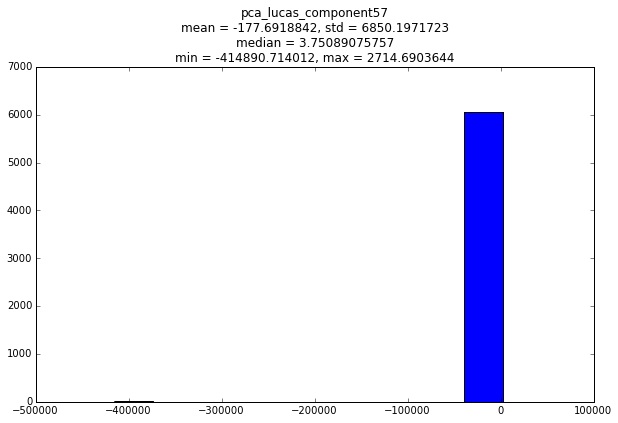

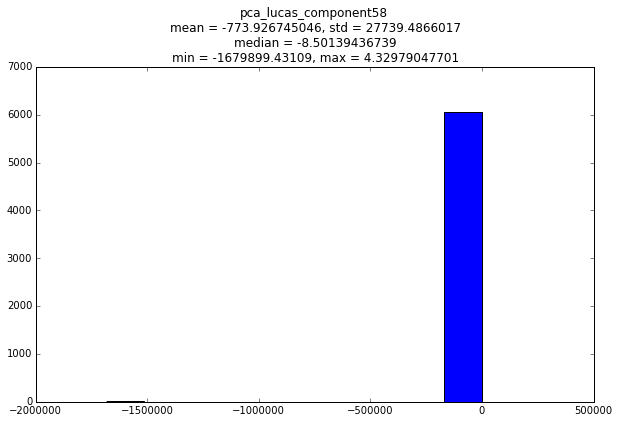

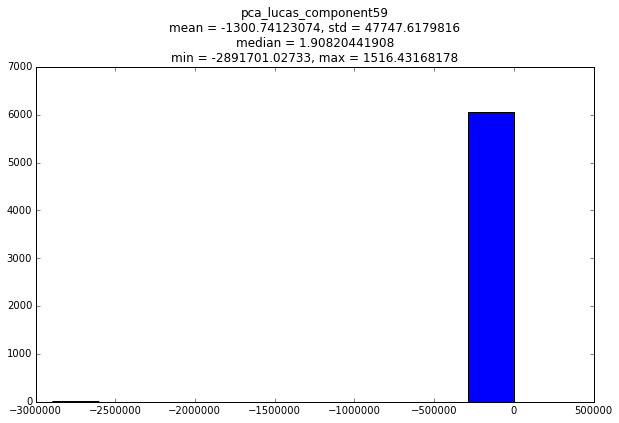

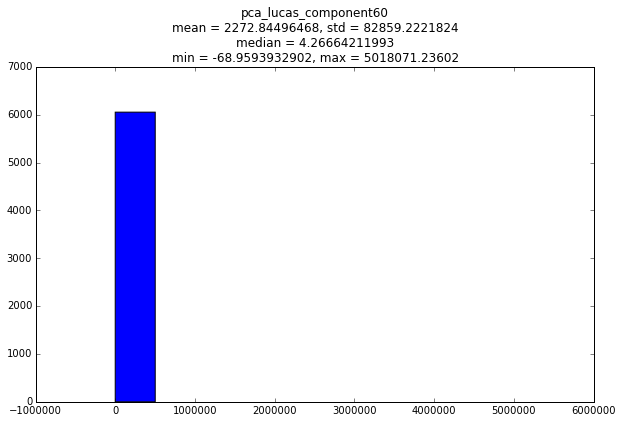

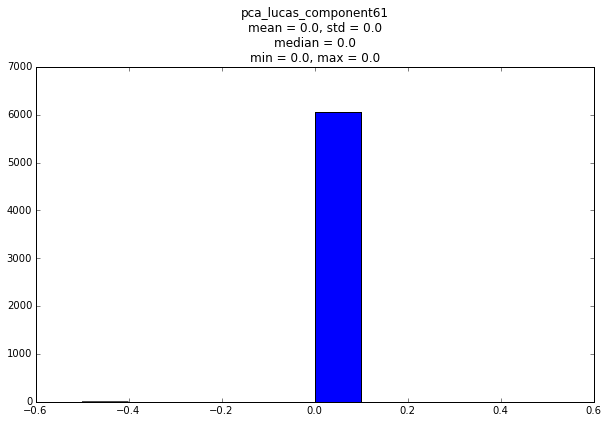

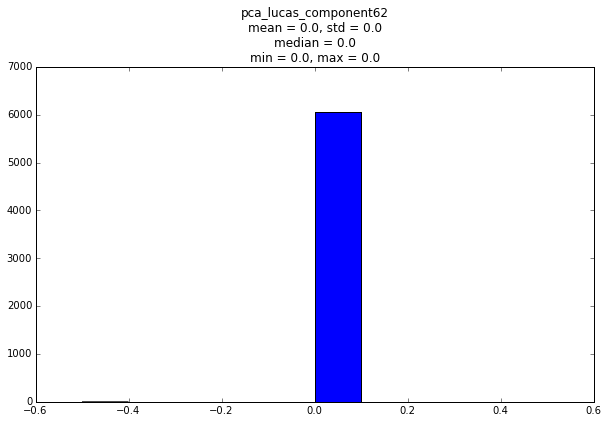

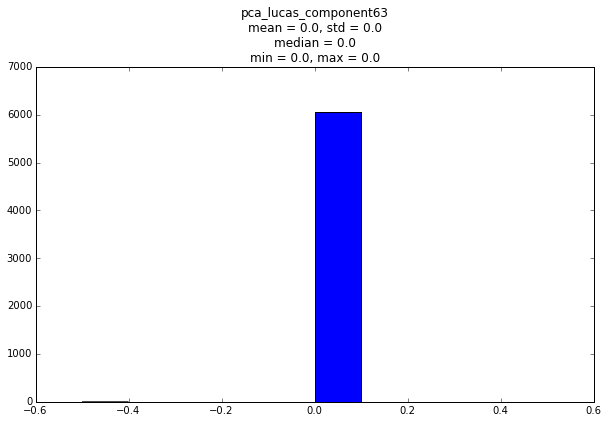

In [21]:
for i in range(len(features_order)):
    component = X_pca_lucas[:,i]
    plot_histogram('pca_lucas_component{0}'.format(i), component)

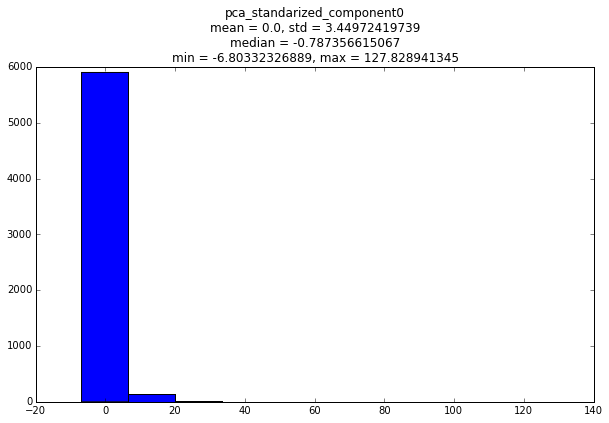

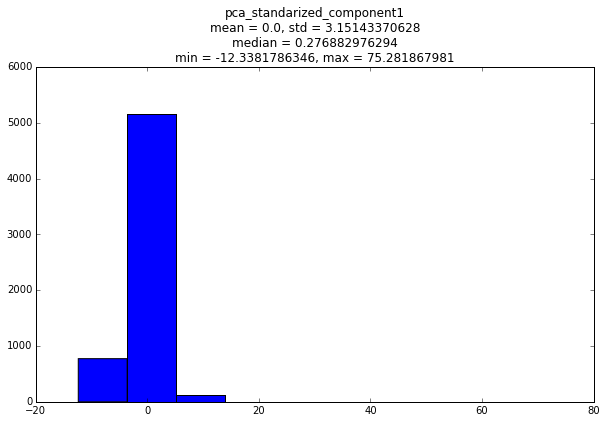

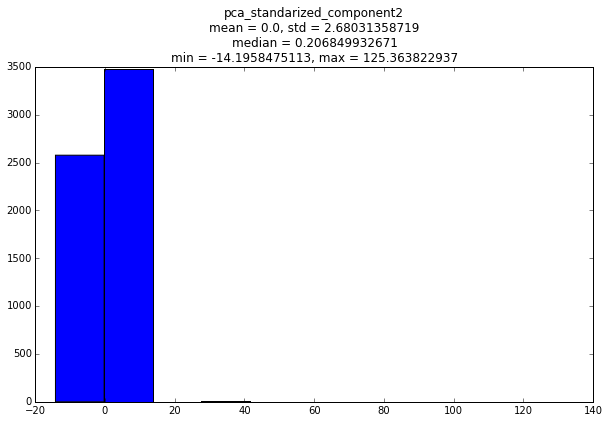

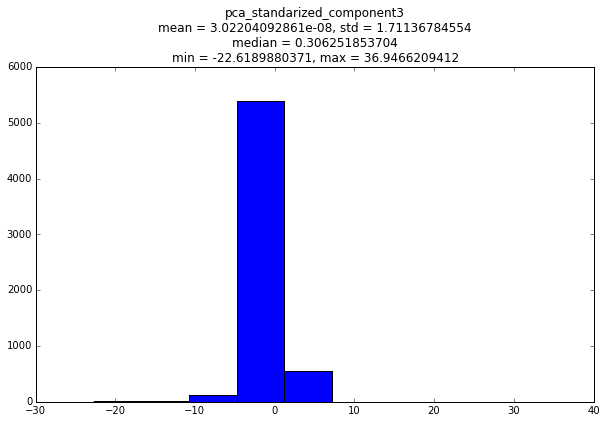

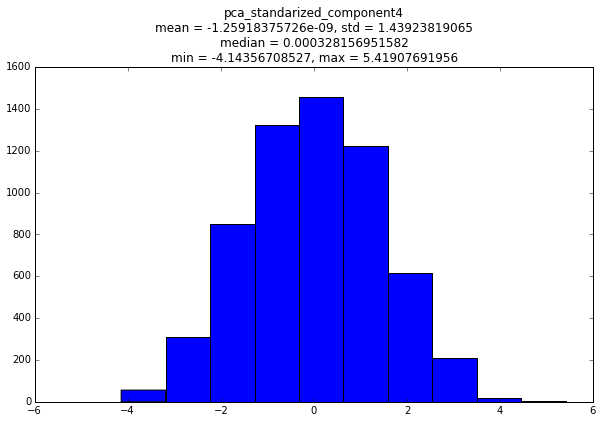

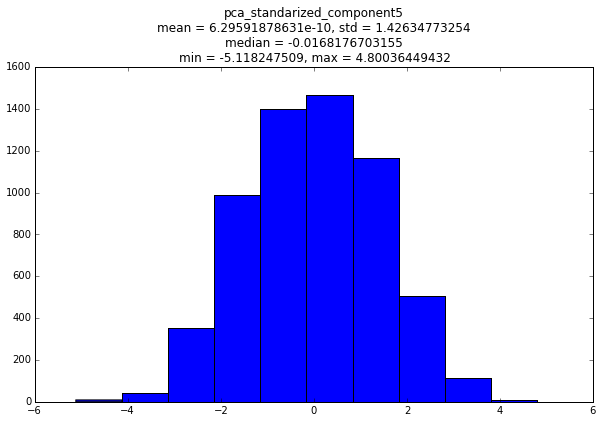

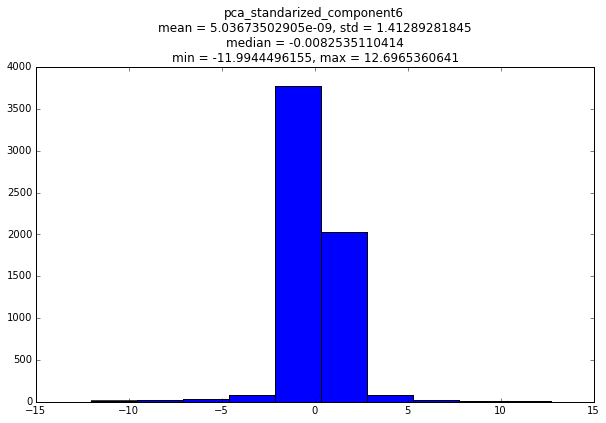

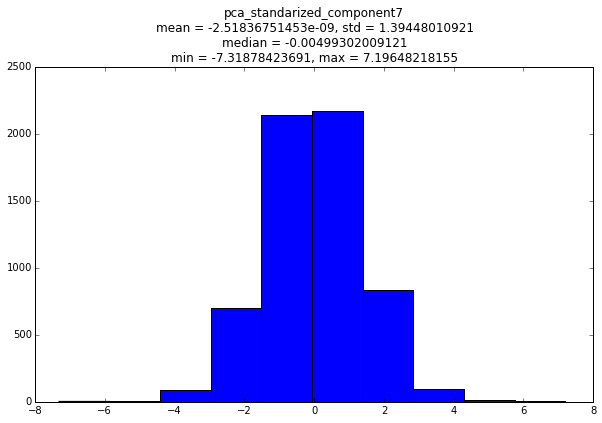

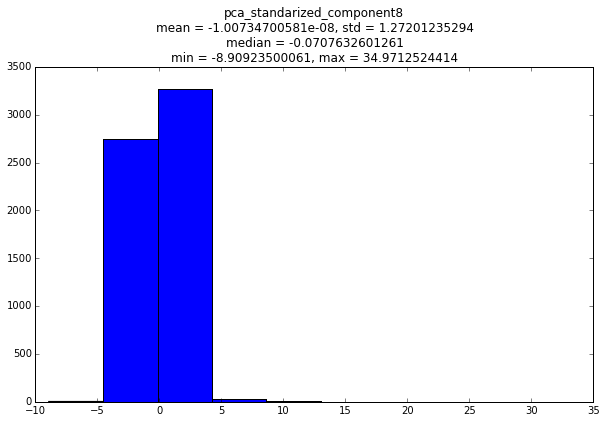

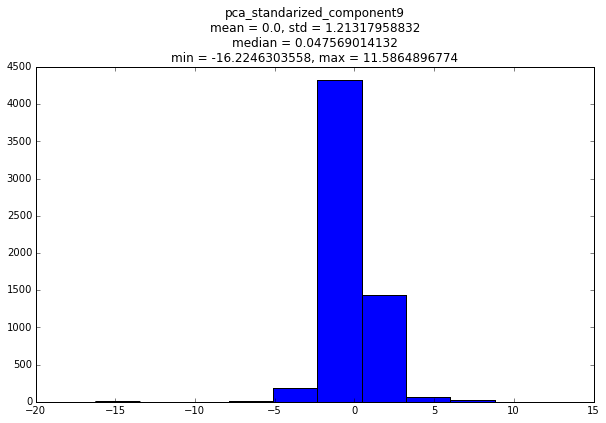

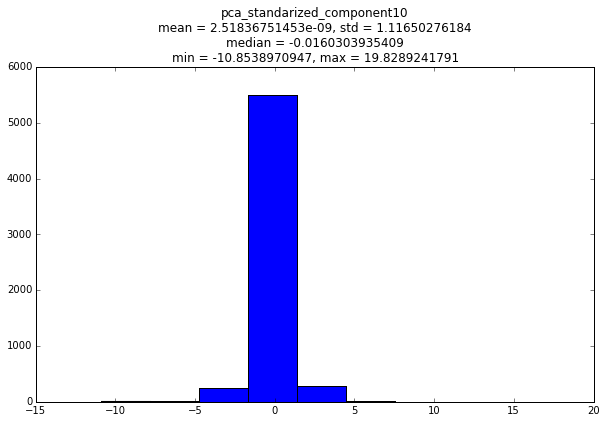

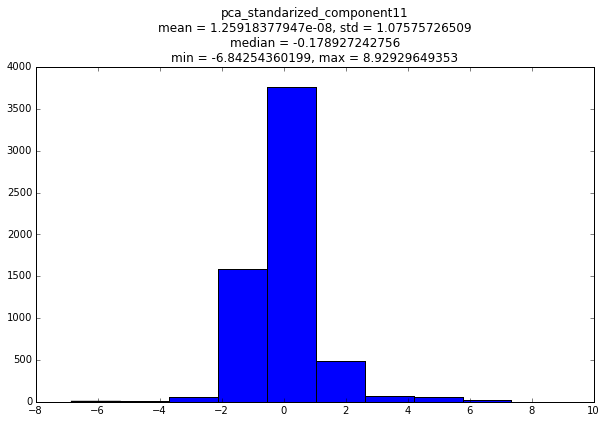

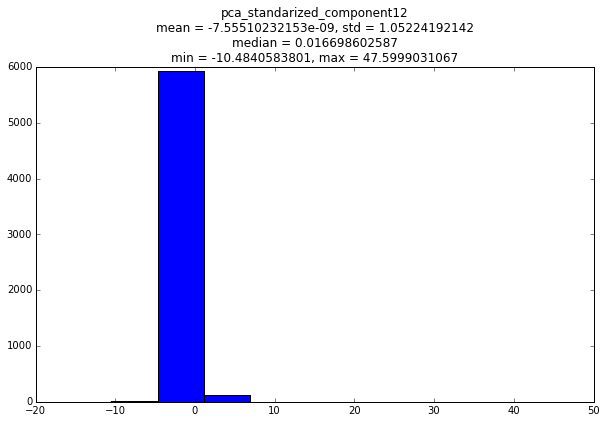

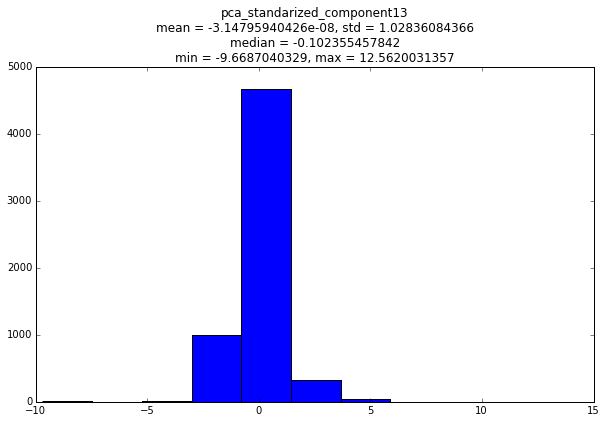

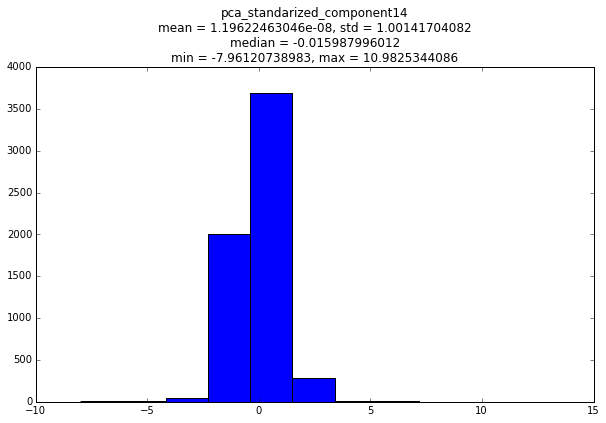

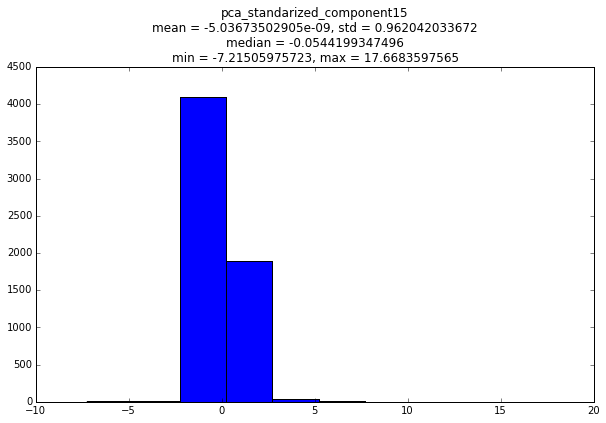

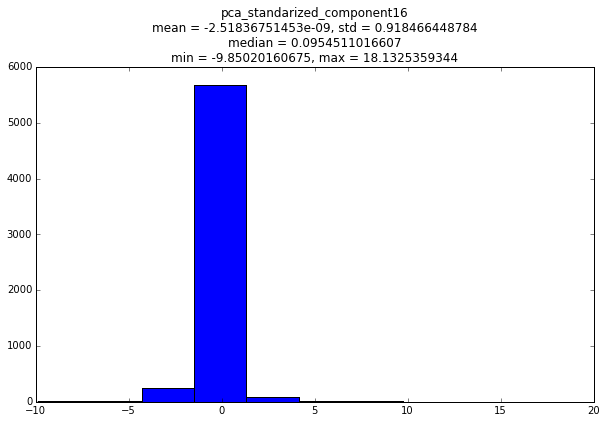

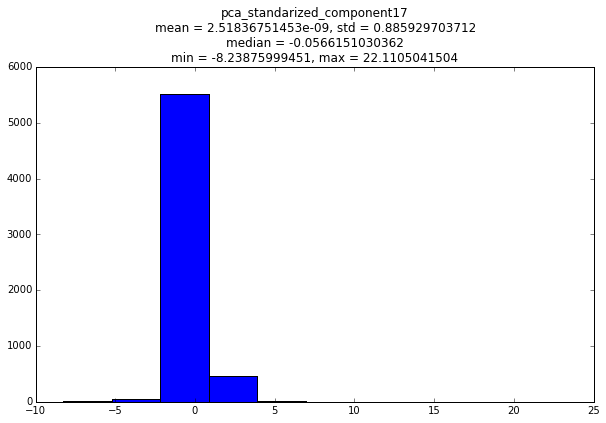

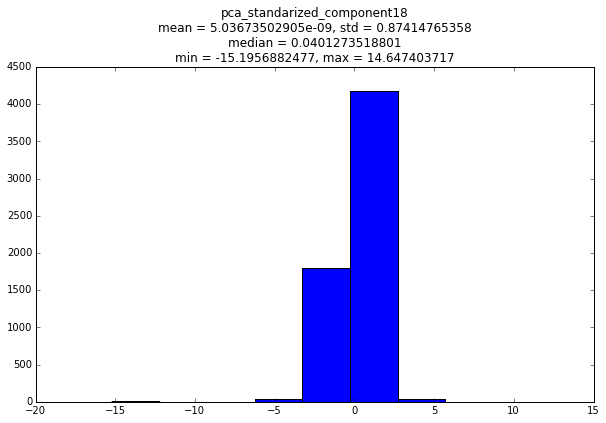

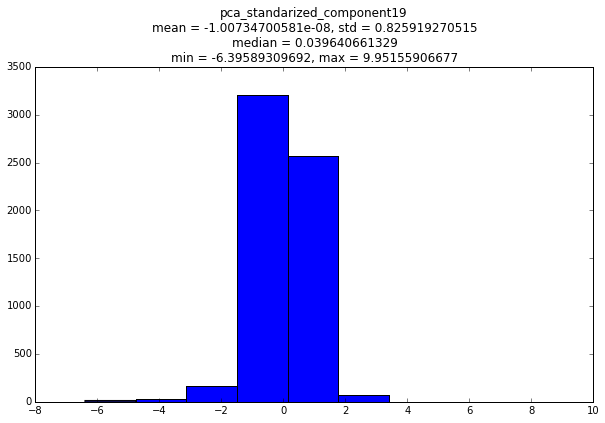

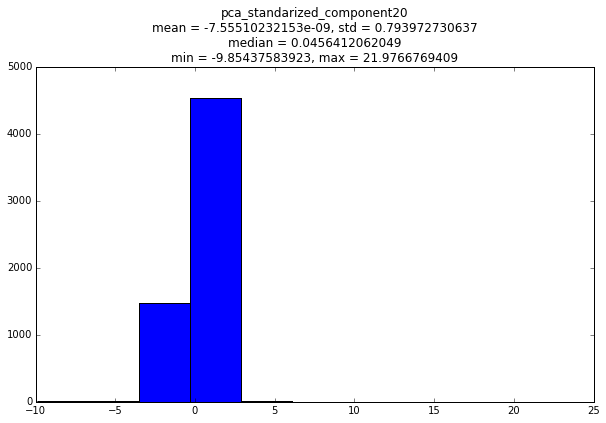

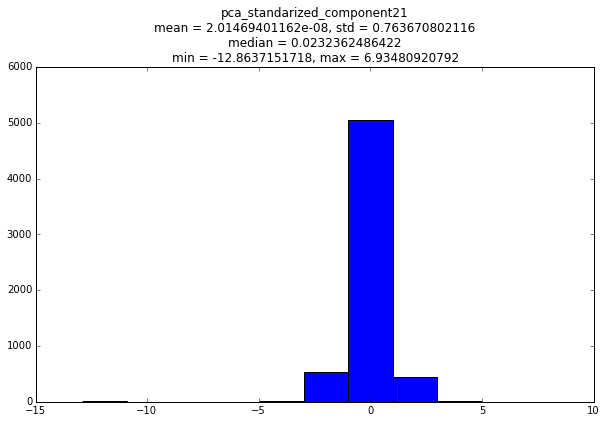

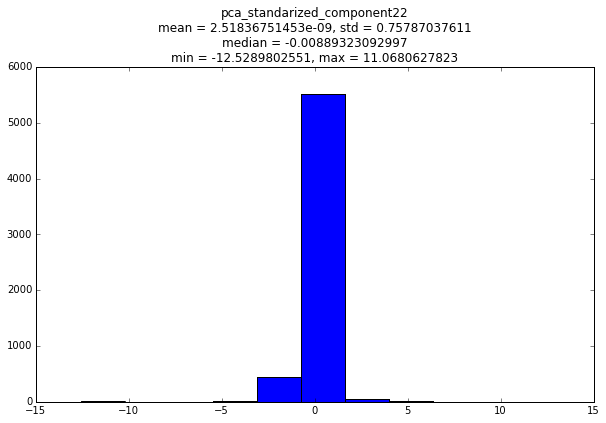

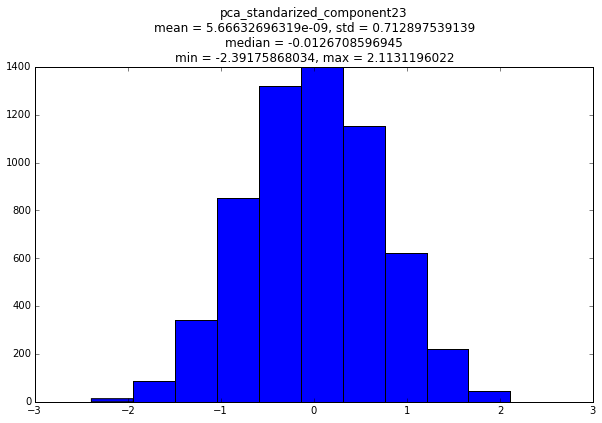

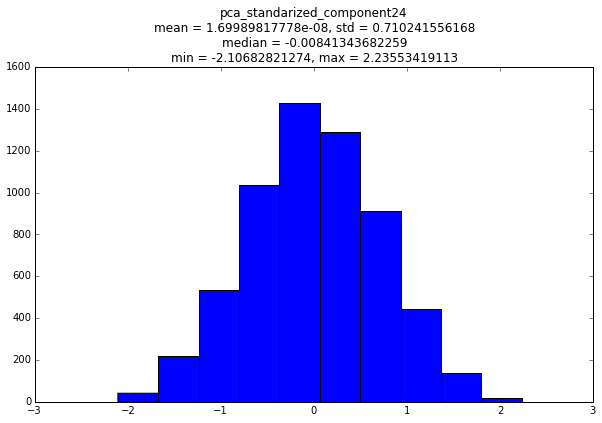

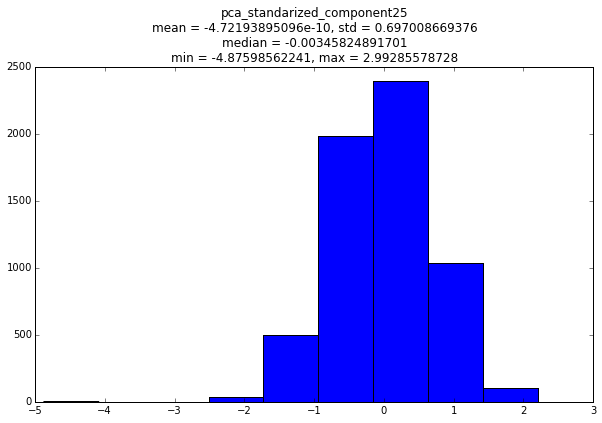

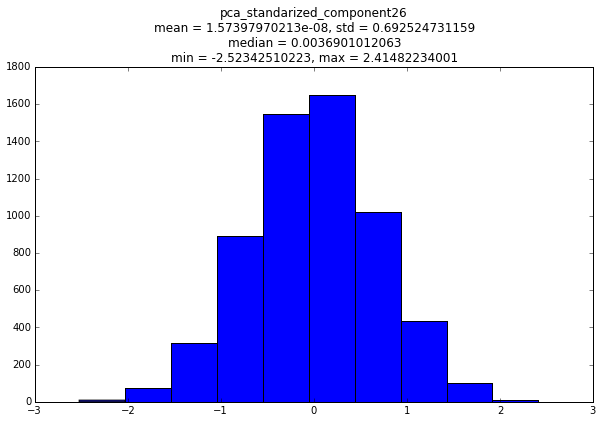

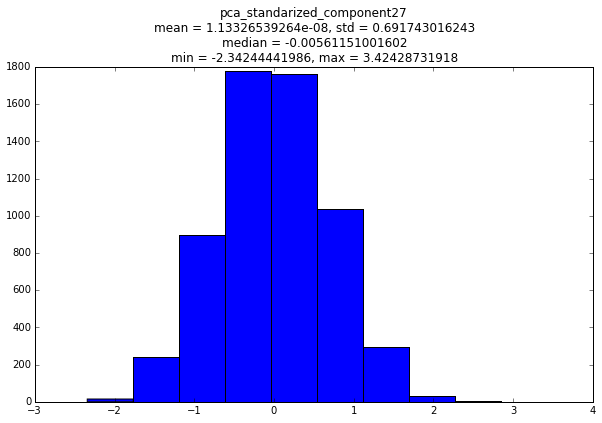

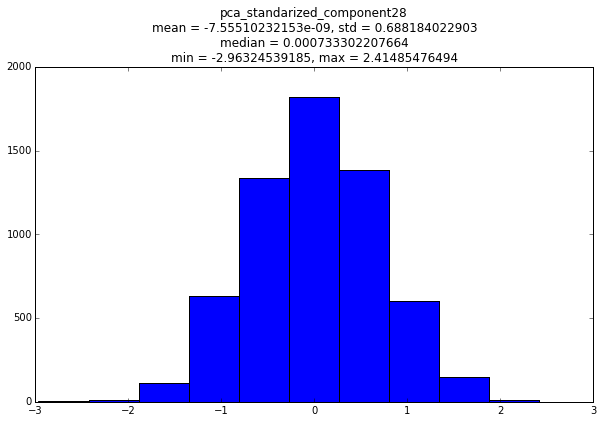

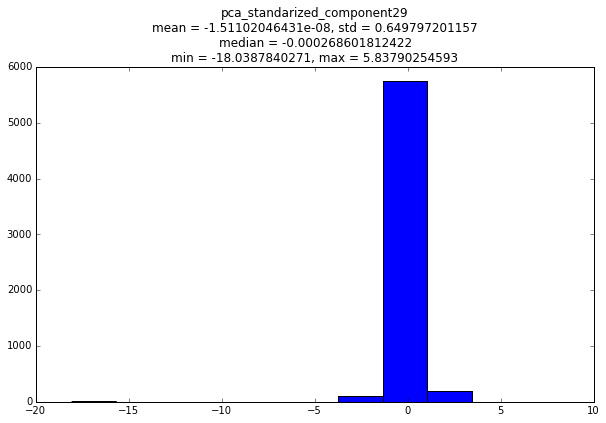

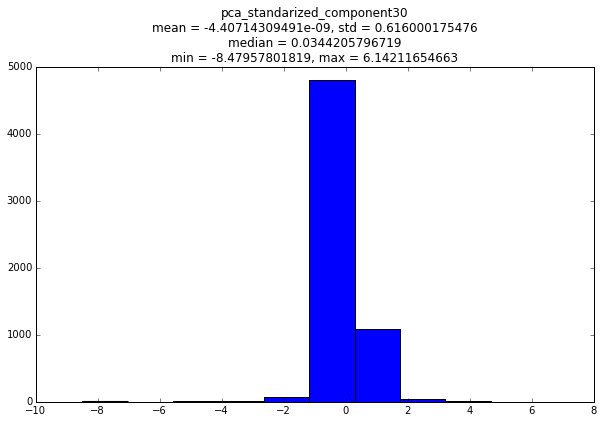

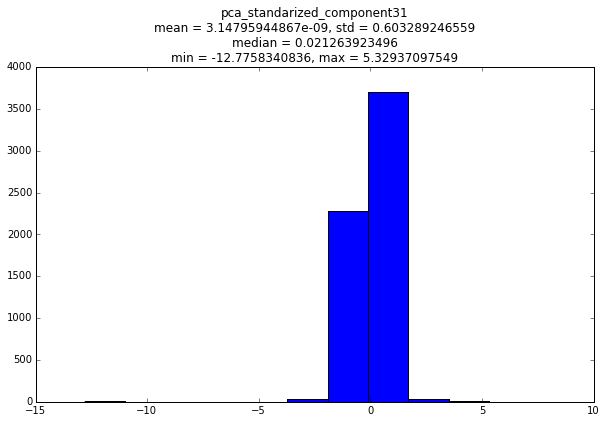

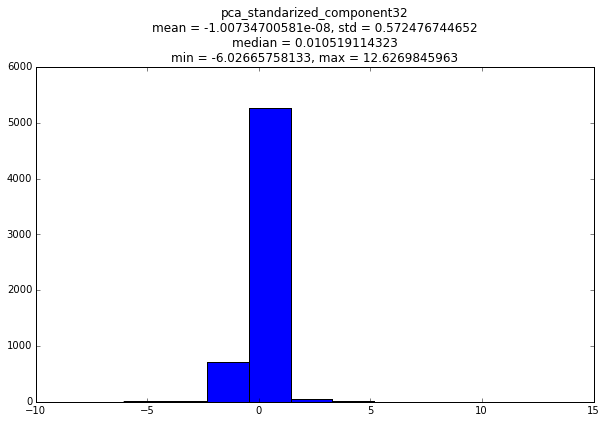

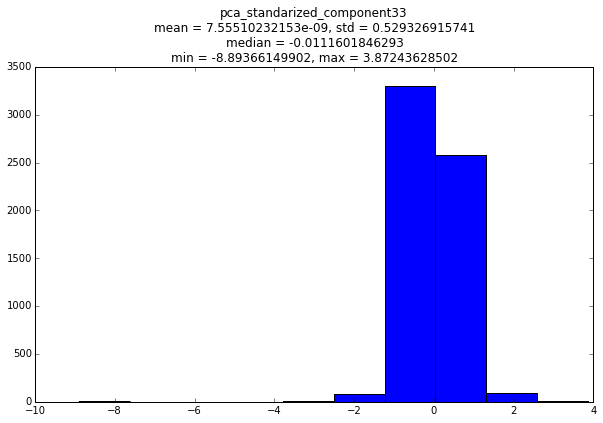

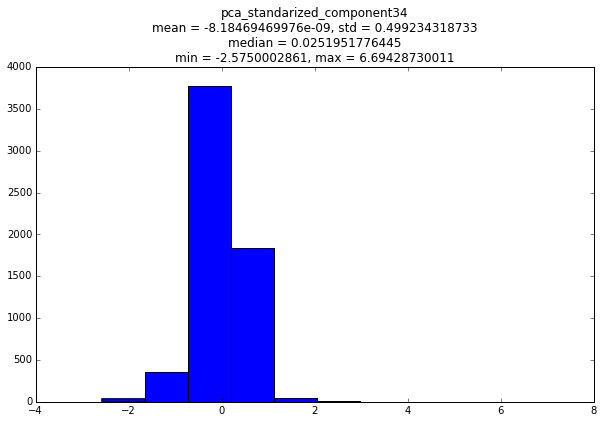

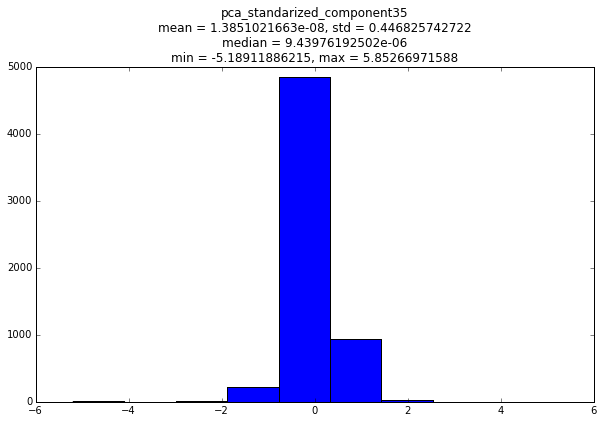

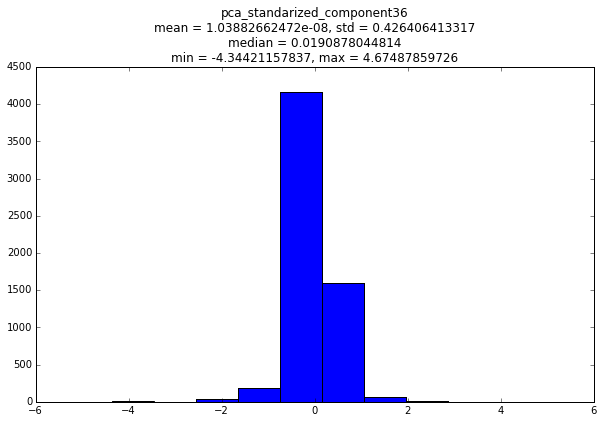

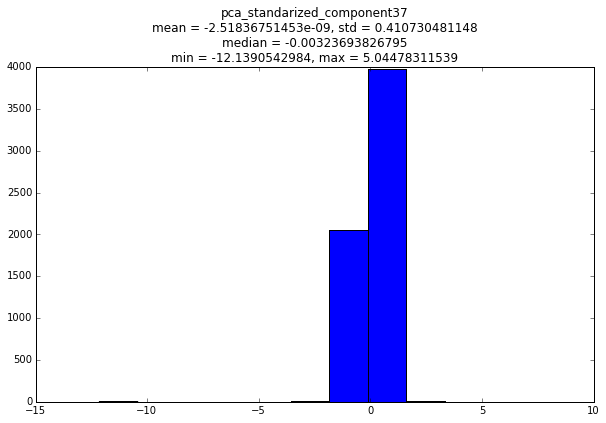

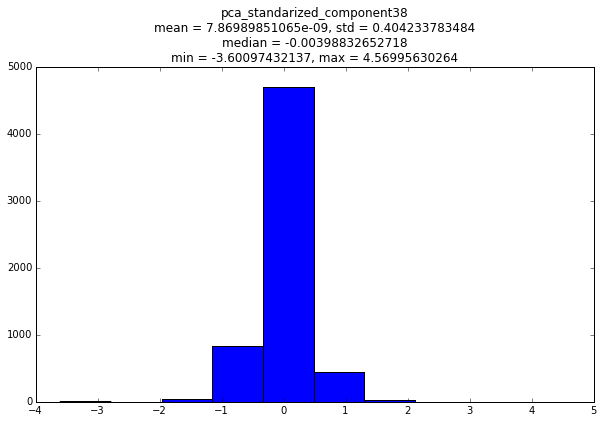

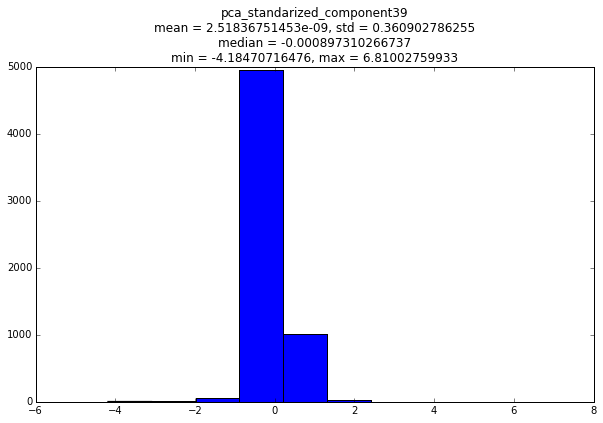

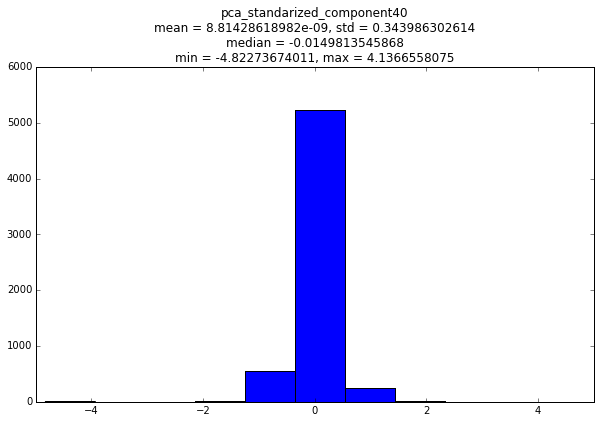

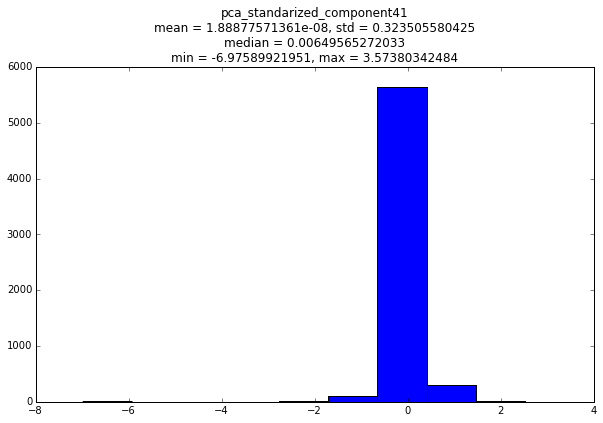

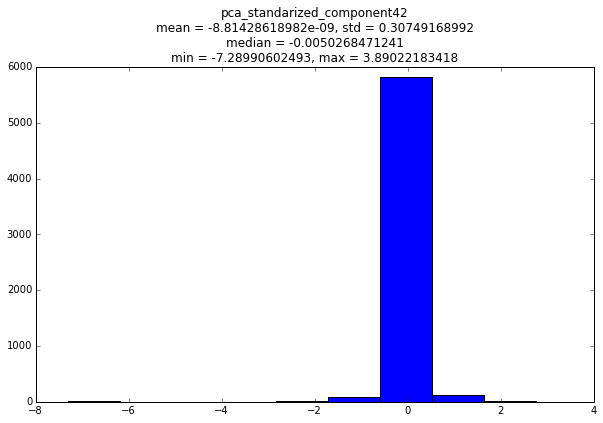

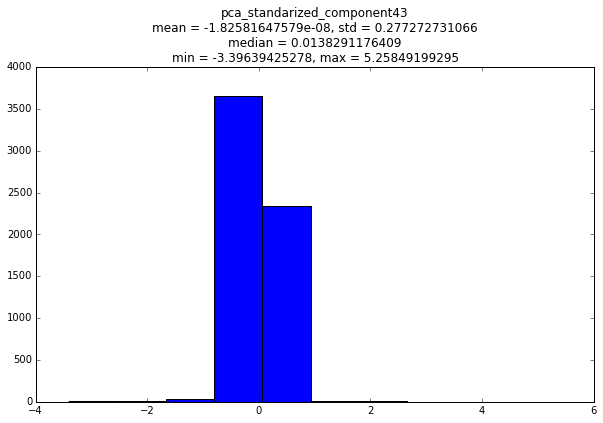

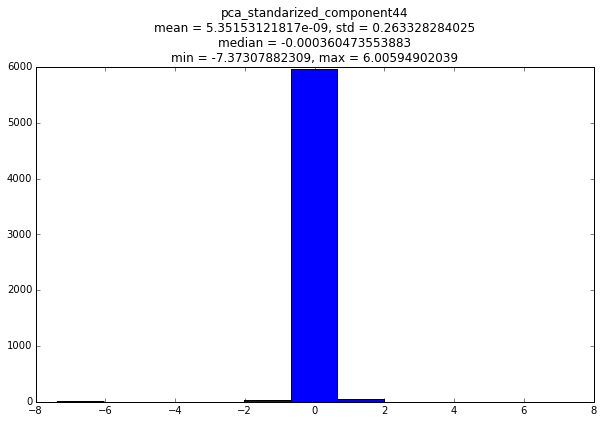

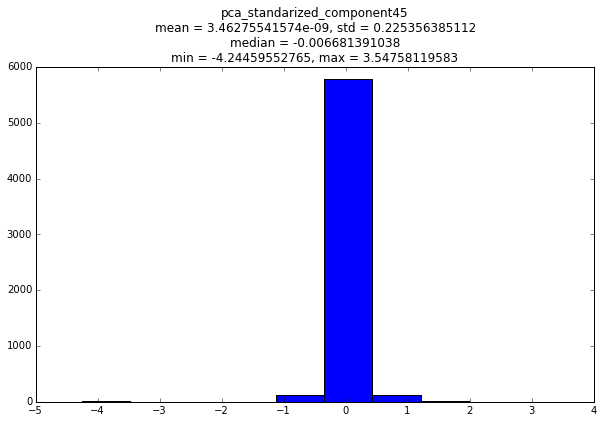

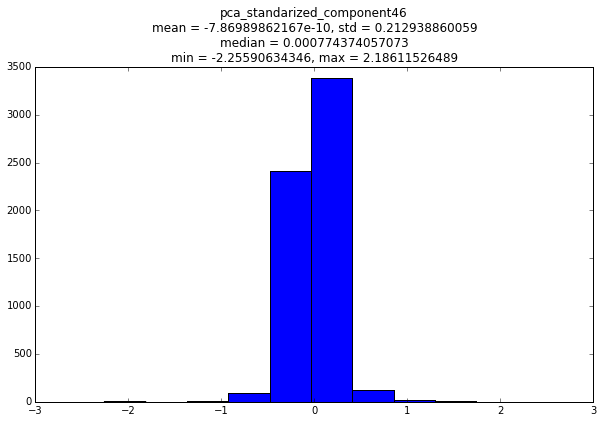

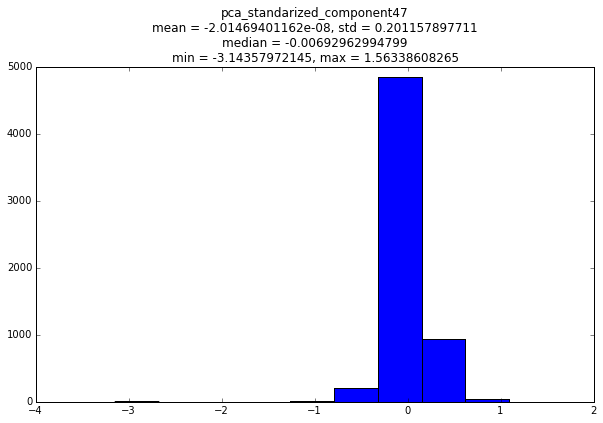

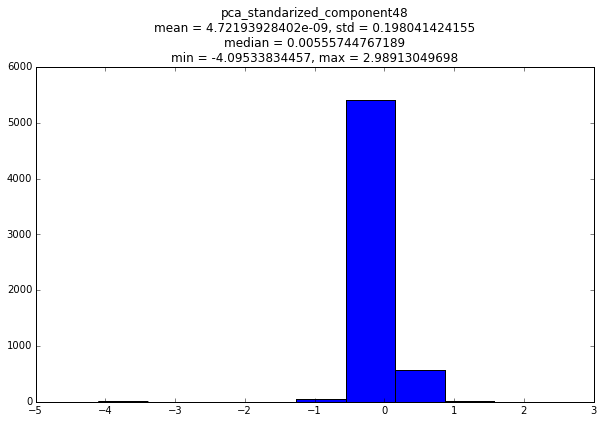

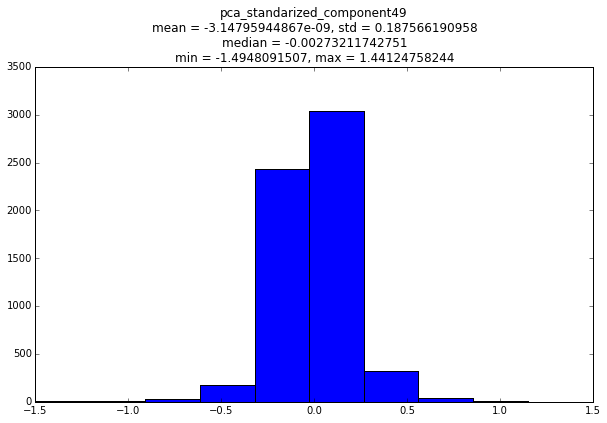

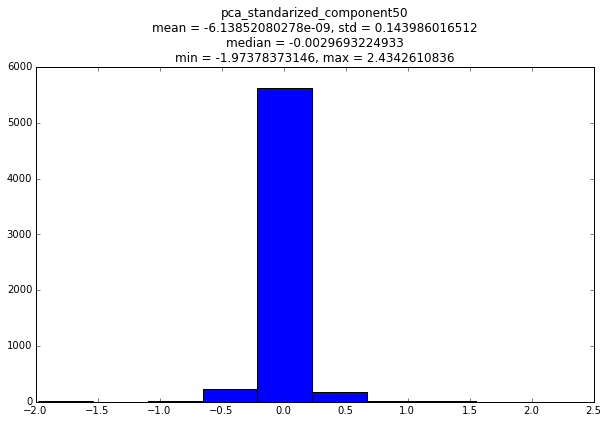

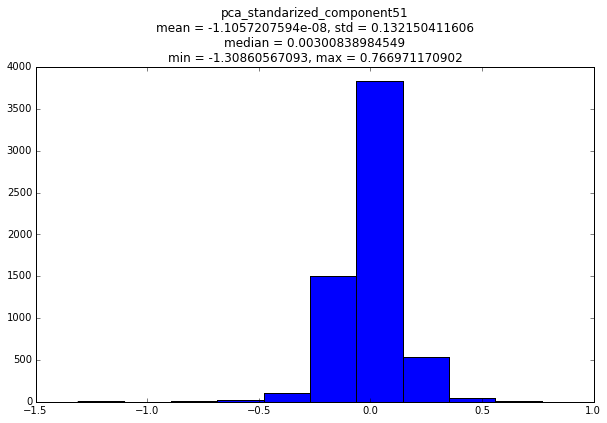

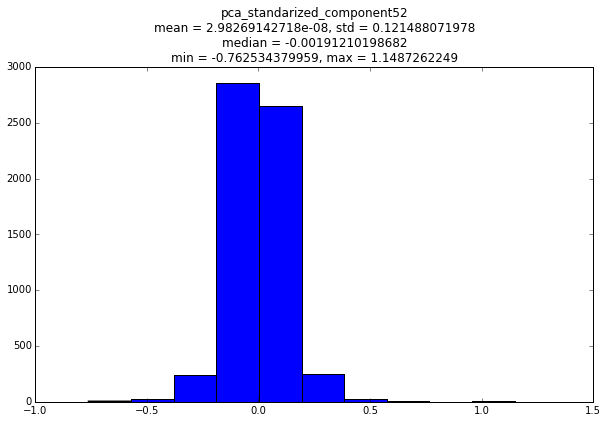

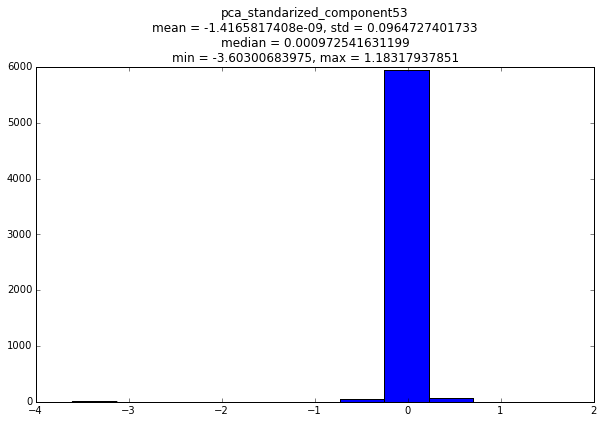

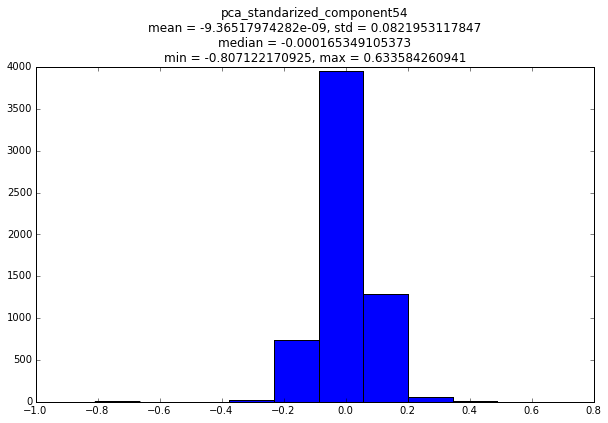

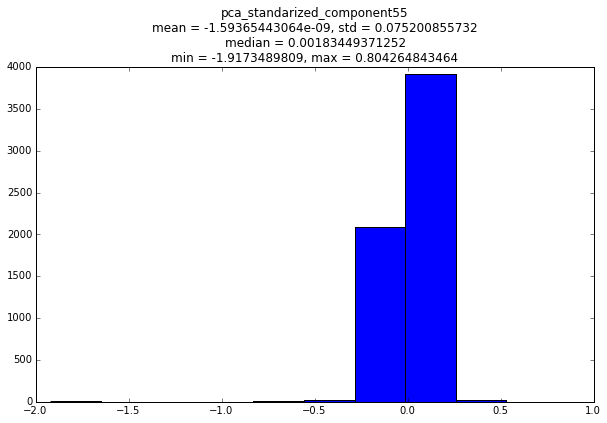

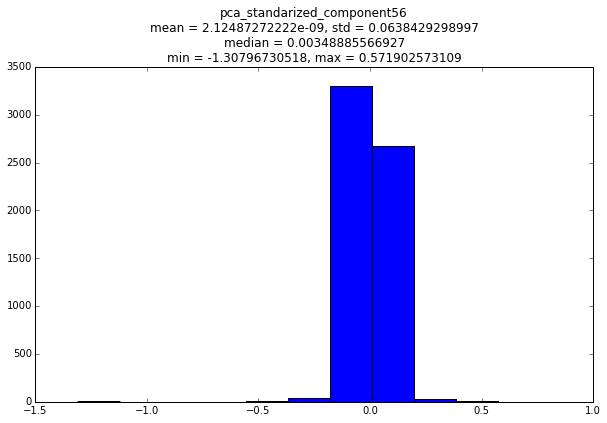

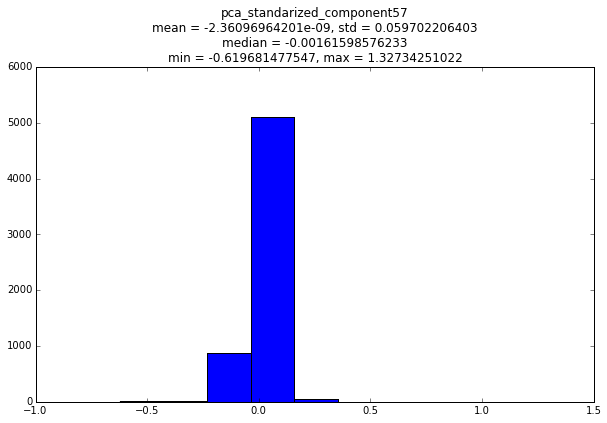

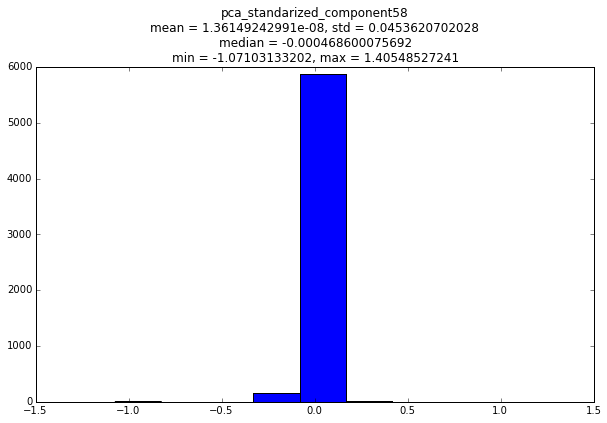

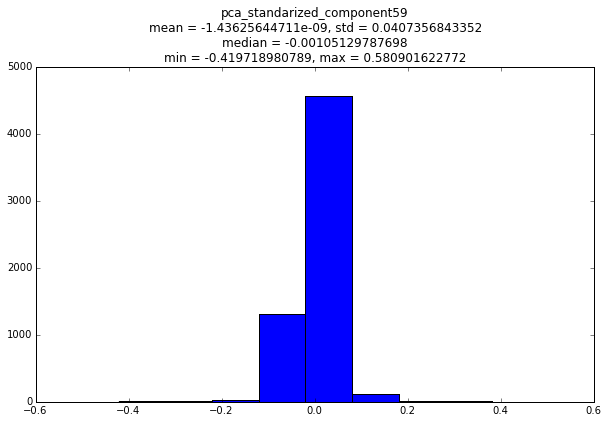

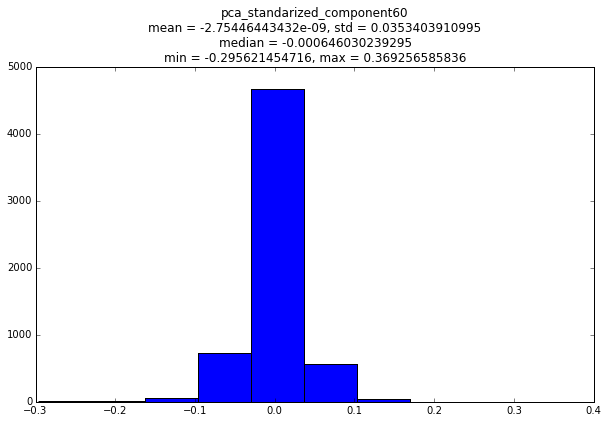

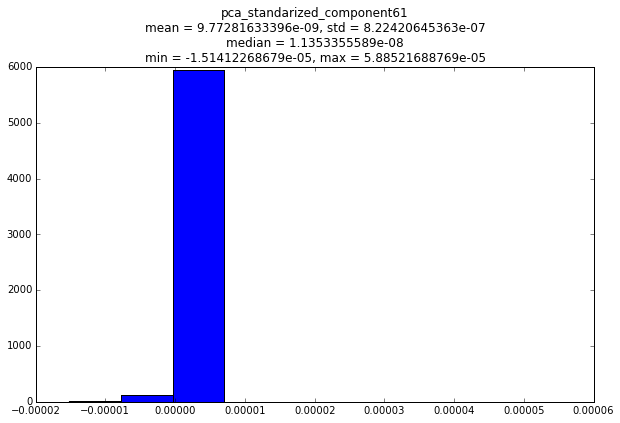

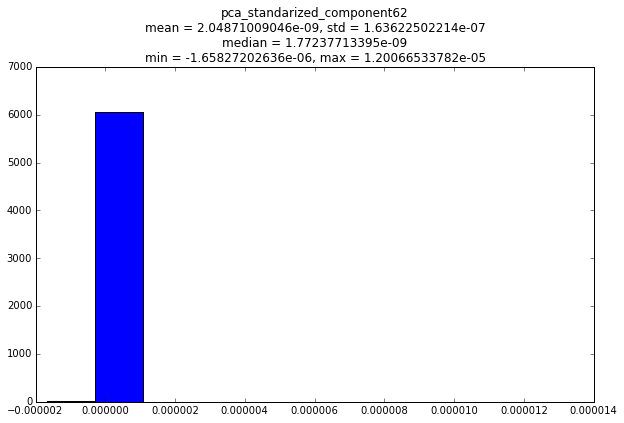

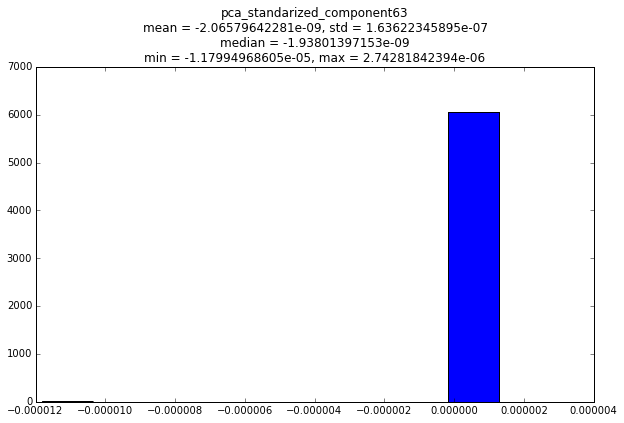

In [22]:
for i in range(len(features_order)):
    component = X_standarized_pca[:,i]
    plot_histogram('pca_standarized_component{0}'.format(i), component)

In [23]:
X

array([[ 1.29759204,  0.        ,  0.        , ...,  0.08877666,
         0.14598539,  0.09910309],
       [ 0.81563526,  0.        ,  0.        , ...,  0.08522844,
         0.20717132,  0.14621599],
       [-2.39726973,  0.        ,  0.        , ...,  0.05706556,
         0.13218391,  0.07613317],
       ..., 
       [ 0.68188953,  0.        ,  0.        , ...,  0.24866135,
         0.19795658,  0.24994938],
       [-1.77853084,  0.        ,  0.        , ...,  0.29153743,
         0.1919302 ,  0.30745003],
       [-1.39581704,  0.        ,  0.        , ...,  0.18661058,
         0.18057922,  0.16643447]], dtype=float32)

In [24]:
X_standarized

array([[ 1.01792431,  0.        , -0.77291828, ..., -1.019171  ,
         0.63503748, -0.08104963],
       [ 0.64236641,  0.        , -0.77291828, ..., -1.04110789,
         2.23181129,  0.1895106 ],
       [-1.86124301,  0.        , -0.77291828, ..., -1.21522582,
         0.27485907, -0.21296138],
       ..., 
       [ 0.53814703,  0.        , -0.77291828, ..., -0.03067872,
         1.99133348,  0.78523129],
       [-1.37909961,  0.        , -0.77291828, ...,  0.23440401,
         1.83406281,  1.11544621],
       [-1.08087552,  0.        , -0.77291828, ..., -0.41430962,
         1.53783512,  0.30562136]], dtype=float32)

In [30]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

In [32]:
X_standarized

array([[ 1.01792431,  0.        , -0.77291828, ..., -1.019171  ,
         0.63503748, -0.08104963],
       [ 0.64236641,  0.        , -0.77291828, ..., -1.04110789,
         2.23181129,  0.1895106 ],
       [-1.86124301,  0.        , -0.77291828, ..., -1.21522582,
         0.27485907, -0.21296138],
       ..., 
       [ 0.53814703,  0.        , -0.77291828, ..., -0.03067872,
         1.99133348,  0.78523129],
       [-1.37909961,  0.        , -0.77291828, ...,  0.23440401,
         1.83406281,  1.11544621],
       [-1.08087552,  0.        , -0.77291828, ..., -0.41430962,
         1.53783512,  0.30562136]], dtype=float32)

In [33]:
X_standarized_2 = (X. - mean)/std

In [39]:
X_standarized - np.nan_to_num(X_standarized_2)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [38]:
X_standarized[:,1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [36]:
std

array([  1.28330922e+00,   0.00000000e+00,   2.96122015e-01,
         6.29361495e-02,   2.46693105e-01,   7.42656589e-01,
         1.73807774e+01,   1.28784752e+00,   1.16723217e-01,
         6.93606660e-02,   1.26449023e+03,   0.00000000e+00,
         5.27017653e-01,   2.27759440e+07,   2.50249263e-02,
         1.28228009e+00,   4.73371744e+00,   1.28255796e+00,
         1.39245462e+00,   1.31541431e+00,   9.39793065e-02,
         8.20475966e-02,   8.34951843e+02,   1.27771735e+00,
         3.77396233e-02,   1.56343743e-01,   3.13109346e-02,
         1.27934501e-01,   8.04780796e-03,   0.00000000e+00,
         6.27340674e-02,   8.73069859e+00,   2.89553452e+01,
         1.52423576e-01,   2.52209455e-01,   8.72665793e-02,
         1.27889550e+00,   9.92471278e-02,   5.23461968e-05,
         7.15003908e-02,   1.30277467e+00,   2.05245420e-01,
         7.17107471e+03,   7.67289028e-02,   1.77991226e-01,
         7.94776976e-01,   5.29770702e-02,   1.31048024e+00,
         1.85095891e-01,